# Evaluating Value-Based Reinforcement Learning Approaches for Chemotherapy Drug Dosing

Candidate Numbers: 50603, 51116, 36536 
All candidates contribute equally to this project.

# Table of Contents
* [Abstract](#abstract)
* [Introduction](#1-introduction)
* [Methodology](#2-methodology)
    * [Markov Decision Process (MDP)](#21-markov-decision-process-mdp)
    * [Q-Learning](#21-q-learning)
    * [Double-Q-Learning](#23-double-q-learning)
    * [SARSA](#24-sarsa-stateactionrewardstateaction)
* [Definitions](#3-definitions)
    * [Environment](#31-environment)
    * [States](#32-states)
    * [Actions](#33-actions)
    * [Rewards](#34-rewards)
    * [Terminal States](#35-terminal-states)
    * [Epsilon Greedy Policy](#36-policy--greedy)
* [Implementation](#4-implementation)
    * [Key Identifiers Used in Code](#41-key-identifiers-for-patient-types-and-reinforcement-learning-algorithms)
    * [Implementation of Environment](#42-environment)
    * [Implementation of Epsilon Greedy Policy](#43-policy--greedy)
    * [Implementation for the Algorithms](#44-main-implementation-of-algorithms)
    * [Doses and Tumor Size Bins for Young Patient](#45-dose-levels-and-tumor-size-bins-for-younger-and-elderly-patients)
    * [Implementation of Q-Learning](#46-q-learning)
        * [Implementation of Q-Learning on Young Patient](#461-young-patient-q-learning)
        * [Implementation of Q-Learning on Elderly Patient](#462-elderly-patient-q-learning)
    * [Implementation of Double-Q-Learning](#47-double-q-learning)
        * [Implementation of Double-Q-Learning on Young Patient](#471-young-patient-double-q-learning)
        * [Implementation of Double-Q-Learning on Elderly Patient](#472-elderly-patient-double-q-learning)
    * [Implementation of SARSA](#48-sarsa)
        * [Implementation of SARSA on Young Patient](#481-young-patient-sarsa)
        * [Implementation of SARSA on Elderly Patient](#482-elderly-patient-sarsa)
* [Discussion & Evaluation](#5-discussion--evaluation)
    * [Young Patient Algorithms Comparison](#51-young-patient-algorithms-comparison)
        * [Cell Trajectories and Dose Schedules](#511-plot-cell-trajectories-and-dose-schedules-for-young-patient)
        * [Rewards Comparison](#512-rewards-comparison-for-young-patient)
        * [Convergence(Timesteps) Comparison](#513-timesteps-comparison-for-young-patient)
        * [Toxicity Comparison](#514-toxicity-comparison-for-young-patient)
        * [Computational Efficiency](#515-computational-efficiency-of-the-algorithms-for-young-patient)
    * [Elderly Patient Algorithms Comparison](#52-elderly-patient-algorithms-comparison)
        * [Cell Trajectories and Dose Schedules](#521-plot-cell-trajectories-and-dose-schedules-for-elderly-patient)
        * [Rewards Comparison](#522-rewards-comparison-for-elderly-patient)
        * [Convergence(Timesteps) Comparison](#523-timesteps-comparison-for-elderly-patient)
        * [Toxicity Comparison](#524-toxicity-comparison-for-elderly-patient)
        * [Computational Efficiency](#525-computational-efficiency-of-the-algorithms-for-elderly-patient)
    * [Hyperparameter $\gamma$ Analysis](#53-hyperparameter-analysis-gamma-vs-performance-metrics)
        * [Hyperparameter $\gamma$ Analysis for Young Patient](#531-hyperparameter-gamma-variations-analysis-for-young-patients)
            * [Q-Learning Hyperparameter $\gamma$ Analysis for Young Patient](#5311-q-learning-hyperparameter-analysis-for-young-patient)
            * [Double-Q-Learning Hyperparameter $\gamma$ Analysis for Young Patient](#5312-double-q-learning-hyperparameter-analysis-for-young-patient)
            * [SARSA Hyperparameter $\gamma$ Analysis for Young Patient](#5313-sarsa-hyperparameter-analysis-for-young-patient)
        * [Hyperparameter $\gamma$ Analysis for Elderly Patient](#532-hyperparameter-gamma-variations-analysis-for-elderly-patients)
            * [Q-Learning Hyperparameter $\gamma$ Analysis for Elderly Patient](#5321-q-learning-hyperparameter-analysis-for-elderly-patients)
            * [Double-Q-Learning Hyperparameter $\gamma$ Analysis for Elderly Patient](#5322-double-q-learning-hyperparameter-analysis-for-elderly-patients)
            * [SARSA Hyperparameter $\gamma$ Analysis for Elderly Patient](#5323-sarsa-hyperparameter-analysis-for-elderly-patients)
    * [Conclusion](#6-conclusion)
    * [References](#references)
    

In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import random
import time
import seaborn as sns
import pandas as pd

# Set random seeds for reproducibility
np.random.seed(1)
random.seed(1)

## Abstract
---
Cancer is a leading cause of death, and chemotherapy dosing is a delicate balance between killing tumor cells and avoiding harmful side effects. This project explores how reinforcement learning (RL) can help personalise treatment by adapting drug doses based on patient responses. We model chemotherapy as a Markov Decision Process and compare three RL methods: Q-learning, SARSA, and Double Q-learning, using a simulation based on real-world cancer dynamics. Our goal is to see which method best balances treatment effectiveness and patient safety, especially across different patient types like young and elderly individuals.

## 1. Introduction 
---

One in four deaths in the United Kingdom can be attributed to cancer [1]. The sixth leading cause of death in the world is lung cancer. With such an impact on human life, the most prevalent method for treating cancer warrants evaluation through reinforcement learning, in a way that may aid both clinicians and patients [2]. Chemotherapy dosing results in a tenuous balance between maximising therapeutic efficacy and minimising toxic side effects. Traditional dosing regimens are being replaced by dynamic treatment regimens or DTRs personalised for patients [3]. This presents an opportunity for using an RL framework to personalise treatment by dynamically adapting dosing strategies based on observed patient outcomes. In this project, we model the chemotherapy decision-making process as a Markov Decision Process (MDP), where patient health states evolve in response to dosing actions taken over time. Our primary aim is to investigate how different RL algorithms perform in tailoring treatment in this high-stakes context, with a focus on optimising outcomes while prioritising patient safety.

Previous research has demonstrated the potential of reinforcement learning (RL) through offline and simulated environments in many healthcare settings such as optimising insulin doses or providing diagnoses from medical imaging data [4]. Many studies have adopted deep reinforcement learning or policy gradient methods, these approaches have limited interpretability [5]. Simpler methods like Q-learning have been applied to treatment personalisation tasks but have been studied in isolation without systematic comparison to alternative RL strategies. To date, there remains limited if any work work directly evaluating and contrasting Q-learning, SARSA, and Double Q-learning within the same medical environment, especially in the context of chemotherapy dosing [6] [7]. This project addresses this critical gap by constructing a controlled simulation framework that models the chemotherapy decision process with the three algorithms side-by-side, providing a glimpse into their respective strengths and limitations for DTR.

This project develops a simulation based on the methodology presented by Padmanabhan et al. in 2017 to model the application of chemotherapy in patients, elderly and young, with an abstract cancer focusing on the optimisation of dosing regimens to curb tumor growth [8]. To assess the performance of various reinforcement learning approaches, we apply and compare Q-learning, SARSA, and Double Q-learning, ensuring that each algorithm operates under consistent parameters and environments delineated below in the [Methodology](#2-methodology) section to facilitate direct comparison. The evaluation criteria includes reward convergence, tumor reduction, and dose efficiency amongst others to provide a comprehensive view of each method’s strengths and weaknesses in clinical settings.

## 2. Methodology
---

### 2.1. Markov Decision Process (MDP)
A **Markov Decision Process (MDP)** provides a formal framework for modeling decision-making in environments where outcomes are partly random and partly under the control of an agent. In RL, an MDP represents a fully observable environment in which an agent makes sequential decisions to maximise cumulative rewards. An MDP is defined by the following core components:

- **S**: A finite or infinite set of environment states  
- **A**: A set of actions available to the agent  
- **P**: The state transition probability function  
- **R**: The reward function  
- **$\gamma$ (gamma)**: The discount factor, which determines the importance of future rewards

Each episode begins from an initial state $s_0$, and at every time step $t$, the agent chooses an action $a_t \in A$ based on the current state $s_t \in S$. The environment responds by transitioning to a new state $s_{t+1}$ with probability $P(s_{t+1} | s_t, a_t)$, and the agent receives an immediate reward $R(s_t, a_t)$.

Due to the potentially infinite number of possible state sequences, calculating exact transition probabilities for all paths is infeasible[12]. To address this, MDPs rely on the **Markov property**, which asserts that the future state $s_{t+1}$ depends only on the current state and action, not on the full history of previous states and actions[11]. Formally:
$$
P(s_{t+1} | s_t, a_t, s_{t-1}, a_{t-1}, \dots, s_0, a_0) \approx P(s_{t+1} | s_t, a_t)
$$


To evaluate the desirability of future states, MDPs use a **discount factor** $\gamma \in [0, 1)$, which reduces the weight of future rewards in the agent’s decision-making process. The **expected cumulative reward**, or **return**, starting from state $s_t$, is given by:

$$
R_t(s) = r_t + \gamma r_{t+1} + \gamma^2 r_{t+2} + \dots + \gamma^{n-t} r_n = \sum_{t \geq 0} \gamma^t R_{a_t}(s_t, s_{t+1})
$$

The **value function** $V^\pi(s)$ quantifies the expected return when following a policy $\pi$, starting from state $s$:

$$
V^\pi(s) = \mathbb{E}\left[\sum_{t \geq 0} \gamma^t r_t \right]
$$

The **optimal value function** $V^*(s)$ identifies the maximum possible value across all policies, representing the best expected return an agent can achieve from state $s$:

$$
V^*(s) = \max_\pi V^\pi(s)
$$



This project utilises **Q-Learning**, **Double Q-Learning**, and **SARSA**, which are value-based reinforcement learning algorithms based on the following Bellman equations. Each algorithm estimates the optimal policy by learning action-value functions $ Q(s, a) $, which represent the expected cumulative reward for taking action $a $ in state $ s $.

### 2.1. Q-Learning
The primary goal of Q-Learning is to learn the **optimal action-value function** $Q^*$, which estimates the maximum expected cumulative reward for each state-action pair. Once this function is learned, the **optimal policy** $\pi^*$ can be derived by selecting the action that maximises the Q-value for a given state:

$$
\pi^*(s) = \arg\max_a Q^*(s, a)
$$

This project focuses on **tabular Q-Learning**, applied to a finite **Markov Decision Process (MDP)** with discrete state and action spaces.

The Q-function is grounded in the **Bellman optimality equation**, which expresses the expected utility of taking an action $a$ in state $s$, and then acting optimally thereafter:

$$
Q(s, a) = r + \gamma \max_{a'} Q(s', a')
$$

Here, $s$ is the current state, $a$ is the action taken, $r$ is the immediate reward, $s'$ is the next state, $\gamma \in [0,1)$ is the discount factor, $a'$ are the possible actions in the next state  

This equation estimates the **maximum discounted future reward** obtainable by transitioning from state $s$ to state $s'$.

To approximate the optimal Q-function over time, Q-Learning uses an **iterative update rule** based on the temporal difference between estimated and observed rewards. The update at time step $t$, with learning rate $\alpha$, is given by:

$$
Q_{t+1}(s_t, a_t) = Q_t(s_t, a_t) + \alpha \left[r_{t+1} + \gamma \max_a Q_t(s_{t+1}, a) - Q_t(s_t, a_t)\right]
$$

This rule allows the agent to gradually adjust its Q-values toward the optimal estimates as it gains more experience[10].

Once the Q-function converges to the optimal $Q^*(s, a)$, the corresponding **state-value function** $V^*(s)$ can be obtained as:

$$
V^*(s) = \max_a Q^*(s, a)
$$

From this, the **optimal policy** $\pi^*$ can be recovered as:

$$
\pi^*(s) = \arg\max_a Q^*(s, a)
$$

This process enables the agent to act optimally in any given state by selecting actions that maximise long-term rewards.

### 2.3. Double Q-Learning  
Building upon standard Q-Learning, **Double Q-Learning** mitigates the overestimation bias of Q-Learning by maintaining two separate Q-value tables $ Q_A$ and $ Q_B $. Instead of using a single Q-function for both action selection and evaluation, Double Q-Learning randomly chooses one table for updating and uses the other for estimating the value of the next action. This decoupling reduces the overoptimistic bias in value estimation and results in more stable and reliable learning, especially in noisy or complex environments.

$$
Q_A(s, a) \leftarrow Q_A(s, a) + \alpha \left[ r + \gamma Q_B(s', \arg\max_{a'} Q_A(s', a')) - Q_A(s, a) \right]
$$ 

This separation stabilises learning and leads to more accurate value estimates.

### 2.4. SARSA (State–Action–Reward–State–Action) 
In contrast to Q-Learning, **SARSA** is an on-policy reinforcement learning algorithm, meaning it updates its action-value estimates (Q-value) based on the actions actually taken by the current policy, rather than assuming the agent always acts optimally i.e. the maximum Q-value.  
$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma Q(s', a') - Q(s, a) \right]
$$ 
This makes SARSA more conservative in learning, as it factors in the actual exploration behavior of the policy, often leading to safer learning in risk-sensitive domains like healthcare where risky optimal actions could result in large penalties.


These algorithms were used to explore optimal chemotherapy dosing strategies, with the discount factor $\gamma $ varied to examine its effect on short- vs. long-term reward prioritisation.


## 3. Definitions
---

### 3.1. Environment
The environment is created from the relevant ODE used to simulate cancerous patients. It is a four-compartment model advanced by de Pillis in the 2003 paper Mixed immunotherapy and chemotherapy of tumors: modeling, applications, and biological interpretations [9]. 

The model comprises four interacting components, each defined as a continuous function of time $t \geq 0$:

- The number of immune cells $I(t)$
- The number of normal cells $ N(t)$ 
- The number of tumor cells $ T(t)$ 
- The drug concentration $ C(t)$ 

This model takes both the logistic cell growth and the immune response to chemotherapy into account. The tumor site includes both tumor and normal cells. The model also includes terms for cell proliferation - **per capita growth rate**, **cell death rates** and **reciprocal carrying capacities** of tumor and normal cells. The system defines four interdependent dynamical variables, each representing a specific biological population or treatment factor over continuous time $t \geq 0$:

- $  x_1(t) = N(t)  $ - normal cells
- $  x_2(t) = T(t)  $ - tumor cells
- $  x_3(t) = I(t)  $ - immune cells
- $  x_4(t) = C(t)  $ - drug concentration

The cancer chemotherapy model[8] is given by the following system of differential equations:

$$
\dot{x}_1(t) = r_2 x_1(t) \left(1 - b_2 x_1(t)\right) - c_4 x_1(t) x_2(t) - a_3 x_1(t) x_4(t), \quad x_1(0) = x_{10}, \quad t \geq 0 
\quad (1)
$$

$$
\dot{x}_2(t) = r_1 x_2(t) \left(1 - b_1 x_2(t)\right) - c_2 x_3(t) x_2(t) - c_3 x_2(t) x_1(t) - a_2 x_2(t) x_4(t), \quad x_2(0) = x_{20} \quad (2)
$$

$$
\dot{x}_3(t) = s + \frac{\rho x_3(t) x_2(t)}{\alpha + x_2(t)} - c_1 x_3(t) x_2(t) - d_1 x_3(t) - a_1 x_3(t) x_4(t), \quad x_3(0) = x_{30} \quad (3)
$$

$$
\dot{x}_4(t) = -d_2 x_4(t) + u(t), \quad x_4(0) = x_{40} \quad (4)
$$

where:

- **$ u(t), t \geq 0 $**, is the drug infusion rate
- **$s = 0.33 \; \text{cell} \cdot \text{day}^{-1}$** denotes the (constant) influx rate of immune cells to the tumor site
- **$r_1 = 1.5 \; \text{day}^{-1}$** and **$r_2 = 1 \; \text{day}^{-1}$** represent the per capita growth rates of tumor cells & normal cells respectively
- **$b_1 = 1 \; \text{cell}^{-1}$** and **$b_2 = 1 \; \text{cell}^{-1}$** represent the reciprocal carrying capacities of the cells
- **$d_1 = 0.2 \; \text{day}^{-1}$** and **$d_2 = 1 \; \text{day}^{-1}$** denote immune cell death rate and the per capita decay rate of the injected drug respectively
- **$a_1 = 0.2 \; \text{mg}^{-1} \cdot \text{l} \cdot \text{day}^{-1}$** : fractional cell kill rates of immune cells
- **$a_2 = 0.3 \; \text{mg}^{-1} \cdot \text{l} \cdot \text{day}^{-1}$** : fractional cell kill rates of tumor cells
- **$a_3 = 0.1 \; \text{mg}^{-1} \cdot \text{l} \cdot \text{day}^{-1}$** : fractional cell kill rates of normal cells
- **$c_1 = 1 \; \text{cell}^{-1} \cdot \text{day}^{-1}$** : immune cell competition term (between tumor & immune)
- **$c_2 = 0.5 \; \text{cell}^{-1} \cdot \text{day}^{-1}$** : tumor cell competition term (between tumor and immune)
- **$c_3 = 1 \; \text{cell}^{-1} \cdot \text{day}^{-1}$** : tumor cell competition term (between normal and tumor)
- **$c_4 = 1 \; \text{cell}^{-1} \cdot \text{day}^{-1}$** : normal cell competition term (between normal and tumor)
- **$i = 1$** identifies the parameters associated with the tumor, and **$i = 2$** identifies those associated with the normal tissue.
- **$\rho = 0.01 \; \text{day}^{-1}$** and **$\alpha = 0.3 \; \text{cell}$** represent the immune response rate and immune threshold rate respectively 

### 3.2. States
The problem of regulating tumor cells $ x_2(t) $, $ t \geq 0 $, involves sequential decision-making based on the response of the patient to drug administration. In the context of our reinforcement learning (RL)-based control agent, the state vector is $ \mathbf{x}(t) = [x_1(t), x_2(t), x_3(t), x_4(t)]$. These state vectors are crucial for making informed decisions about drug administration. In this work, we define the patient's discrete state $s_k$ in terms of an available output $e(t)$, where $e(t)$ represents an error rate based on a particular combination of system states. 

Spefically, the state is determined as $s_k = g(e(t))$ for $kT \leq t < (k+1)T$, with $g:\mathbb{R} \rightarrow \{0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19\}$. The mapping of $e(t)$ to the discrete states $s_k$ is detailed in [Table 1](#States).

As previously stated, we define two types of cancerous patients. First, a **young patient with a stronger immune response and faster recovery rates**. Second, an **elderly patient with a weaker immune system and slower drug clearance**. In our simulations, the error function $e(t)$ is adjusted to reflect varied clinical priorities based on the patient's profile. For a young patient, the oncologist's objective is to aggressively reduce the amount of malignant cells while being less concerned about damage to normal or immune cells. This method is motivated by the need to prevent metastasis, with the assumption that a younger patient's body may be able to restore normal cells that have been lost as a result of chemotherapy. Thus, $e(t) = x_2(t)$. In contrast, for an elderly patient, where normal and immune cell regeneration rates are substantially slower, the treatment plan prioritises conserving normal cells while attempting to remove the tumor. This is especially important when the patient has other health issues or the tumor is placed in a major organ, where harm to normal tissue could result in serious problems. 

For this project, we use standard error formula $e(t) = \beta x_2(t) +(1-\beta)[1 - x_1(t)]$ where $\beta$ is a weighting factor for the tradeoff of tumor cells and normal cells.  
$$
e(t) = \left\{
\begin{aligned}
x_2(t) & \quad \text{where } \beta = 1,\ \text{young patient} \\
0.9x_2(t) + 0.1[1 - x_1(t)] & \quad \text{where } \beta = 0.9,\ \text{elderly patient}
\end{aligned}
\right.
$$


<div align="center">

| **Case 1** |         | **Case 2** |         |
|:----------:|:-------:|:----------:|:-------:|
| **State** $s_k$ | **$e(kT)$** | **State** $s_k$ | **$e(kT)$** |
| 0  | [0, 0.0063]       | 0  | [0, 0.03]       |
| 1  | (0.0063, 0.0125]  | 1  | (0.03, 0.1]     |
| 2  | (0.0125, 0.025]   | 2  | (0.1, 0.2]      |
| 3  | (0.025, 0.035]    | 3  | (0.2, 0.3]      |
| 4  | (0.035, 0.05]     | 4  | (0.3, 0.4]      |
| 5  | (0.05, 0.1]       | 5  | (0.4, 0.5]      |
| 6  | (0.1, 0.2]        | 6  | (0.5, 0.6]      |
| 7  | (0.2, 0.25]       | 7  | (0.6, 0.7]      |
| 8  | (0.25, 0.3]       | 8  | (0.7, 0.8]      |
| 9  | (0.3, 0.35]       | 9  | (0.8, 0.9]      |
| 10 | (0.35, 0.4]       | 10 | (0.9, 1]        |
| 11 | (0.4, 0.45]       | 11 | (1, 1.2]        |
| 12 | (0.45, 0.5]       | 12 | (1.2, 1.4]      |
| 13 | (0.5, 0.55]       | 13 | (1.4, 1.6]      |
| 14 | (0.55, 0.6]       | 14 | (1.6, 1.8]      |
| 15 | (0.6, 0.65]       | 15 | (1.8, 2]        |
| 16 | (0.65, 0.7]       | 16 | (2, 2.2]        |
| 17 | (0.7, 0.8]        | 17 | (2.2, 2.5]      |
| 18 | (0.8, 0.9]        | 18 | (2.5, 3]        |
| 19 | (0.9, ∞)          | 19 | (3, ∞)          |

**Table 1:** Mapping of patient states assignment $s_k$ based on error intervals $e(kT)$ for Case 1: Young Patient and Case 2: Elderly Patient.

</div>


**Note:** In the Padmanabhan et al. [2017] paper, the state bins for *Case 1* (specifically, their states 2–5, which correspond to our states 1–4) are incorrect. The original ranges are:

- **State 2**: (0.0063, 0.0125]  
- **State 3**: (0.0125, 0.025]  
- **State 4**: (0.025, 0.01] 
- **State 5**: (0.01, 0.05]  

We have corrected these bins to use the following intervals:

- **State 1**: [0, 0.03]  
- **State 2**: (0.03, 0.1]  
- **State 3**: (0.1, 0.2]  
- **State 4**: (0.2, 0.3]  

These adjustments ensure consistency with the progression of bin widths and logical ordering.


### 3.3. Actions
The action space $ A $ consists of the **drug infusion rate** $u(t)$, which controls the drug administration to the patient. At each time step, the agent can select a value from a finite set of actions that influence the drug concentration $x_4(t)$ and, consequently, affect the tumor growth. The action set is defined as: $$ A = (0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0)$$ which corresponds to different levels of drug dosage.

### 3.4. Rewards
In the reinforcement learning framework, **rewards** are used to guide the agent toward the optimal policy. The reward function $R $ assigns a numerical value to each action taken in a given state. The reward is designed to encourage the agent to minimise tumor cell numbers and maximise the efficacy of the drug administered while considering the impact on normal and immune cells.

The reward function is structured[8] as follows:

$$
r_{k+1} =
\begin{cases}
\frac{e(kT) - e((k+1)T)}{e(kT)}, & \text{if } e((k+1)T) < e(kT) \\
0, & \text{if } e((k+1)T) \geq e(kT)
\end{cases}
$$


### 3.5. Terminal States
In the context of cancer chemotherapy, the **terminal state** corresponds to succesful treatment completion and differs depending on the patient type[8]:

- Young Patient: The terminal state is reached when the tumor cells have been eradicated which is defined by: $$x_2(t) = 0 $$
- Elderly Patient: The terminal state is reached when the tumor cells have been eradicated and the normal cells have been perserved which is defined by: $$x_2(t) = 0 \;\;\; \text{and} \;\;\; x_1(t) = 1$$

The RL agent aims to identify the optimal sequence of actions (drug infusion rates) that lead to this terminal state. Once the terminal state is reached, the chemotherapy treatment ends. The agent’s objective is to reach this terminal state in the most efficient manner, balancing tumor reduction with minimal harm to normal and immune cells.

### 3.6. Policy: $\epsilon$-Greedy

In this project, all algorithms (Q-learning, Double Q-learning, and SARSA) use an $\epsilon$-greedy policy for action selection. Under this policy, with probability $\epsilon$, a random action is selected to encourage exploration, and with probability 1-$\epsilon$, the action with the highest estimated value is chosen to promote exploitation. Specifically, we set $\epsilon = 0.1$ like in the paper, meaning that 10% of the time, the agent explores by selecting a random action, and 90% of the time, it exploits its current knowledge by choosing 
$a = \text{argmax}_a Q(s,a)$ This balance helps prevent the agent from prematurely converging to suboptimal policies by ensuring sufficient exploration throughout learning.


## 4. Implementation
---
##### **Training Scenario Design**
One noticeable difference from the paper[8] is how we structured our training scenarios. The paper used 50,000 full scenarios, each simulating a complete sequence from the initial starting state to a terminal state. In contrast, we ran 1,000 independent training runs, each consisting of 250 episodes. Additionally, we used the same parameters for both young and elderly patients.

Figure 1 illustrates the sequence for a simulated young patient to obtain optimal Q-tables. The flowchart begins with measuring the tumor cells' size, which leads to identifying the state. From there, the process branches into two paths: one involves updating Q based on the last action and reward through an Epsilon-Greedy Algorithm starting from an initial arbitrary Q, and the other path leads directly to infusion decision via $u(t)$. The learned optimal Q is also part of this sequence, highlighting the steps involved in optimising treatment strategies using Q-Learning[8].

Figure 2 illustrates the sequential process through which an optimal Q-table is derived for a simulated elderly patient undergoing treatment. The flow begins with measuring the sizes of both tumor and normal cells to determine the patient's current state. From there, the Q-value is updated based on the previously taken action and the received reward, employing an Epsilon-Greedy strategy for action selection. The Q-table is initially populated with arbitrary values and is iteratively refined over time. Infusion decisions, denoted by $u(t)$, are made at each step based on the evolving policy. This iterative loop continues until the agent converges on an optimal Q-table, effectively learning the most beneficial treatment strategy tailored to the elderly patient's response dynamics[8].

![My Image](YoungPQTable.jpg)
<p style="text-align: center;"><em>Figure 1: Sequence for Simulated Young Patient to obtain Optimal Q-Table.</em></p>

![My Image](ElderlyPQTable.jpg)
<p style="text-align: center;"><em>Figure 2: Sequence for Simulated Elderly Patient to obtain Optimal Q-Table.</em></p>

### 4.1. Key Identifiers for Patient Types and Reinforcement Learning Algorithms
The following section defines key identifiers and parameters used throughout the analysis. These include the titles and types of patients for classification, reinforcement learning algorithms employed in the experiments, discount factors (gamma values) for simulation, and episode bins used for generating heatmaps. These variables form the basis for the experimental setup and labeling of data.

In [7]:
#KEY IDENTIFIERS
# Titles for patient types used for labeling or display purposes
elderly_patient_title ='Elderly Patient'
young_patient_title ='Young Patient'

# Patient type identifiers used for classification or condition checks
patient_type_young = 'young'
patient_type_elderly = 'elderly'

# Names of reinforcement learning algorithms used in the analysis
q_learning_algo = 'Q-Learning'
double_q_learning_algo = 'Double-Q-Learning'
sarsa_algo = 'SARSA'

# Discount factors (gamma values) to be used in experiments or simulations
gammas = [0.1, 0.3, 0.5, 0.7, 0.9]

# Define episode bins for heatmaps
bins = [(0,25), (25,50), (50,75), (75,100), (100,125), (125,150), (150,175), (175,200), (200,225), (225,250)]
# Generate labels corresponding to each bin for use in legends, axes, etc.
bin_labels = [f"{start}-{end}" for (start,end) in bins]

### 4.2. Environment
The following class, **CancerTreatmentEnv**, models a simulation environment for cancer treatment using chemotherapy. It is designed to simulate the interaction between tumor cells, immune cells, normal cells, and chemotherapy drug concentration over time using a system of ordinary differential equations (ODEs). This environment is structured to be used with reinforcement learning algorithms, aiming to discover optimal treatment strategies for both young and elderly patients.

The class includes methods to compute the tumor growth, immune response, and drug pharmacokinetics, as well as reward functions that assess the effectiveness of chemotherapy treatment. 

In [46]:
# --- Cancer Treatment Environment Class ---
class CancerTreatmentEnv:
    """
    A simulation environment for cancer treatment using chemotherapy.
    
    The environment models the interaction between tumor cells, immune cells, 
    normal cells, and chemotherapy drug concentration over time using a system 
    of ODEs. Designed for reinforcement learning applications to discover 
    optimal treatment strategies.

    Attributes:
        patient_type (str): Type of patient ('young' or 'elderly' or 'elderly+15').
        state (np.array): Current state vector [N, T, I, C].
        reward (float): Most recent reward.
        terminal (bool): Indicates if the episode has ended.
        beta (float): Weight factor used in the error function.
    """


    def __init__(self, patient_type):
        self.patient_type = patient_type                                                            # Type of patient (young or elderly)
        self.set_initial_state()                                                                    # Set the initial state of the environment
        self.state = self.initial_state                                                             # Initialise current state
        self.reward = 0.0                                                                           # Initialise reward
        self.is_terminal()                                                                          # Check if initial state is terminal
        self.set_beta()                                                                             # Set beta parameter based on patient type
        
    def ode_model(self, t, y, u):
        """
        Defines the system of ODEs modeling cancer dynamics.

        Args:
            t (float): Current time (not used explicitly since system is autonomous).
            y (list or np.array): Current state [N, T, I, C].
            u (float): Control input representing chemotherapy dosage.

        Returns:
            list: Derivatives [dNdt, dTdt, dIdt, dCdt].
        """
        # Parameter selection based on patient type
        if self.patient_type == patient_type_young or self.patient_type == patient_type_elderly:
            #r1 Per unit growth rate of tumor cells ; r2 Per unit growth rate of normal cells 
            r1, r2 = 1.5, 1             

            #b1 Reciprocal carrying capacity of tumor cells ; b2 Reciprocal carrying capacity of normal cells                        
            b1, b2 = 1, 1                                      
            
            #c1 Immune cell competition term (competition between tumor cells and immune cells)
            #c2 Tumor cell competition term (competition between tumor cells and immune cells)
            #c3 Tumor cell competition term (competition between normal cells and tumor cells) 
            #c4 Normal cell competition term (competition between normal cells and tumor cells) 
            c1, c2, c3, c4 = 1, 0.5, 1, 1      

            #d1 Immune cell death rate ; d2 Decay rate of injected drug                 
            d1, d2 = 0.2, 1

            #a1 Fractional immune cell kill rate ; a2 Fractional tumor cell kill rate ; a3 Fractional normal cell kill rate  
            a1, a2, a3 = 0.2, 0.3, 0.1

            #s Immune cell influx rat
            s = 0.33 

            #alpha Immune threshold rate                    
            alpha = 0.3

            #p Immune response rate 
            p = 0.01                    

        # Unpack state variables: Normal cells (N), Tumor cells (T), Immune cells (I), Chemo concentration (C)
        N, T, I, C = y

        # ODE equations for each component
        # Normal cell dynamics
        dNdt = r2 * N * (1 - b2 * N) - c4 * N * T - a3 * N * C

        # Tumor cell dynamics
        dTdt = r1 * T * (1 - b1 * T) - c2 * I * T - c3 * T * N - a2 * T * C

        # Immune cell dynamics
        dIdt = s + ((p * I * T)/(alpha + T)) - c1 * I * T - d1 * I - a1 * I * C

        # Drug pharmacokinetics
        dCdt = u - d2 * C
        return [dNdt, dTdt, dIdt, dCdt]  

    def compute_error(self, state):
        """
        Calculates the error combining tumor size and normal cell health in the state.

        Args:
            state (np.array): Current state [N, T, I, C].

        Returns:
            float: Computed error value.
        """
        N, T, _, _ = state
        return self.beta * T + (1 - self.beta) * (1 - N)

    def get_reward(self, error_before, error_after):
        """
        Computes reward based on reduction in error.

        Args:
            error_before (float): Error before the action.
            error_after (float): Error after the action.

        Returns:
            float: Reward (non-negative, scaled error reduction).
        """
        if error_after < error_before and error_before != 0:
            return (error_before - error_after) / error_before
        else:
            return 0  

    def step(self, action):
        """
        Apply an action and simulate the system for 1 time step.

        Args:
            action (float): Chemotherapy dosage input.

        Returns:
            tuple:
                - next_state (np.array): State after action [N, T, I, C].
                - reward (float): Reward received.
                - done (bool): True if terminal condition met.
        """
        v = action

        # Solve the ODE system from t=0 to t=1 with current state
        sol = solve_ivp(lambda t, y: self.ode_model(t, y, v),
                [0, 1], self.state, t_eval=np.linspace(0, 1, 20))
        
        # Use the last value of the solution and ensure physical realism
        next_state = np.clip(sol.y[:, -1], 0, 1.5)

        # Compute reward based on reduction in error
        error_before = self.compute_error(self.state)
        error_after = self.compute_error(next_state)
        reward = self.get_reward(error_before, error_after)

        # Update environment state
        self.state = next_state
        self.is_terminal()
        done = self.terminal
        return next_state, reward, done
    
    def reset(self):
        """Reset the environment to the initial state."""
        self.state = self.initial_state
        self.reward = 0.0
        self.terminal = False
        return self.state

    def is_terminal(self):
        """Determine if the episode is over (tumor sufficiently reduced)."""
        if self.patient_type == patient_type_young and self.state[1] < 0.0063:
            self.terminal = True
        elif self.patient_type == patient_type_elderly and self.state[1] < 1e-4 and self.state[0] >= 0.0:
            self.terminal = True
        else:
            self.terminal = False
    
    def set_beta(self):
        """Set the beta weight for error calculation based on patient type."""
        if self.patient_type == patient_type_young:
            self.beta = 1.0                         # Prioritise tumor reduction
        elif self.patient_type == patient_type_elderly:
            self.beta = 0.9                         # Slightly more emphasis on preserving normal cells

    def set_initial_state(self):
        """Initialise state vector for the environment."""
        N0 = 0.4        # Initial normal cell proportion
        T0 = 0.9        # Initial tumor cell proportion
        I0 = 0.6        # Initial immune cell proportion
        C0 = 0.0        # Initial chemo concentration
        self.initial_state = np.array([N0, T0, I0, C0])

    
    def get_state_index(self, state, error_bins):
        """
        Discretize the error into a discrete state index for RL use.

        Args:
            state (np.array): Current state [N, T, I, C].
            error_bins (list): Bin edges for discretisation.

        Returns:
            int: Index of bin the error falls into.
        """
        error = self.compute_error(state)
        
        idx = np.digitize(error, error_bins, right=True) - 1
        #print(f"State: Error = {error:.4f}, Assigned to State Index = {idx}")
        return idx


### 4.3. Policy: $\epsilon$-Greedy
The following functions implement the $\epsilon$-greedy action selection strategy for both Q-Learning/SARSA and Double Q-Learning. The $\epsilon$-greedy strategy is a key component in reinforcement learning, balancing exploration (random actions) and exploitation (choosing actions based on the current knowledge of action-value estimates).

In [47]:
# --- Epsilon Greedy for Q-LEARNING & SARSA ---
def eps_greedy(q_values, epsilon, dose_levels):
    """
    ε-greedy action selection strategy for Q-learning.

    This function selects an action either randomly (exploration) or greedily (exploitation)
    based on the ε-greedy policy. With probability ε, it chooses a random action;
    otherwise, it chooses the action with the highest Q-value.

    Args:
        q_values (list or np.array): Q-values for each possible action in the current state.
        epsilon (float): Probability of choosing a random action (exploration rate).
        dose_levels (list or np.array): List of possible dose levels (actions).

    Returns:
        int: Index of the selected action from the dose_levels list.
    """

    # Exploration: with probability ε, choose a random action index
    if np.random.binomial(1, epsilon) == 1:
        act = random.randint(0, len(dose_levels) - 1)
        return act
    else:
        # Exploitation: choose the action index with the highest Q-value
        # If multiple actions have the same max value, randomly break ties
        best_act = np.random.choice([action_ for action_, value_ in enumerate(q_values) if value_ == np.max(q_values)])
        return best_act

In [48]:
# --- DOUBLE Q LEARNING ---
def eps_greedy_doubleq(q1_values, q2_values, epsilon, dose_levels):
    """
    ε-greedy action selection for Double Q-Learning.

    This function selects an action based on the combined estimates of two Q-tables (Q1 and Q2).
    With probability ε, it chooses a random action (exploration).
    With probability (1 - ε), it chooses the action with the highest combined Q-value (exploitation).

    Args:
        q1_values (list or np.array): Action-value estimates from Q1 for the current state.
        q2_values (list or np.array): Action-value estimates from Q2 for the current state.
        epsilon (float): Probability of choosing a random action (exploration rate).
        dose_levels (list or np.array): List of possible actions (dose levels).

    Returns:
        int: Index of the selected action from the dose_levels list.
    """

    # With probability ε, explore by choosing a random action
    if np.random.binomial(1, epsilon) == 1:
        act = random.randint(0, len(dose_levels) - 1)
        return act
    else:
        # Exploit: combine Q1 and Q2 values by summing them element-wise
        q_values = q1_values + q2_values

        # Select the action with the highest combined Q-value
        # If multiple actions have the same max value, choose randomly among them
        best_act = np.random.choice([action_ for action_, value_ in enumerate(q_values) if value_ == np.max(q_values)])
        return best_act

### 4.4. Main Implementation of Algorithms

The **run_algorithms** function is a core component of the cancer treatment simulation pipeline. It encapsulates the training and evaluation process for three reinforcement learning (RL) algorithms—Q-Learning, Double Q-Learning, and SARSA—applied to optimise dose levels in a cancer treatment environment. The method is designed to simulate learning over multiple runs and episodes, allowing for a robust estimation of policy effectiveness in controlling tumor growth.

This method is invoked in later parts of the code to compare the performance of different RL algorithms under varying patient scenarios. It is typically called inside experiment loops or visualisation scripts that assess:
- Policy convergence
- Algorithm stability
- Treatment effectiveness across age or tumor profiles

The outputs are further used for:
- Plotting learning curves
- Comparing tumor reduction over time
- Analysing the dose strategies learned by each algorithm

In [49]:
def run_algorithms(patient, dose_levels, tumor_bins, algorithm, gamma = 0.7):
    """
    Executes a reinforcement learning algorithm (Q-learning, Double Q-learning, or SARSA)
    in the cancer treatment simulation environment over multiple runs and episodes.

    Args:
        patient (str): Type of patient ('young', 'elderly', or variations like 'elderly+15').
        dose_levels (list or np.array): Discrete set of dose levels (actions) available to the agent.
        tumor_bins (list): Discretisation bins used to convert continuous tumor states to discrete states.
        algorithm (str): RL algorithm to run. Must be one of:
                         'Q-Learning', 'Double-Q-Learning', or 'SARSA'.
        gamma (float): Discount factor for future rewards (default: 0.7).

    Returns:
        tuple:
            time_steps_in_episodes (np.array): Total time steps taken per episode (averaged over runs).
            final_tumor_sizes (np.array): Tumor sizes at the end of each episode (averaged over runs).
            rewards_learning (np.array): Total reward earned per episode (averaged over runs).
            optimal_policy (np.array): Array of best action indices for each discrete state.
    """

    # --- Hyperparameters ---
    runs = 1000                                 # Number of independent training runs
    episodes = 250                              # Number of episodes per run
    epsilon = 0.1                               # Exploration rate

    # --- Initialise tracking arrays ---
    rewards_learning = np.zeros(episodes)
    final_tumor_sizes = np.zeros(episodes)
    time_steps_in_episodes = np.zeros(episodes)
    
    print(f"Starting {algorithm} for {patient} patient with gamma= {gamma}")

    # --- Main training loop across runs ---
    for run in range(runs):
        # Learning rate decays halfway through the runs
        alpha = 0.2 * (0.5 ** (run // 500))  
        env = CancerTreatmentEnv(patient_type=patient)     # Create a new environment for each run

        # Initialise Q-tables
        if algorithm == q_learning_algo or algorithm == sarsa_algo:
            Q = np.zeros((len(tumor_bins)-1, len(dose_levels)))
        elif algorithm == double_q_learning_algo:
            Q1 = np.zeros((len(tumor_bins)-1, len(dose_levels)))
            Q2 = np.zeros((len(tumor_bins)-1, len(dose_levels)))
    
        # --- Per-episode training ---
        for ep in range(episodes):
            state = env.reset()             # Reset environment and get initial state
            done = False                    # Track end of episode
            g_q = 0.0                       # Accumulated reward in this episode

            
            # ------------------- Q-LEARNING -------------------
            if algorithm == q_learning_algo:
                time_step = 0
                while not done:
                    # Convert current state to index
                    state_idx = env.get_state_index(state, tumor_bins)

                    # Choose action using ε-greedy policy
                    action = eps_greedy(Q[state_idx], epsilon, dose_levels)
                    v = dose_levels[action]

                    # Take action and observe outcome
                    next_state, reward, done = env.step(v)
                    g_q += reward

                    # Get next state's index
                    next_state_idx = env.get_state_index(next_state, tumor_bins)

                    # Q-learning update
                    Q[state_idx, action] += alpha * (reward + gamma * np.max(Q[next_state_idx]) - Q[state_idx, action])

                    # Move to next state
                    state = next_state
                    time_step += 1

                rewards_learning[ep] += g_q
                time_steps_in_episodes[ep] += time_step
                final_tumor_sizes[ep] = float(state[1])  

            # ------------------- DOUBLE Q-LEARNING -------------------
            elif algorithm == double_q_learning_algo:
                time_step = 0
                while not done:
                    state_idx = env.get_state_index(state, tumor_bins)

                    # Action selection using sum of Q1 and Q2
                    action = eps_greedy_doubleq(Q1[state_idx], Q2[state_idx], epsilon, dose_levels)
                    v = dose_levels[action]
                    next_state, reward, done = env.step(v)
                    g_q += reward
            
                    next_state_idx = env.get_state_index(next_state, tumor_bins)

                    # Double Q-learning update
                    if random.random() < 0.5:
                         # Use Q2 to evaluate best action
                        best_action = np.argmax(Q1[next_state_idx])
                        Q1[state_idx, action] += alpha * (
                            reward + gamma * Q2[next_state_idx, best_action] - Q1[state_idx, action])
                    else:
                        # Use Q1 to evaluate best action
                        best_action = np.argmax(Q2[next_state_idx])
                        Q2[state_idx, action] += alpha * (
                            reward + gamma * Q1[next_state_idx, best_action] - Q2[state_idx, action])

                    state = next_state
                    time_step += 1

                rewards_learning[ep] += g_q
                time_steps_in_episodes[ep] += time_step
                final_tumor_sizes[ep] = float(state[1])  

            # ------------------- SARSA -------------------
            elif algorithm == sarsa_algo:
                time_step = 0
                while not done:
                    state_idx = env.get_state_index(state, tumor_bins)

                    action = eps_greedy(Q[state_idx], epsilon, dose_levels)
                    v = dose_levels[action]
                    next_state, r, done = env.step(v)
                
                    # choose an action for the next state
                    next_state_idx = env.get_state_index(next_state, tumor_bins)
                    next_action = eps_greedy(Q[next_state_idx], epsilon,dose_levels)
                    g_q += r
                   
                    # SARSA update rule
                    Q[state_idx, action] += alpha * (r + gamma * Q[next_state_idx,next_action] - Q[state_idx, action])
        
                    state = next_state
                    time_step += 1

                rewards_learning[ep] += g_q
                time_steps_in_episodes[ep] += time_step
                final_tumor_sizes[ep] = float(state[1])  


        
    # Check if any rewards were collected
    print("\nCheck rewards:")
    print("\nFirst 10 rewards:", rewards_learning[:10])
    print("\nLast 10 rewards:", rewards_learning[-10:])

    # --- Average metrics over runs ---
    rewards_learning /= runs

    # --- Extract final policy and print the Q table---
    if algorithm == q_learning_algo:
        final_Q = Q
        print("\n=====Final Q-table for Q Learning: \n")
        
    elif algorithm == double_q_learning_algo:
        final_Q = Q1 + Q2
        print("\n=====Final Combined Q-table (Q1 + Q2) for Double Q Learning: \n")
        
    elif algorithm == sarsa_algo:
        final_Q = Q
        print("\n=====Final Q-table for SARSA: \n")

    for state_idx, actions in enumerate(final_Q):
            formatted_actions = [f"{q:.8f}" for q in actions]  # round to 8 decimals
            third = len(formatted_actions) // 3

            print(f"State {state_idx} -> [{', '.join(formatted_actions[:third])},")
            print(f"                  {', '.join(formatted_actions[third:2*third])},")
            print(f"                  {', '.join(formatted_actions[2*third:])}]")
            print()  # empty line between states
   
    # --- Print optimal policy (best action per state) ---
    print("\n===== OPTIMAL POLICY (best action per state index): \n")
    optimal_policy = np.argmax(final_Q, axis=1)
    print(optimal_policy)
    for idx, action in enumerate(optimal_policy):
        print(f"State {idx}: Take action {action} (dose = {dose_levels[action]} mg/L/day)")

    return time_steps_in_episodes, final_tumor_sizes, rewards_learning, optimal_policy

The **plot_rewards** function is a utility used for visualising the learning performance of different reinforcement learning algorithms applied in the cancer treatment simulation. Specifically, it plots the total reward accumulated per episode for each method, offering an interpretable comparison of how each algorithm performs over time.

It is typically called after executing the **run_algorithms** function for multiple algorithms. It is used to:
- Visually compare the learning curves of different algorithms.
- Analyse which method learns faster or achieves higher cumulative reward.
- Identify patterns or anomalies (e.g., convergence behavior or stagnation).

In [12]:
def plot_rewards(plots, patient):
    """
    Plots the total rewards per episode for different reinforcement learning algorithms.

    Args:
        plots (list of tuples): Each tuple contains:
            - method (list or np.array): Total rewards earned in each episode.
            - method_title (str): Label for the method/algorithm used (e.g., 'Q-Learning').
        patient (str): A string indicating the patient type (used in the plot title).
    
    This function:
    - Plots the episode-wise reward for each algorithm.
    - Prints the min and max reward values for debugging.
    - Adds axis labels, a fixed y-limit, title, legend, and a grid.
    - Displays the plot using matplotlib.
    """
    
    plt.figure()
    for plot in plots:
        method, method_title = plot
        print(f"Plotting: {method_title} - Max reward: {np.max(method):.2f}, Min reward: {np.min(method):.2f}")
        plt.plot(method, label=method_title)
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards during episodes')
    plt.title(f'Rewards for {patient}')
    if patient == young_patient_title:
        plt.ylim([4, 6])
    if patient == elderly_patient_title:
        plt.ylim([4, 10])
    plt.legend()
    plt.grid()
    plt.show()

The **plot_time_steps** function provides a visual analysis of the number of time steps taken per episode across the different RL algorithms or treatment configurations. This metric gives insights into how long each episode takes to reach a terminal state, which can reflect the efficiency of the learned policy.

It is used after training agents via the **run_algorithms** function. It is particularly helpful for:
- Comparing how quickly each RL method converges to a terminal (treated) state.
- Detecting inefficient policies that take longer to reach desired outcomes.
- Analysing consistency in episode durations across learning curves.

In [13]:
def plot_time_steps(plots, patient):
    """
    Plots the number of time steps taken per episode for different RL algorithms or settings.

    Args:
        plots (list of tuples): Each tuple contains:
            - data (list or np.array): Number of time steps taken in each episode.
            - label (str): Name of the algorithm or setting used.
        patient (str): A string representing the patient type (used in the plot title).
    
    This function:
    - Iterates over each dataset and prints its time step range.
    - Plots time steps across episodes with appropriate labeling.
    - Adds title, axis labels, legend, and grid.
    - Displays the plot.
    """
    
    plt.figure()
    for data, label in plots:
        print(f"Plotting: {label} - Max time steps: {np.max(data):.4f}, Min time steps: {np.min(data):.4f}")
        plt.plot(data, label=label)
    plt.xlabel("Episode")
    plt.ylabel("Time Steps")
    plt.title(f"Time Steps at End of Episode for {patient}")
    plt.legend()
    plt.grid()
    plt.show()

The **run_policy** function is used to simulate the execution of a learned optimal policy in the cancer treatment environment over a specified number of time steps (days). It helps evaluate how well the policy performs in controlling tumor size while considering dose safety constraints for different patient types.

It is invoked after training has been completed and an optimal policy has been extracted (from run_algorithms).
The results from this function feed into subsequent analysis and visualisation methods like tumor trajectory plots or graph of dose usage.

In [14]:
def run_policy(env, optimal_policy, dose_levels, tumor_bins, steps, patient_type):
    """
    Executes the optimal policy in the given environment for a specified number of steps (days).

    Args:
        env (CancerTreatmentEnv): The cancer treatment environment to simulate.
        optimal_policy (list or np.array): Array mapping state indices to actions (dose indices).
        dose_levels (list): Available dose levels (mg/L/day).
        tumor_bins (list): discretisation bins for tumor/error states.
        steps (int): Number of time steps (days) to run the policy.
        patient_type (str): Patient type to check for dose lethality constraints.

    Returns:
        trajectory (np.array): Array of state vectors over time.
        optimal_doses (list): List of dose values administered at each time step.
        lethal_dose_count (int): Count of how many times a potentially lethal dose was administered.
    """

    # Initialise state and storage for results
    state = env.reset()
    trajectory = [state.copy()]
    optimal_doses = []
    lethal_dose_count = 0

    print(f"=====IMPLEMENTING OPTIMAL POLICY FOR  {steps} DAYS =====")

    # Run the policy for the specified number of steps
    for step in range(steps):

        # Get the discretized state index
        state_idx = env.get_state_index(state, tumor_bins)

        # Retrieve the action (dose index) from the optimal policy
        action = optimal_policy[state_idx]
        dose = dose_levels[action]
        
        # Track potentially lethal doses based on patient type
        if patient_type == patient_type_young:
            if dose >= 0.7:
                lethal_dose_count += 1
        if patient_type == patient_type_elderly:
            if dose >= 0.5:
                lethal_dose_count += 1

        # Apply the action and observe the next state
        next_state, _, done = env.step(dose)

        # Save trajectory and dose
        trajectory.append(next_state.copy())
        optimal_doses.append(dose)

        # Print tracking info
        print(f"Day {step} | Tumor Size: {state[1]:.6f} | State Index: {state_idx} | Dose: {dose}")

        # Move to the next state
        state = next_state

    return np.array(trajectory), optimal_doses, lethal_dose_count

The **plot_trajectories** function is designed to visualise the biological dynamics and dose administration routines resulting from the algorithms applied to cancer treatment. It helps compare how various trained policies impact the progression of disease and treatment effects over time.
Each subplot of the function offers a lens into a different component of the simulated patient’s health state or treatment application.

In [15]:
def plot_trajectories(trajectory_data, patient):
    """
    Plots the trajectories of various biological and treatment metrics over time 
    for different algorithms applied to a patient.

    Args:
        trajectory_data (list): A list of tuples where each tuple contains:
            - trajectory (np.array): Array of shape (steps, 4) containing normal cells, tumor cells, immune cells, and drug concentration.
            - optimal_doses (list): List of doses administered at each step.
            - algorithm_name (str): Name of the algorithm used to generate this trajectory.
        patient (str): The patient type identifier, used in plot titles.

    Returns:
        None. Displays plots for all relevant biological variables and dose schedules.
    """

    print("Plotting trajectories and optimal dose routines for all algorithms...")

    # Extract time axis assuming all trajectories are of the same length
    time = np.arange(trajectory_data[0][0].shape[0])  

    # Plot Normal Cells
    plt.figure(figsize=(6, 4))
    for traj, _, algo in trajectory_data:
        plt.plot(time, traj[:, 0], label=algo)
    plt.xlabel('Days')
    plt.ylabel('Cell Count')
    plt.title(f'Normal Cells Over Time for {patient}')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Plot Tumor Cells
    plt.figure(figsize=(6, 4))
    for traj, _, algo in trajectory_data:
        plt.plot(time, traj[:, 1], label=algo)
    plt.xlabel('Days')
    plt.ylabel('Cell Count')
    plt.title(f'Tumor Cells Over Time for {patient}')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Plot Immune Cells
    plt.figure(figsize=(6, 4))
    for traj, _, algo in trajectory_data:
        plt.plot(time, traj[:, 2], label=algo)
    plt.xlabel('Days')
    plt.ylabel('Cell Count')
    plt.title(f'Immune Cells Over Time for {patient}')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Plot Drug Concentration
    plt.figure(figsize=(6, 4))
    for traj, _, algo in trajectory_data:
        plt.plot(time, traj[:, 3], label=algo)
    plt.xlabel('Days')
    plt.ylabel('Drug Level')
    plt.title(f'Drug Concentration Over Time for {patient}')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Plot Dose Schedules
    plt.figure(figsize=(8, 4))
    for _, doses, algo in trajectory_data:
        plt.step(range(len(doses)), doses, where='mid', label=algo)
    plt.xlabel('Time Step (Day)')
    plt.ylabel('Dose Level')
    plt.title(f'Administered Dose Over Time for {patient}')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

The **plot_trajectory** function presents the simulated treatment trajectory for each algorithm and patient type by plotting the evolution of key biological components—normal cells, tumor cells, immune cells, and drug concentration—over a 120-day period. Additionally, the administered dose schedule is visualised to show how drug levels vary across the treatment duration. These plots help assess the clinical impact and decision patterns of the learning agent under different algorithmic strategies.

In [16]:
def plot_trajectory(trajectory, optimal_doses, algorithm, patient):
    """
    Plots the trajectory of a single run of treatment using a specified algorithm.
    Displays plots for each biological component over time, along with the dose schedule.

    Args:
        trajectory (np.ndarray): Array of shape (steps, 4), where each column represents:
            [Normal Cells (N), Tumor Cells (T), Immune Cells (I), Drug Concentration (C)].
        optimal_doses (list): List of dose values administered at each time step.
        algorithm (str): Name of the algorithm used for generating this trajectory.
        patient (str): Patient type identifier (e.g., "young", "elderly").

    Returns:
        None. Displays matplotlib plots.
    """

    print(f"Plotting trajectory and optimal dose routine for {algorithm}")
    
    # Create a time axis based on the number of steps in the trajectory
    time = np.arange(len(trajectory))

    # Plot Normal Cells
    plt.figure(figsize=(6, 4))
    plt.plot(time, trajectory[:, 0], label='Normal Cells (N)', color='blue')
    plt.xlabel('Days')
    plt.ylabel('Cell Count')
    plt.title(f'Normal Cells Over Time - {algorithm} ({patient})')
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Plot Tumor Cells
    plt.figure(figsize=(6, 4))
    plt.plot(time, trajectory[:, 1], label='Tumor Cells (T)', color='red')
    plt.xlabel('Days')
    plt.ylabel('Cell Count')
    plt.title(f'Tumor Cells Over Time - {algorithm} ({patient})')
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Plot Immune Cells
    plt.figure(figsize=(6, 4))
    plt.plot(time, trajectory[:, 2], label='Immune Cells (I)', color='green')
    plt.xlabel('Days')
    plt.ylabel('Cell Count')
    plt.title(f'Immune Cells Over Time - {algorithm} ({patient})')
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Plot Drug Concentration
    plt.figure(figsize=(6, 4))
    plt.plot(time, trajectory[:, 3], label='Drug Concentration (C)', color='purple')
    plt.xlabel('Days')
    plt.ylabel('Drug Level')
    plt.title(f'Drug Concentration Over Time - {algorithm} ({patient})')
    plt.grid()
    plt.tight_layout()
    plt.show()

    #Plot dose schedule
    plt.figure(figsize=(8, 4))
    plt.step(range(len(optimal_doses)), optimal_doses, where='mid', color='black')
    plt.xlabel('Time Step (Day)')
    plt.ylabel('Dose Level')
    plt.title(f'Administered Dose Over Time - {algorithm} ({patient})')
    plt.grid()
    plt.tight_layout()
    plt.show()


The **plot_lethal_dose_frequency** function visualises the number of potentially lethal doses administered by different RL algorithms during policy execution.

After executing the **run_policy** function for each algorithm, the number of lethal doses encountered is recorded. This function is then used to:
- Visually communicate treatment safety.
- Supplement performance metrics like reward or tumor suppression with a risk-based safety metric.

In [17]:
def plot_lethal_dose_frequency(lethal_counts):
    """
    Plots a bar chart showing the frequency of lethal doses encountered in the optimal policy
    for each algorithm.

    Args:
        lethal_counts (dict): A dictionary where the keys are algorithm names (str) and the values 
                               are the counts of lethal doses encountered (int) during the optimal policy.
                               Example: {'Q-learning': 5, 'SARSA': 2, 'Double Q-learning': 3}

    Returns:
        None. Displays a bar chart with the frequency of lethal doses for each algorithm.
    """

    # Extract algorithm names and corresponding lethal dose frequencies
    algorithms = list(lethal_counts.keys())
    frequencies = list(lethal_counts.values())

    # Create a bar chart with custom colors
    plt.figure(figsize=(8, 6))
    bars = plt.bar(algorithms, frequencies, color=['skyblue', 'lightgreen', 'salmon'])

    # Set chart title and labels
    plt.title("Frequency of Lethal Dose in Optimal Policy")
    plt.xlabel("Algorithm")
    plt.ylabel("Count of Lethal Doses")

    # Annotate the bars with the actual count value
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.2, str(int(yval)), ha='center', va='bottom')

    # Adjust layout for better visualisation
    plt.tight_layout()
    plt.show()

The **plot_training_times** visualises the training duration for each reinforcement learning algorithm, providing a quick comparison of computational efficiency.

In [18]:
def plot_training_times(training_times, patient):
    """
    Plots the training times for different algorithms.

    Args:
        training_times (dict): A dictionary where the keys are algorithm names (str), 
                               and the values are the training times (in seconds) 
                               for each algorithm.
        patient (str): The type of patient (e.g., "young" or "elderly") used in the training.

    Returns:
        None. Displays a bar chart showing the training time for each algorithm.
    """

    # Extract the algorithm names (keys) and corresponding training times (values)
    algorithms = list(training_times.keys())
    times = np.array(list(training_times.values())) / 60   # Convert time from seconds to minutes

    plt.figure(figsize=(8, 6))
    bars = plt.bar(algorithms, times, color=['skyblue', 'lightgreen', 'salmon'])
    plt.title(f"Training Time per Algorithm for {patient}")
    plt.xlabel("Algorithm")
    plt.ylabel("Time (minutes)")

    # Add labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.1f} min', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

### 4.5. Dose Levels and Tumor Size Bins for Young and Elderly Patients
The following sections define the dose levels and tumor size bins for two types of patients — younger and elderly. 

The dose levels serve as the action space, where the algorithm selects the appropriate drug dosage at each decision step. See [Actions](#Actions).

The tumor size bins define the state space, where the current state of the patient is represented by the tumor size (young patient) or a combination of tumor cells and normal cells (elderly patient), as explained in [Table 1](#States).

In [19]:
# The `young_dose_levels` array represents the possible drug doses in mg/L/day, where:
# - The first value (0) represents no dose or baseline level.
# - The subsequent values represent increasing drug concentrations up to 10 mg/L/day.
#
# The `young_tumor_bins` array is designed to categorise tumor sizes into bins:
# - Each index corresponds to an upper bound of a tumor size range.
# - For example, the tumor size range 0 to 0.0063 corresponds to the first bin (index 0), 
#   while the tumor size range from 0.9 to infinity corresponds to the last bin (index 19).
#
# The goal is to use these arrays in reinforcement learning algorithms for cancer treatment,
# where `young_dose_levels` are the possible actions (drug doses) and `young_tumor_bins` represent
# states based on tumor size progression.


# ============================================
# DOSE LEVELS AND TUMOR SIZE BINS FOR YOUNGER PATIENTS
# ============================================

# Dose levels that represent different drug concentrations administered to the young patient.
young_dose_levels = [0,0.1,0.2,0.3,0.4,0.6,0.8,1,1.5,2,2.5,3,3.5,4,5,6,7,8,9,10]

# Tumor size bins that represent different ranges of tumor size.
# These bins categorize the tumor size values into specific ranges used to evaluate the patient's state.
# Each index in this array corresponds to a specific range of tumor sizes.
young_tumor_bins = np.array([0, 0.0063, 0.0125, 0.025, 0.035, 0.05, 0.1, 0.2, 0.25,
                        0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65,
                        0.7, 0.8, 0.9, np.inf])

In [20]:
# ============================================
# DOSE LEVELS AND TUMOR SIZE BINS FOR ELDERLY PATIENTS
# ============================================

# List of discrete dose levels that can be administered to elderly patients.
# These are used as the action space for the reinforcement learning algorithms.
# The list includes lower and higher doses, giving the agent a wide range of dosing options.
elderly_dose_levels = [0,0.1,0.2,0.3,0.4,0.6,0.8,1,1.5,2,2.5,3,3.5,4,5,6,7,8,9,10]

# Array defining bins for discretizing tumor sizes in elderly patients.
# These bins are used to convert continuous tumor size values into discrete states
# for easier learning in tabular RL algorithms.
# The bin ranges reflect typical tumor progression in elderly patients, 
# with coarser binning at higher tumor volumes.
elderly_tumor_bins = np.array([0, 0.03, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                        0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8,
                        2.0, 2.2, 2.5, 3, np.inf])

### 4.6. Q-Learning

#### 4.6.1. Young Patient Q Learning
 The agent is trained using the Q-learning algorithm with a discount factor of 0.7 to balance immediate and future rewards. The training performance is assessed through the evolution of cumulative rewards and episode lengths, followed by simulation of the learned policy over a treatment duration of 120 days to observe clinical outcomes and dosing schedules.

Starting Q-Learning for young patient with gamma= 0.7

Check rewards:

First 10 rewards: [4949.00133166 4631.85425766 4578.27286761 4554.74258607 4564.00982015
 4528.8728531  4529.01429994 4534.39050561 4519.36631591 4515.68213054]

Last 10 rewards: [4264.68178938 4266.98708436 4253.06154467 4260.84043788 4270.94219602
 4260.41896674 4265.77650456 4268.16640615 4266.29365891 4266.20228796]

=====Final Q-table for Q Learning: 

State 0 -> [0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000]

State 1 -> [0.08489548, 0.05090594, 0.06201985, 0.03435284, 0.05702369, 0.07164602,
                  0.12404377, 0.01831625, 0.02668698, 0.14671764, 0.10033790, 0.20725186,
                  0.00000000, 0.09142274, 0.15945428, 0.16693079, 0.09867180, 0.40021227, 0.12695912, 0.20

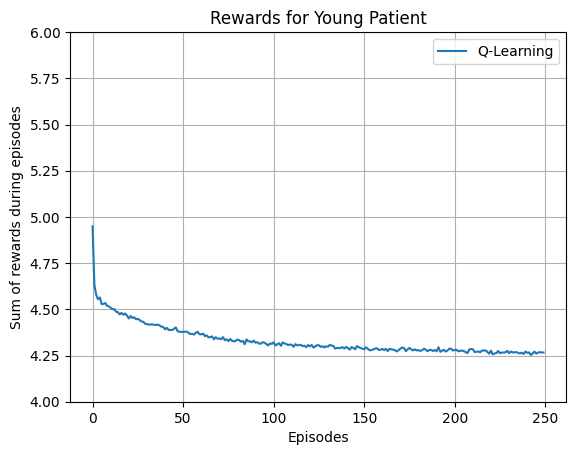

Plotting: Q-Learning - Max time steps: 35688.0000, Min time steps: 14733.0000


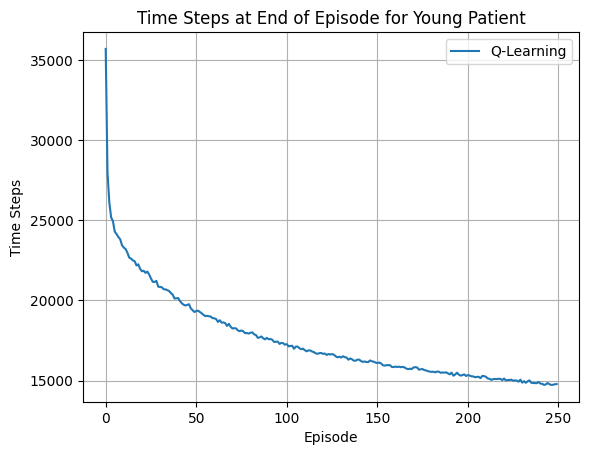

=====IMPLEMENTING OPTIMAL POLICY FOR  120 DAYS =====
Day 0 | Tumor Size: 0.900000 | State Index: 18 | Dose: 2.5
Day 1 | Tumor Size: 0.573678 | State Index: 14 | Dose: 8
Day 2 | Tumor Size: 0.263229 | State Index: 8 | Dose: 3.5
Day 3 | Tumor Size: 0.250237 | State Index: 8 | Dose: 3.5
Day 4 | Tumor Size: 0.227220 | State Index: 7 | Dose: 3
Day 5 | Tumor Size: 0.210578 | State Index: 7 | Dose: 3
Day 6 | Tumor Size: 0.189073 | State Index: 6 | Dose: 9
Day 7 | Tumor Size: 0.095495 | State Index: 5 | Dose: 10
Day 8 | Tumor Size: 0.050255 | State Index: 5 | Dose: 10
Day 9 | Tumor Size: 0.028275 | State Index: 3 | Dose: 5
Day 10 | Tumor Size: 0.026711 | State Index: 3 | Dose: 5
Day 11 | Tumor Size: 0.022913 | State Index: 2 | Dose: 9
Day 12 | Tumor Size: 0.012582 | State Index: 2 | Dose: 9
Day 13 | Tumor Size: 0.007303 | State Index: 1 | Dose: 8
Day 14 | Tumor Size: 0.004794 | State Index: 0 | Dose: 0
Day 15 | Tumor Size: 0.006849 | State Index: 1 | Dose: 8
Day 16 | Tumor Size: 0.004313 | Sta

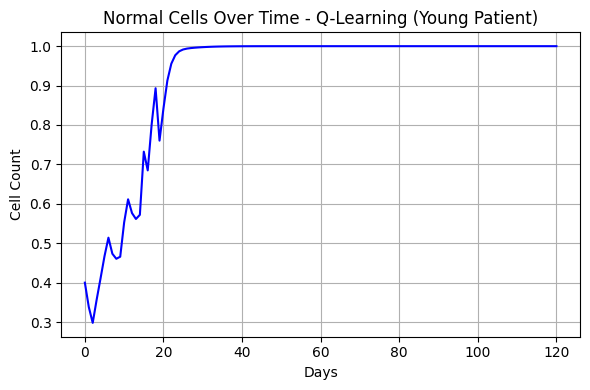

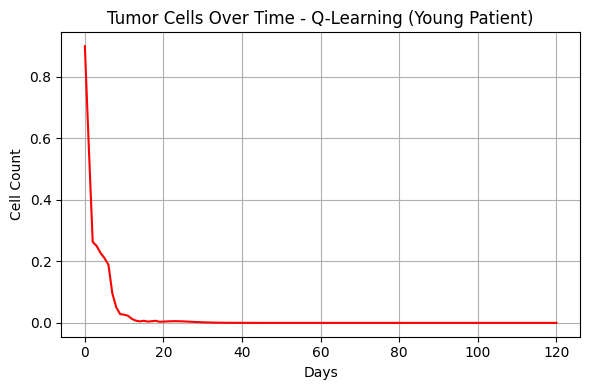

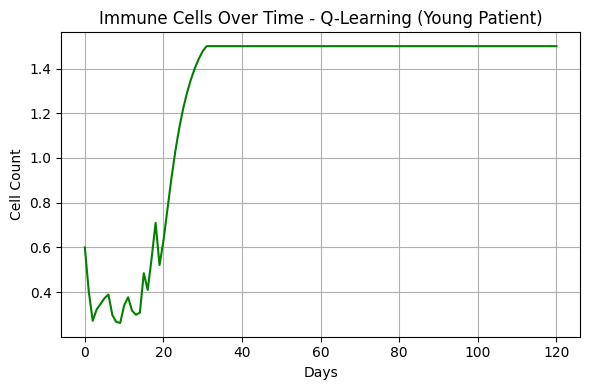

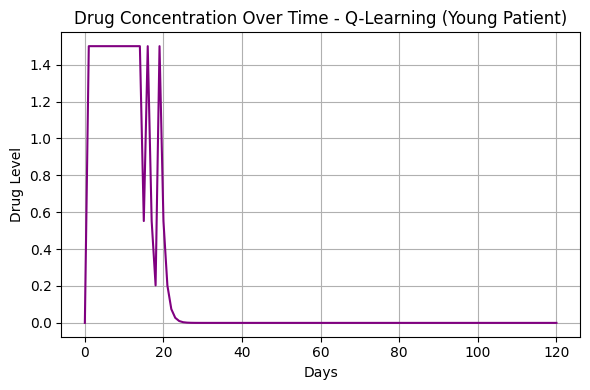

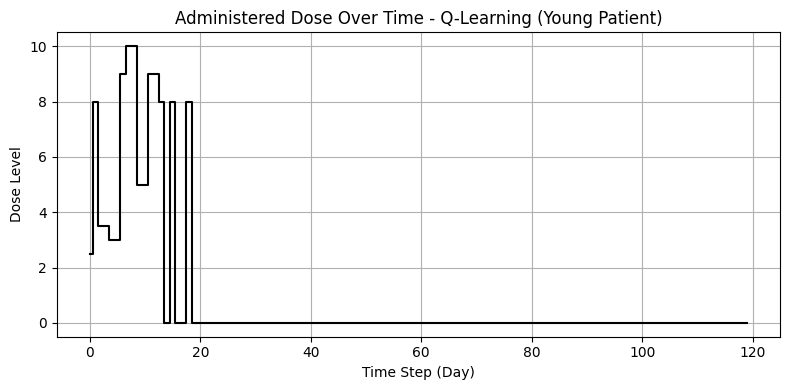

In [21]:
#Q LEARNING FOR YOUNG PATIENT
# Run the Q-learning algorithm for the young patient
# - `patient_type_young`: The patient type (young)
# - `young_dose_levels`: The list of possible drug dosages
# - `young_tumor_bins`: The tumor size bins representing states
# - `q_learning_algo`: The algorithm to be used (Q-learning)
# - `0.7`: The discount factor (gamma) for future rewards

young_qlearning_start_time = time.time()
young_time_steps_qlearning, young_tumor_sizes_qlearning, young_qlearning_rewards, young_qlearning_optimal_policy = run_algorithms(patient_type_young, young_dose_levels, young_tumor_bins, q_learning_algo, 0.7)
young_qlearning_end_time = time.time()
young_qlearning_time = young_qlearning_end_time - young_qlearning_start_time
print(f"\n===== TIME TAKEN TO TRAIN Q LEARNING FOR YOUNG PATIENT ===== {young_qlearning_time:.2f} seconds")

# Plot Rewards
# Plot the sum of rewards collected during the episodes for Q-learning
# The plot shows how rewards change over episodes during the training process
plot_rewards([(young_qlearning_rewards, q_learning_algo)], young_patient_title)

# Plot Timesteps
# Plot the time steps taken in each episode, showing how the learning agent progresses
# This will help us understand how many steps the algorithm needed to complete each episode
plot_time_steps([
    (young_time_steps_qlearning, q_learning_algo)
], young_patient_title)


# --- Run the Optimal Policy for 120 days ---
# This simulates how the agent would treat the patient with the optimal policy obtained from training
# - `young_qlearning_optimal_policy`: The learned policy (optimal actions to take for each state)
# - `young_dose_levels`: The list of drug dosages (actions)
# - `young_tumor_bins`: The tumor size bins (state space)
# - `120`: The number of days to run the policy (duration of treatment)
env = CancerTreatmentEnv(patient_type=patient_type_young) 
young_qlearning_trajectory, young_qlearning_optimal_doses, young_qlearning_lethal_doses = run_policy(env, young_qlearning_optimal_policy, young_dose_levels, young_tumor_bins, 120, patient_type_young)
print(f"\n===== FINAL TRAJECTORY OF YOUNG PATIENT WITH Q LEARNING ===== \n{young_qlearning_trajectory} ")
print(f"\n===== FINAL DOSES OF YOUNG PATIENT WITH Q LEARNING===== \n{young_qlearning_optimal_doses} ")

# --- Plot the Trajectory and Dose Schedule ---
# Plot the trajectory of normal cells, tumor cells, immune cells, and drug concentration over time
# This visualises how the system evolves based on the Q-learning optimal policy
# The dose schedule is also plotted to show the doses given each day
plot_trajectory(young_qlearning_trajectory, young_qlearning_optimal_doses, q_learning_algo, young_patient_title)

#### 4.6.2. Elderly Patient Q Learning
For the elderly patient, the same Q-learning framework is applied; however, the reward structure is modified to reflect age-specific treatment considerations, such as increased sensitivity to drug toxicity. Additionally, the agent is trained on a distinct action space and state space using a tailored set of dose levels and coarser tumor size bins appropriate for elderly physiology (see [Table 1](#States)). These adjustments ensure the learning process accounts for the unique clinical priorities in geriatric oncology.

Starting Q-Learning for elderly patient with gamma= 0.7

Check rewards:

First 10 rewards: [5137.32954144 5250.33934883 5374.42197914 5487.3564643  5616.20989166
 5757.53287369 5819.72519889 5849.97476885 5967.11952866 6148.35312113]

Last 10 rewards: [9141.03904961 9012.60763752 9096.60428819 9086.33840309 8998.1547592
 9097.22356282 9126.65211775 9103.18712014 9050.60146215 9081.34731653]

=====Final Q-table for Q Learning: 

State 0 -> [0.73938087, 0.53954952, 0.50624813, 0.52331684, 0.54685245, 0.46997984,
                  0.51800057, 0.46680630, 0.49088764, 0.50494168, 0.42023309, 0.49804003,
                  0.44804029, 0.42535810, 0.47587152, 0.40270651, 0.41233609, 0.42665096, 0.40178858, 0.40608384]

State 1 -> [0.27400178, 0.19509354, 0.24851615, 0.29656981, 0.28060007, 0.28601891,
                  0.27767375, 0.28365547, 0.34228185, 0.27116863, 0.26934013, 0.28177284,
                  0.23259375, 0.21384806, 0.28825394, 0.22782976, 0.18714829, 0.28597046, 0.29101024, 0.2

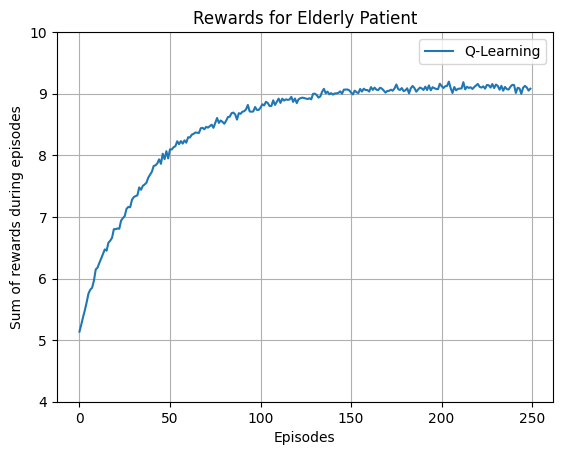

Plotting: Q-Learning - Max time steps: 58685.0000, Min time steps: 51333.0000


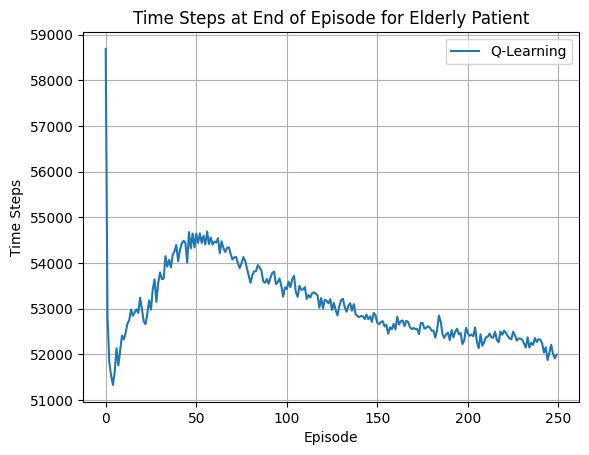

=====IMPLEMENTING OPTIMAL POLICY FOR  120 DAYS =====
Day 0 | Tumor Size: 0.900000 | State Index: 9 | Dose: 5
Day 1 | Tumor Size: 0.473098 | State Index: 5 | Dose: 9
Day 2 | Tumor Size: 0.217681 | State Index: 3 | Dose: 9
Day 3 | Tumor Size: 0.130461 | State Index: 2 | Dose: 6
Day 4 | Tumor Size: 0.112891 | State Index: 2 | Dose: 6
Day 5 | Tumor Size: 0.092689 | State Index: 2 | Dose: 6
Day 6 | Tumor Size: 0.073455 | State Index: 2 | Dose: 6
Day 7 | Tumor Size: 0.056751 | State Index: 1 | Dose: 1.5
Day 8 | Tumor Size: 0.066171 | State Index: 1 | Dose: 1.5
Day 9 | Tumor Size: 0.067504 | State Index: 1 | Dose: 1.5
Day 10 | Tumor Size: 0.064304 | State Index: 1 | Dose: 1.5
Day 11 | Tumor Size: 0.059272 | State Index: 1 | Dose: 1.5
Day 12 | Tumor Size: 0.053775 | State Index: 1 | Dose: 1.5
Day 13 | Tumor Size: 0.048399 | State Index: 1 | Dose: 1.5
Day 14 | Tumor Size: 0.043369 | State Index: 1 | Dose: 1.5
Day 15 | Tumor Size: 0.038753 | State Index: 1 | Dose: 1.5
Day 16 | Tumor Size: 0.0345

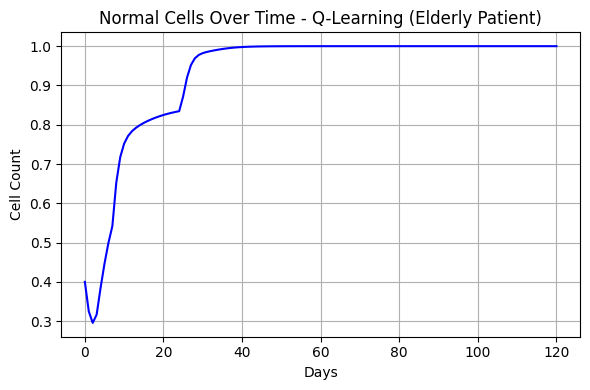

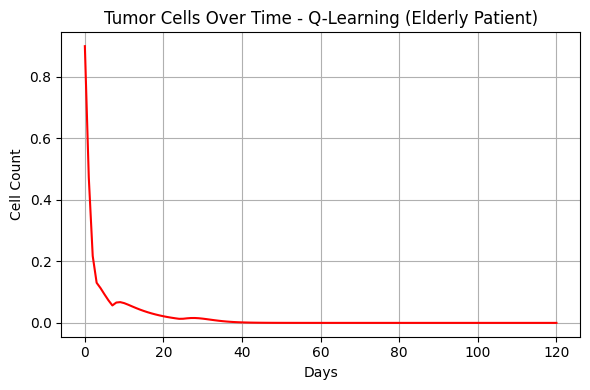

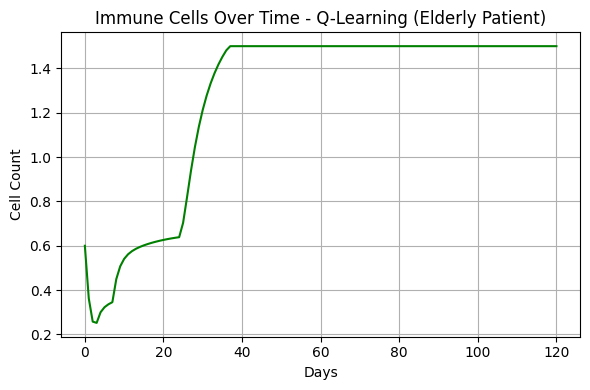

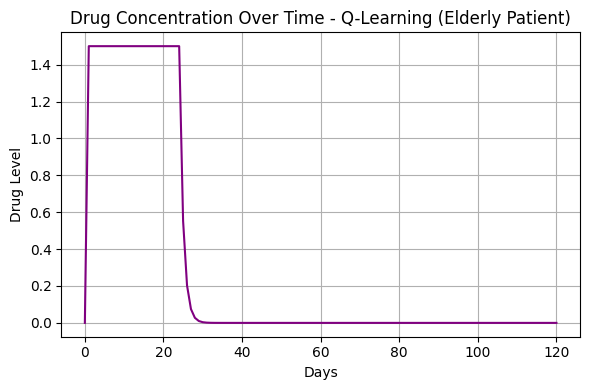

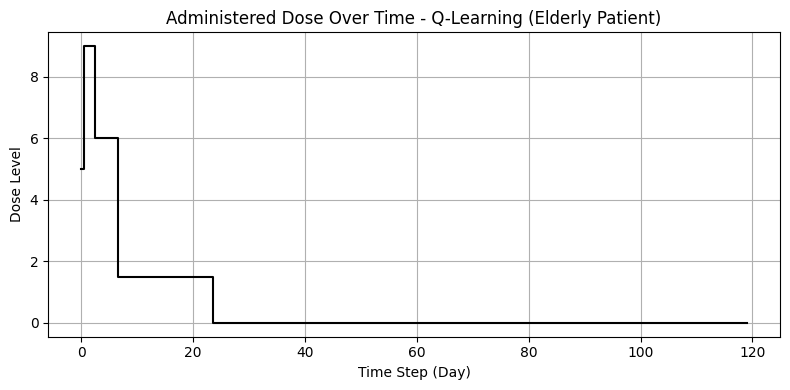

In [52]:
# ========================================================
# Q-LEARNING TRAINING AND EVALUATION FOR ELDERLY PATIENT
# ========================================================

# Train the Q-learning algorithm for an elderly patient type.
# This function returns:
# - time steps per episode
# - tumor sizes recorded during training
# - reward curve per episode
# - the optimal policy learned
elderly_qlearning_start_time = time.time()
elderly_time_steps_qlearning, elderly_tumor_sizes_qlearning, elderly_qlearning_rewards, elderly_qlearning_optimal_policy = run_algorithms(patient_type_elderly, elderly_dose_levels, elderly_tumor_bins, q_learning_algo, 0.7)
elderly_qlearning_end_time = time.time()
elderly_qlearning_time = elderly_qlearning_end_time - elderly_qlearning_start_time
print(f"\n===== TIME TAKEN TO TRAIN Q LEARNING FOR ELDERLY PATIENT ===== {elderly_qlearning_time:.2f} seconds")

# Plot Rewards
plot_rewards([(elderly_qlearning_rewards, q_learning_algo)], elderly_patient_title)

# Plot Timesteps
plot_time_steps([
    (elderly_time_steps_qlearning, q_learning_algo),
], elderly_patient_title)

# --- Run the Optimal Policy for 120 days ---
# Simulate the policy learned by Q-learning over 120 days.
# Returns:
# - trajectory of [normal, tumor, immune, drug] cell levels
# - sequence of doses applied
# - count of lethal doses used
env = CancerTreatmentEnv(patient_type=patient_type_elderly) 
elderly_qlearning_trajectory, elderly_qlearning_optimal_doses, elderly_qlearning_lethal_doses = run_policy(env, elderly_qlearning_optimal_policy, elderly_dose_levels, elderly_tumor_bins, 120, patient_type_elderly)
print(f"\n===== FINAL TRAJECTORY OF ELDERLY PATIENT WITH Q LEARNING ===== {elderly_qlearning_trajectory} ")
print(f"\n===== FINAL DOSES OF ELDERLY PATIENT WITH Q LEARNING ===== {elderly_qlearning_optimal_doses} ")

# Plot the trajectory of cells and drug levels over time.
plot_trajectory(elderly_qlearning_trajectory, elderly_qlearning_optimal_doses, q_learning_algo, elderly_patient_title)


### 4.7. Double Q-Learning

#### 4.7.1 .Young Patient Double Q Learning 
The agent is trained using the Double Q-learning algorithm, which mitigates overestimation bias by decoupling action selection from evaluation. A discount factor of 0.7 is used to weigh future rewards. Training progress is evaluated through cumulative reward trends and episode durations, and the final learned policy is simulated over 120 days to examine treatment efficacy and dose patterns.

Starting Double-Q-Learning for young patient with gamma= 0.7

Check rewards:

First 10 rewards: [4847.88634312 4479.52964209 4442.69570339 4420.05418082 4427.38234928
 4413.50736179 4412.31800647 4407.13666938 4401.17515828 4406.89037716]

Last 10 rewards: [4276.00117098 4272.87857143 4274.60169647 4284.38840392 4277.55102678
 4275.34419004 4279.01011255 4269.13170444 4270.35132073 4268.80372732]

=====Final Combined Q-table (Q1 + Q2) for Double Q Learning: 

State 0 -> [0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000]

State 1 -> [0.10298497, 0.10696129, 0.10322250, 0.11089853, 0.10056717, 0.14331659,
                  0.32154659, 0.13598766, 0.07302786, 0.06729836, 0.16584405, 0.08951919,
                  0.04410604, 0.08373997, 0.15706207, 0.17613248, 0.20907

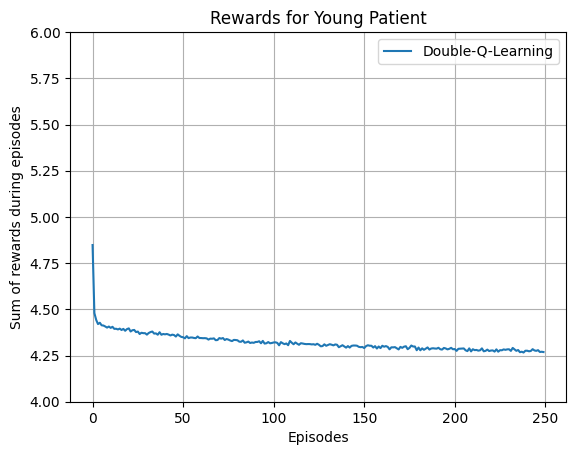

Plotting: Double-Q-Learning - Max time steps: 31947.0000, Min time steps: 16133.0000


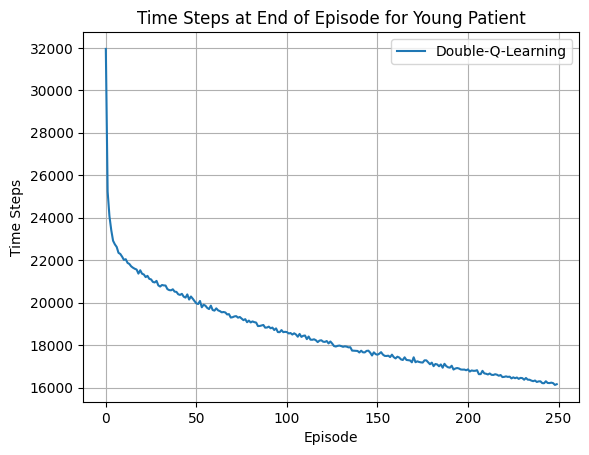

=====IMPLEMENTING OPTIMAL POLICY FOR  120 DAYS =====
Day 0 | Tumor Size: 0.900000 | State Index: 18 | Dose: 6
Day 1 | Tumor Size: 0.437242 | State Index: 11 | Dose: 9
Day 2 | Tumor Size: 0.208345 | State Index: 7 | Dose: 10
Day 3 | Tumor Size: 0.114370 | State Index: 6 | Dose: 10
Day 4 | Tumor Size: 0.068554 | State Index: 5 | Dose: 8
Day 5 | Tumor Size: 0.051330 | State Index: 5 | Dose: 8
Day 6 | Tumor Size: 0.036830 | State Index: 4 | Dose: 10
Day 7 | Tumor Size: 0.020961 | State Index: 2 | Dose: 6
Day 8 | Tumor Size: 0.018040 | State Index: 2 | Dose: 6
Day 9 | Tumor Size: 0.014377 | State Index: 2 | Dose: 6
Day 10 | Tumor Size: 0.010968 | State Index: 1 | Dose: 9
Day 11 | Tumor Size: 0.006075 | State Index: 0 | Dose: 0
Day 12 | Tumor Size: 0.008548 | State Index: 1 | Dose: 9
Day 13 | Tumor Size: 0.004843 | State Index: 0 | Dose: 0
Day 14 | Tumor Size: 0.006204 | State Index: 0 | Dose: 0
Day 15 | Tumor Size: 0.007824 | State Index: 1 | Dose: 9
Day 16 | Tumor Size: 0.003918 | State In

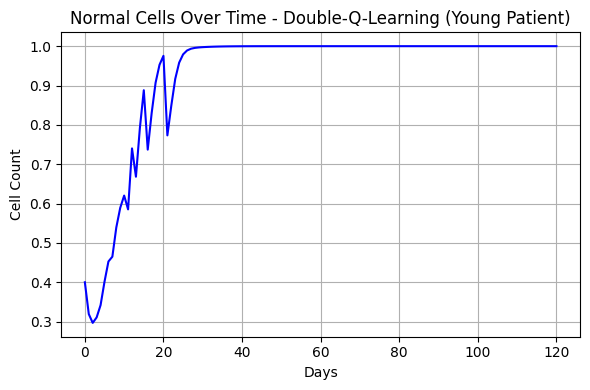

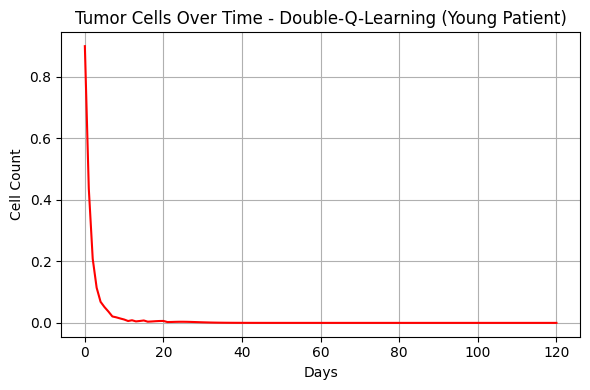

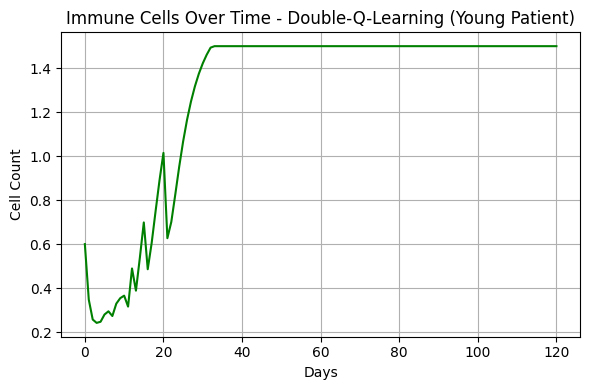

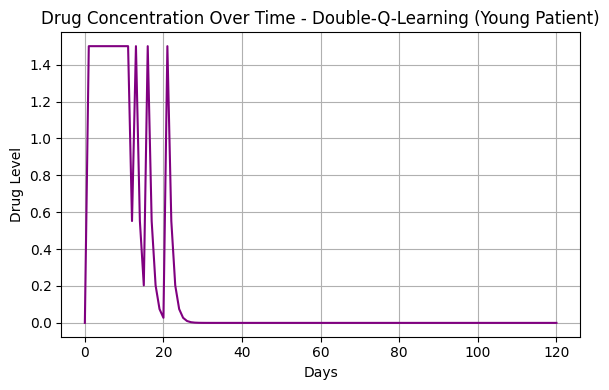

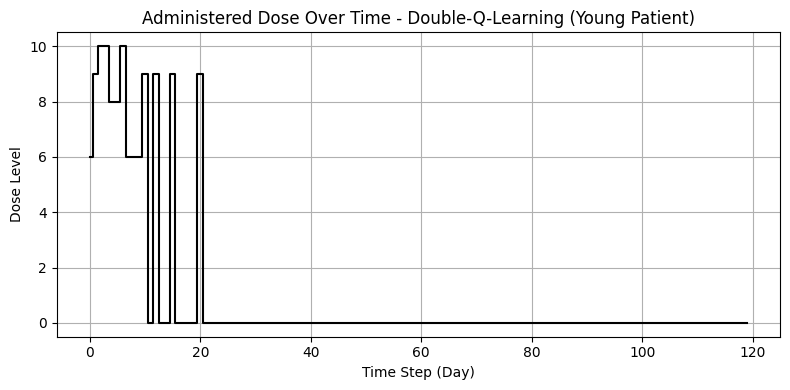

In [23]:
#DOUBLE Q LEARNING YOUNG PATIENT
young_dqlearning_start_time = time.time()
young_time_steps_dqlearning, young_tumor_sizes_dqlearning, young_dqlearning_rewards, young_dqlearning_optimal_policy = run_algorithms(patient_type_young, young_dose_levels, young_tumor_bins, double_q_learning_algo, 0.7)
young_dqlearning_end_time = time.time()
young_dqlearning_time = young_dqlearning_end_time - young_dqlearning_start_time
print(f"\n===== TIME TAKEN FOR TRAINING DOUBLE Q LEARNING ALGORITHM FOR YOUNG PATIENT ===== {young_dqlearning_time:.2f} seconds")

# Plot Rewards
plot_rewards([(young_dqlearning_rewards, double_q_learning_algo)], young_patient_title)

# Plot Timesteps
plot_time_steps([
    (young_time_steps_dqlearning, double_q_learning_algo)
], young_patient_title)

# --- Run the Optimal Policy for 120 days ---
env = CancerTreatmentEnv(patient_type=patient_type_young)  
young_dqlearning_trajectory, young_dqlearning_optimal_doses, young_dqlearning_lethal_doses = run_policy(env, young_dqlearning_optimal_policy, young_dose_levels, young_tumor_bins, 120, patient_type_young)
print(f"\n===== FINAL TRAJECTORY FOR DOUBLE Q LEARNING FOR YOUNG PATIENT ===== {young_dqlearning_trajectory} ")
print(f"\n===== FINAL DOSES FOR DOUBLE Q LEARNING FOR YOUNG PATIENT ===== {young_dqlearning_optimal_doses} ")

# --- Plot the Trajectory and Dose Schedule ---
plot_trajectory(young_dqlearning_trajectory, young_dqlearning_optimal_doses, double_q_learning_algo, young_patient_title)

#### 4.7.2. Elderly Patient Double Q Learning 
The agent is trained for the elderly patient using the Double Q-learning algorithm, maintaining the same parameters as those used in the Q-learning simulation.

Starting Double-Q-Learning for elderly patient with gamma= 0.7

Check rewards:

First 10 rewards: [5055.58968883 5081.86499488 5189.67734879 5228.50119366 5320.89940471
 5373.17044717 5454.32754716 5569.74590896 5557.7137153  5592.86890038]

Last 10 rewards: [8985.98393072 9026.6483672  9051.68560535 9047.5155703  8971.82796204
 9064.42746768 8983.97480873 9063.11560298 8945.40133948 9036.49274035]

=====Final Combined Q-table (Q1 + Q2) for Double Q Learning: 

State 0 -> [1.49594265, 0.98965702, 0.84838008, 1.00885449, 1.00933675, 0.84531558,
                  0.93487273, 0.76416326, 0.77125478, 0.93446930, 0.74862328, 0.85604091,
                  0.91706299, 0.89801867, 0.66594607, 0.64980299, 0.83003835, 0.78556855, 0.76407809, 0.66374366]

State 1 -> [0.36309879, 0.59783338, 0.45880773, 0.52899788, 0.43442184, 0.40580207,
                  0.37056796, 0.43323260, 0.31731810, 0.29123523, 0.73204922, 0.42650670,
                  0.30479233, 0.42090611, 0.31287062, 0.30551637, 0.455

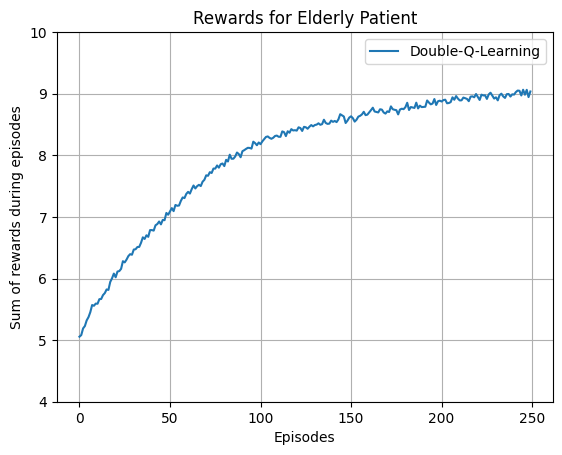

Plotting: Double-Q-Learning - Max time steps: 54973.0000, Min time steps: 50168.0000


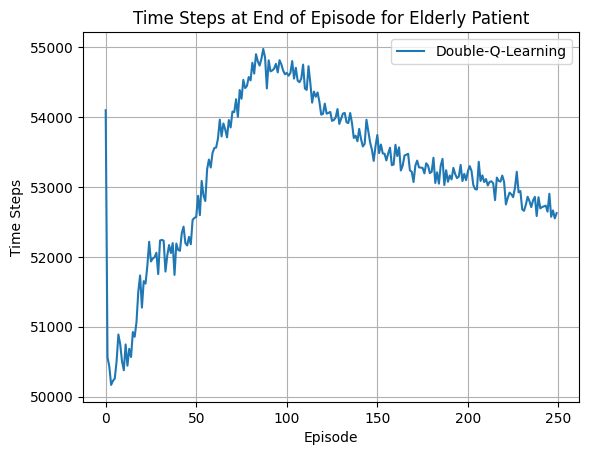

=====IMPLEMENTING OPTIMAL POLICY FOR  120 DAYS =====
Day 0 | Tumor Size: 0.900000 | State Index: 9 | Dose: 3.5
Day 1 | Tumor Size: 0.531500 | State Index: 6 | Dose: 1
Day 2 | Tumor Size: 0.459746 | State Index: 5 | Dose: 1.5
Day 3 | Tumor Size: 0.418551 | State Index: 5 | Dose: 1.5
Day 4 | Tumor Size: 0.379570 | State Index: 5 | Dose: 1.5
Day 5 | Tumor Size: 0.346637 | State Index: 4 | Dose: 9
Day 6 | Tumor Size: 0.163362 | State Index: 3 | Dose: 6
Day 7 | Tumor Size: 0.127514 | State Index: 2 | Dose: 7
Day 8 | Tumor Size: 0.089864 | State Index: 2 | Dose: 7
Day 9 | Tumor Size: 0.064209 | State Index: 2 | Dose: 7
Day 10 | Tumor Size: 0.045799 | State Index: 1 | Dose: 2.5
Day 11 | Tumor Size: 0.050134 | State Index: 1 | Dose: 2.5
Day 12 | Tumor Size: 0.048732 | State Index: 1 | Dose: 2.5
Day 13 | Tumor Size: 0.044514 | State Index: 1 | Dose: 2.5
Day 14 | Tumor Size: 0.039431 | State Index: 1 | Dose: 2.5
Day 15 | Tumor Size: 0.034404 | State Index: 1 | Dose: 2.5
Day 16 | Tumor Size: 0.02

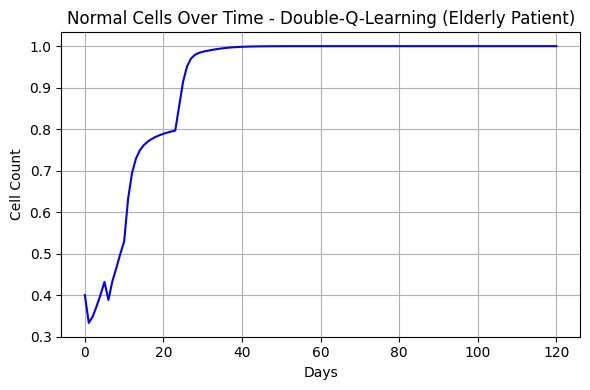

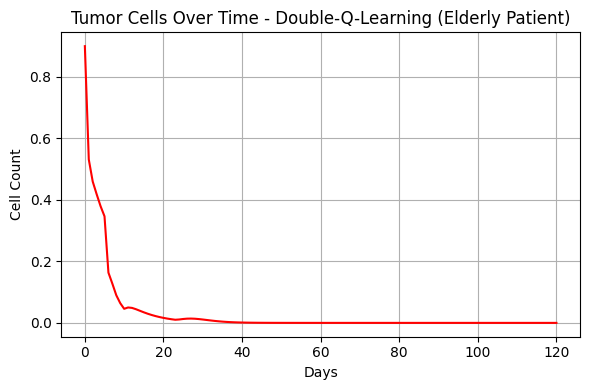

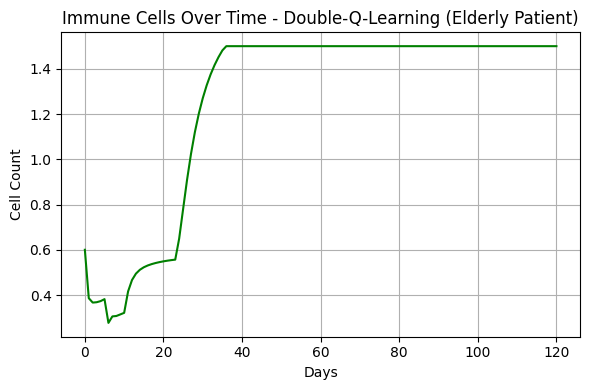

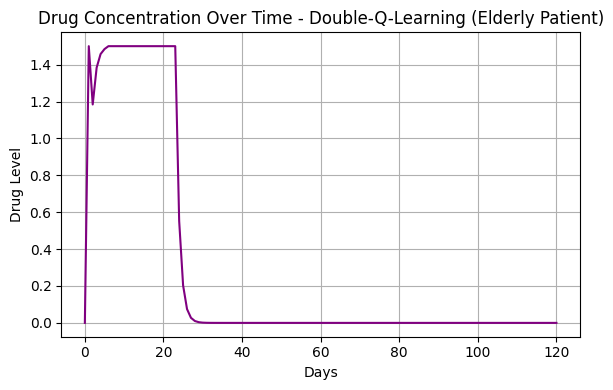

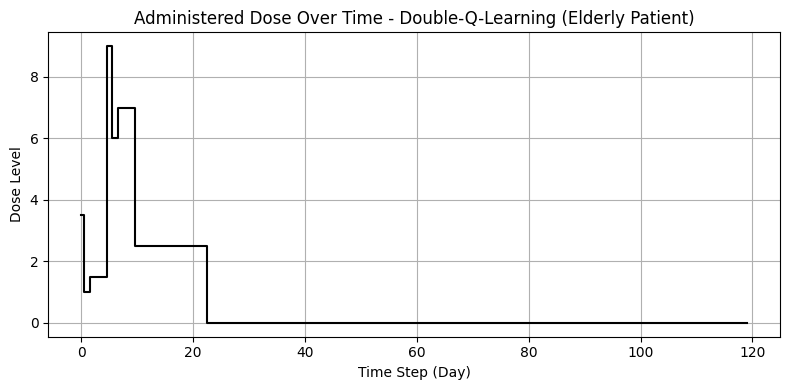

In [24]:
# ==============================================================
# DOUBLE-Q-LEARNING TRAINING AND EVALUATION FOR ELDERLY PATIENT
# ==============================================================
elderly_dqlearning_start_time = time.time()
elderly_time_steps_dqlearning, elderly_tumor_sizes_dqlearning, elderly_dqlearning_rewards, elderly_dqlearning_optimal_policy = run_algorithms(patient_type_elderly, elderly_dose_levels, elderly_tumor_bins, double_q_learning_algo, 0.7)
elderly_dqlearning_end_time = time.time()
elderly_dqlearning_time = elderly_dqlearning_end_time - elderly_dqlearning_start_time
print(f"\n===== TIME TAKEN TO TRAIN DOUBLE Q LEARNING FOR ELDERLY PATIENT ===== {elderly_dqlearning_time:.2f} seconds")

# Plot Rewards
plot_rewards([(elderly_dqlearning_rewards, double_q_learning_algo)], elderly_patient_title)

# Plot Timesteps
plot_time_steps([
    (elderly_time_steps_dqlearning, double_q_learning_algo)
], elderly_patient_title)

# --- Run the Optimal Policy for 30 days ---
env = CancerTreatmentEnv(patient_type=patient_type_elderly) 
elderly_dqlearning_trajectory, elderly_dqlearning_optimal_doses, elderly_dqlearning_lethal_doses = run_policy(env, elderly_dqlearning_optimal_policy, elderly_dose_levels, elderly_tumor_bins, 120, patient_type_elderly)
print(f"\n===== FINAL TRAJECTORY OF ELDERLY PATIENT WITH DOUBLE Q LEARNING ===== {elderly_dqlearning_trajectory} ")
print(f"\n===== FINAL DOSES OF ELDERLY PATIENT WITH DOUBLE Q LEARNING ===== {elderly_dqlearning_optimal_doses} ")

# Plot the trajectory of cells and drug levels over time.
plot_trajectory(elderly_dqlearning_trajectory, elderly_dqlearning_optimal_doses, double_q_learning_algo, elderly_patient_title)

### 4.8. SARSA

#### 4.8.1 Young Patient SARSA
The SARSA algorithm is used to train the agent with a discount factor of 0.7, enabling learning from the current action and policy trajectory. Unlike Q-learning, SARSA updates the policy using the next action actually taken, promoting a more conservative strategy. The training is monitored via reward accumulation and step counts, with post-training simulations run for 120 days to analyse patient outcomes and dosing dynamics.

Starting SARSA for young patient with gamma= 0.7

Check rewards:

First 10 rewards: [4942.91215437 4616.82300233 4546.29523695 4520.19605544 4500.51377271
 4494.75244554 4480.30584133 4481.37698924 4466.07032757 4455.52640772]

Last 10 rewards: [4246.7428329  4245.18126507 4238.82013828 4246.00024873 4241.90991809
 4241.74272233 4244.65588498 4251.87643066 4238.9178114  4245.18645416]

=====Final Q-table for SARSA: 

State 0 -> [0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000]

State 1 -> [0.11455501, 0.11747561, 0.08319239, 0.04351722, 0.14757654, 0.07967607,
                  0.08006284, 0.10810530, 0.10674697, 0.09682301, 0.06759450, 0.09865883,
                  0.23994533, 0.14369856, 0.18248114, 0.06305135, 0.06188712, 0.21947904, 0.55029771, 0.17896521]

S

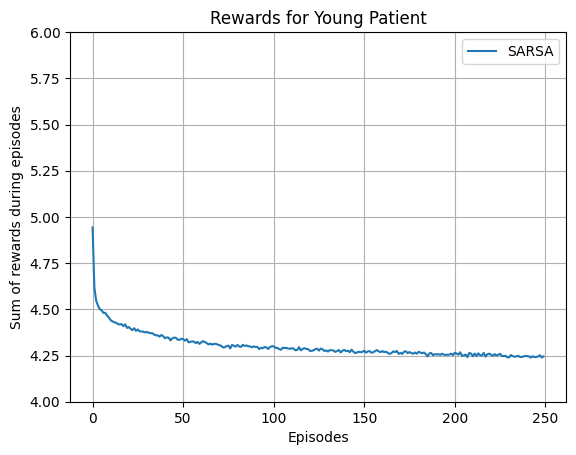

Plotting: SARSA - Max time steps: 35529.0000, Min time steps: 14092.0000


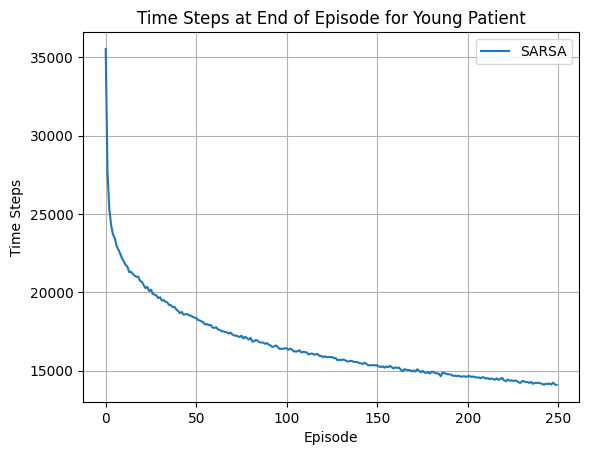

=====IMPLEMENTING OPTIMAL POLICY FOR  120 DAYS =====
Day 0 | Tumor Size: 0.900000 | State Index: 18 | Dose: 10
Day 1 | Tumor Size: 0.315778 | State Index: 9 | Dose: 6
Day 2 | Tumor Size: 0.226150 | State Index: 7 | Dose: 9
Day 3 | Tumor Size: 0.130508 | State Index: 6 | Dose: 10
Day 4 | Tumor Size: 0.074863 | State Index: 5 | Dose: 6
Day 5 | Tumor Size: 0.066755 | State Index: 5 | Dose: 6
Day 6 | Tumor Size: 0.055089 | State Index: 5 | Dose: 6
Day 7 | Tumor Size: 0.043328 | State Index: 4 | Dose: 7
Day 8 | Tumor Size: 0.029989 | State Index: 3 | Dose: 8
Day 9 | Tumor Size: 0.018865 | State Index: 2 | Dose: 9
Day 10 | Tumor Size: 0.010944 | State Index: 1 | Dose: 9
Day 11 | Tumor Size: 0.006511 | State Index: 1 | Dose: 9
Day 12 | Tumor Size: 0.003914 | State Index: 0 | Dose: 0
Day 13 | Tumor Size: 0.005749 | State Index: 0 | Dose: 0
Day 14 | Tumor Size: 0.007885 | State Index: 1 | Dose: 9
Day 15 | Tumor Size: 0.004119 | State Index: 0 | Dose: 0
Day 16 | Tumor Size: 0.004912 | State Inde

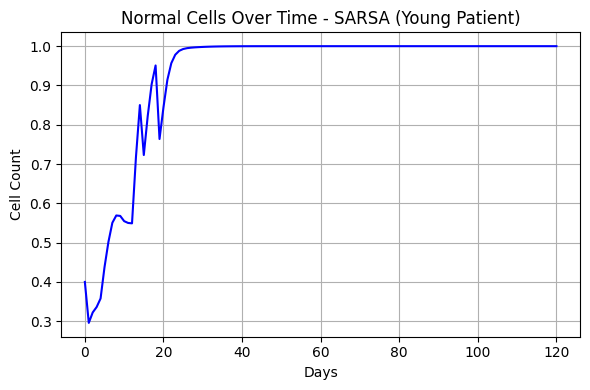

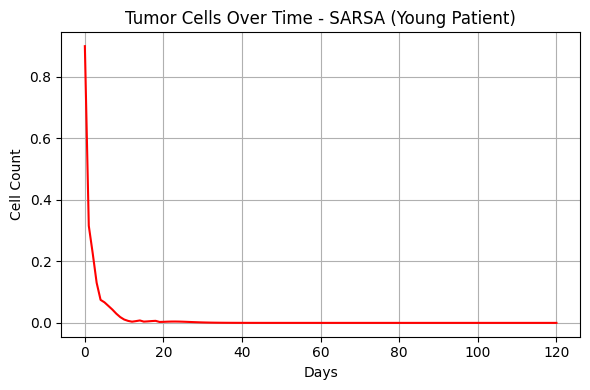

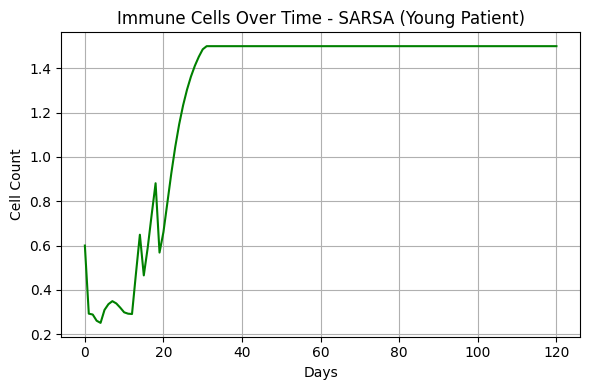

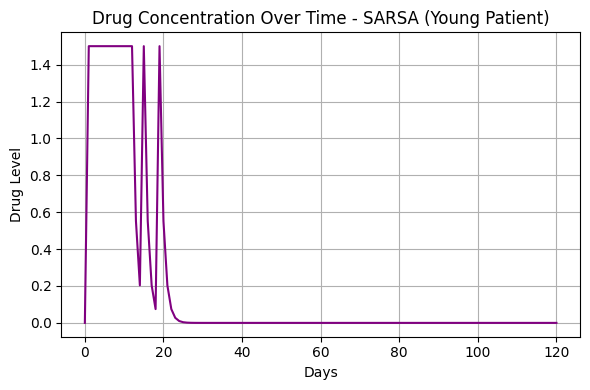

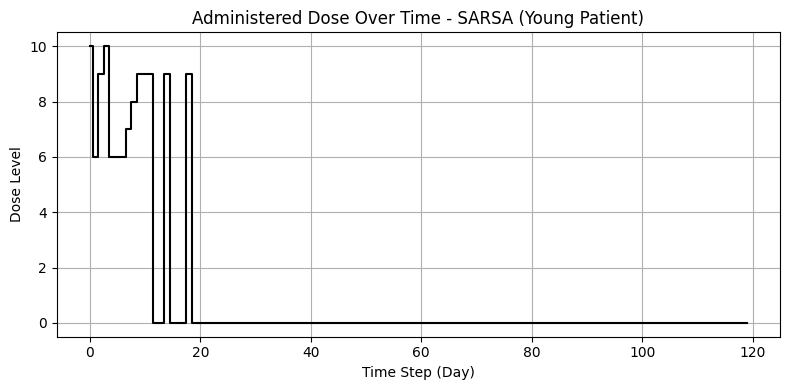

In [25]:
#SARSA FOR YOUNG PATIENT
young_sarsa_start_time = time.time()
young_time_steps_sarsa, young_tumor_sizes_sarsa, young_sarsa_rewards, young_sarsa_optimal_policy = run_algorithms(patient_type_young, young_dose_levels, young_tumor_bins, sarsa_algo, 0.7)
young_sarsa_end_time = time.time()
young_sarsa_time = young_sarsa_end_time - young_sarsa_start_time
print(f"\n===== TIME TAKEN TO TRAIN SARSA FOR YOUNG PATIENT ===== {young_sarsa_time:.2f} seconds")

# Plot Rewards
plot_rewards([(young_sarsa_rewards, sarsa_algo)], young_patient_title)

# Plot Timesteps
plot_time_steps([
    (young_time_steps_sarsa, sarsa_algo)
], young_patient_title)

# --- Run the Optimal Policy for 30 days ---
env = CancerTreatmentEnv(patient_type=patient_type_young) 
young_sarsa_trajectory, young_sarsa_optimal_doses, young_sarsa_lethal_doses = run_policy(env, young_sarsa_optimal_policy, young_dose_levels, young_tumor_bins, 120, patient_type_young)
print(f"\n===== FINAL TRAJECTORY OF YOUNG PATIENT WITH SARSA ===== {young_sarsa_trajectory} ")
print(f"\n===== FINAL DOSES OF YOUNG PATIENT WITH SARSA ===== {young_sarsa_optimal_doses} ")

# --- Plot the Trajectory and Dose Schedule ---
plot_trajectory(young_sarsa_trajectory, young_sarsa_optimal_doses, sarsa_algo, young_patient_title)

#### 4.8.2. Elderly Patient SARSA
The agent is trained for the elderly patient using the SARSA algorithm, maintaining the same parameters as those used in the Q-learning simulation.

Starting SARSA for elderly patient with gamma= 0.7

Check rewards:

First 10 rewards: [5067.67893642 5303.04261072 5445.41960132 5590.3513497  5626.69447162
 5804.66750218 5911.94422656 5988.44228429 6164.91082242 6230.34076547]

Last 10 rewards: [9108.31735298 9111.49118925 9131.0820758  9066.56361127 9069.82727582
 9042.91473547 9122.56817406 9136.09240233 9099.44863277 9100.77183496]

=====Final Q-table for SARSA: 

State 0 -> [0.69868657, 0.63409893, 0.53264752, 0.49298316, 0.51930947, 0.47005350,
                  0.43134816, 0.45804987, 0.42378101, 0.42771364, 0.48848960, 0.44160851,
                  0.48062340, 0.46061656, 0.46715432, 0.42465255, 0.42202986, 0.39405946, 0.42538741, 0.39140708]

State 1 -> [0.23209008, 0.23077469, 0.29307260, 0.26067300, 0.16895662, 0.16417064,
                  0.26719661, 0.26888057, 0.27188444, 0.30602531, 0.21889006, 0.26139161,
                  0.18288642, 0.24587809, 0.28424143, 0.26815415, 0.23014583, 0.25375629, 0.22582052, 0.25924786]


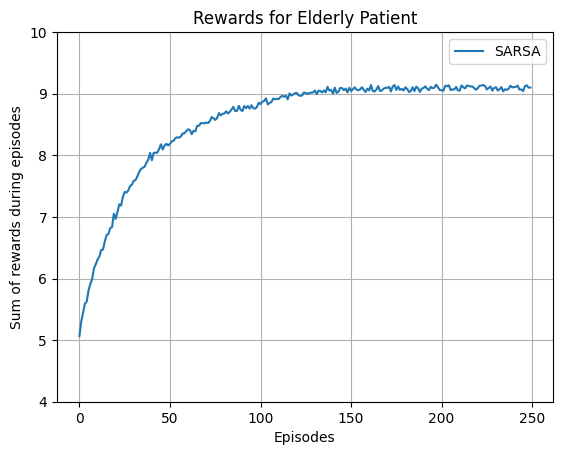

Plotting: SARSA - Max time steps: 57187.0000, Min time steps: 50968.0000


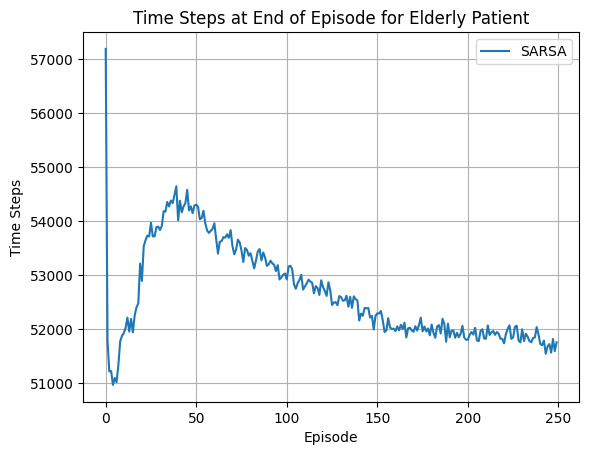

=====IMPLEMENTING OPTIMAL POLICY FOR  120 DAYS =====
Day 0 | Tumor Size: 0.900000 | State Index: 9 | Dose: 2
Day 1 | Tumor Size: 0.595947 | State Index: 7 | Dose: 7
Day 2 | Tumor Size: 0.301488 | State Index: 4 | Dose: 4
Day 3 | Tumor Size: 0.260707 | State Index: 3 | Dose: 10
Day 4 | Tumor Size: 0.128859 | State Index: 2 | Dose: 8
Day 5 | Tumor Size: 0.090161 | State Index: 2 | Dose: 8
Day 6 | Tumor Size: 0.063076 | State Index: 2 | Dose: 8
Day 7 | Tumor Size: 0.043634 | State Index: 1 | Dose: 2
Day 8 | Tumor Size: 0.053434 | State Index: 1 | Dose: 2
Day 9 | Tumor Size: 0.055741 | State Index: 1 | Dose: 2
Day 10 | Tumor Size: 0.053239 | State Index: 1 | Dose: 2
Day 11 | Tumor Size: 0.048655 | State Index: 1 | Dose: 2
Day 12 | Tumor Size: 0.043527 | State Index: 1 | Dose: 2
Day 13 | Tumor Size: 0.038532 | State Index: 1 | Dose: 2
Day 14 | Tumor Size: 0.033923 | State Index: 1 | Dose: 2
Day 15 | Tumor Size: 0.029769 | State Index: 1 | Dose: 2
Day 16 | Tumor Size: 0.026070 | State Index:

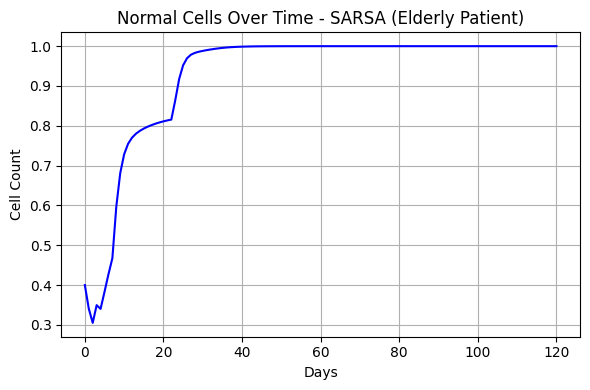

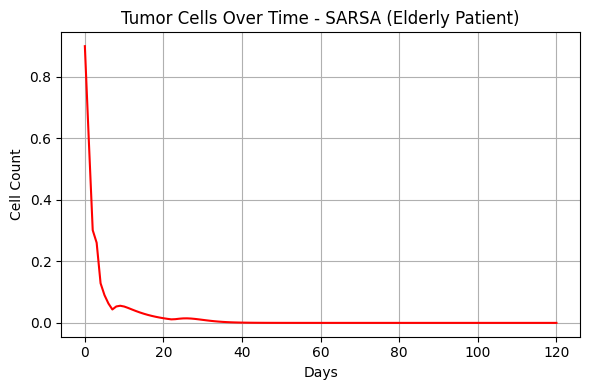

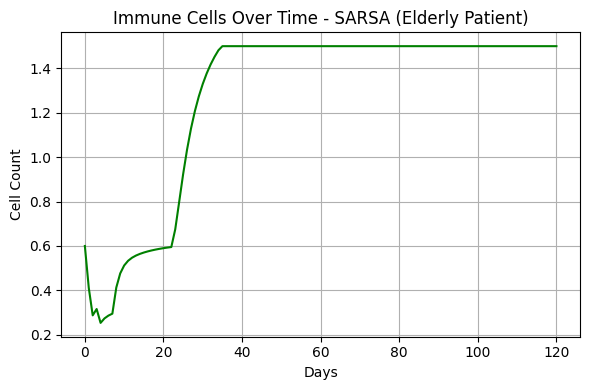

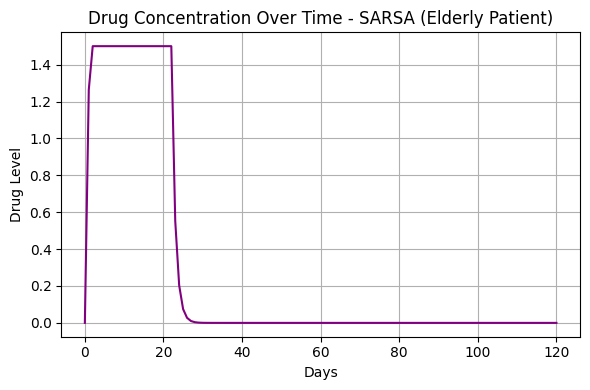

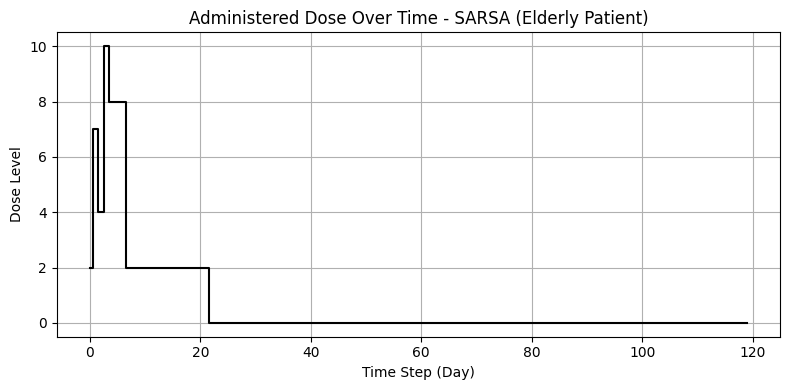

In [26]:
# ==============================================================
# SARSA TRAINING AND EVALUATION FOR ELDERLY PATIENT
# ==============================================================
elderly_sarsa_start_time = time.time()
elderly_time_steps_sarsa, elderly_tumor_sizes_sarsa, elderly_sarsa_rewards, elderly_sarsa_optimal_policy = run_algorithms(patient_type_elderly, elderly_dose_levels, elderly_tumor_bins, sarsa_algo, 0.7)
elderly_sarsa_end_time = time.time()
elderly_sarsa_time = elderly_sarsa_end_time - elderly_sarsa_start_time
print(f"\n===== TIME TAKEN TO TRAIN SARSA FOR ELDERLY PATIENT ===== {elderly_sarsa_time:.2f} seconds")

# Plot Rewards
plot_rewards([(elderly_sarsa_rewards, sarsa_algo)], elderly_patient_title)

# Plot Timesteps
plot_time_steps([
    (elderly_time_steps_sarsa, sarsa_algo)
], elderly_patient_title)

# --- Run the Optimal Policy for 30 days ---
env = CancerTreatmentEnv(patient_type=patient_type_elderly) 
elderly_sarsa_trajectory, elderly_sarsa_optimal_doses, elderly_sarsa_lethal_doses = run_policy(env, elderly_sarsa_optimal_policy, elderly_dose_levels, elderly_tumor_bins, 120, patient_type_elderly)
print(f"\n===== FINAL TRAJECTORY OF ELDERLY PATIENT WITH SARSA ==== {elderly_sarsa_trajectory} ")
print(f"\n===== FINAL DOSES OF ELDERLY PATIENT WITH SARSA ===== {elderly_sarsa_optimal_doses} ")

# Plot the trajectory of cells and drug levels over time.
plot_trajectory(elderly_sarsa_trajectory, elderly_sarsa_optimal_doses, sarsa_algo, elderly_patient_title)

## 5. Discussion & Evaluation 
---

### 5.1. Young Patient Algorithms Comparison

#### 5.1.1. Plot Cell Trajectories and Dose Schedules for Young Patient

In the analysis of the five graphs tracking the young patient's response over time, notable trends emerge across the three algorithms. For normal cells, Q-learning converges first (around day 21), followed by SARSA (around day 23) and Double Q-learning (around day 28). 

Tumor cell reduction shows similar trends for Q-learning and SARSA, both reaching zero by day 17, with Double Q-learning having a faster initial decrease. In terms of immune cells, Q-learning converges the earliest (around day 30), followed by SARSA (day 33) and Double Q-learning (day 37). 

The drug concentration in a young patient rapidly decreases within the first 20 days, stabilising near zero thereafter, regardless of the learning algorithm used. All three algorithms exhibit similar trends. Q-Learning shows a rapid decrease in drug concentration with a pronounced initial drop. SARSA's decrease is similar, with minor fluctuations during stabilisation (around day 25) due to its on-policy nature. Double Q-Learning also decreases rapidly but stabilises more smoothly around day 30.

SARSA does show more variability in the administered doses, with higher peaks and more frequent changes. Q-Learning and Double Q-Learning, on the other hand, have a narrower range of doses and appear more stable. However, all three algorithms ultimately reduce the dose to zero after the initial 20 days.

Clinically, Q-learning may be suitable for quick tumor control but risks underdosing, while SARSA could lead to toxicity with its higher dosing, and Double Q-learning may provide a safer, more controlled treatment strategy, though slower to stabilise immune response.

Plotting trajectories and optimal dose routines for all algorithms...


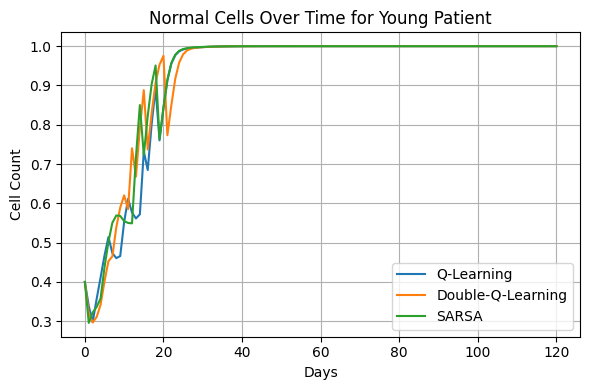

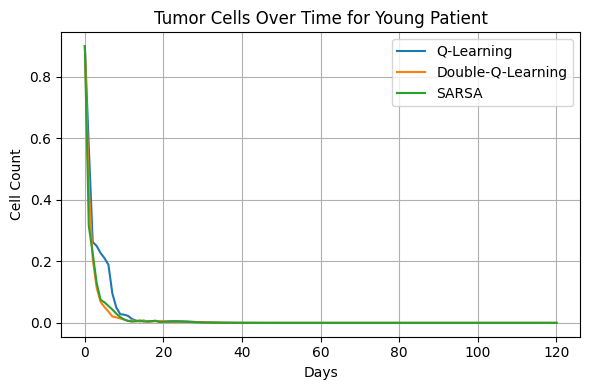

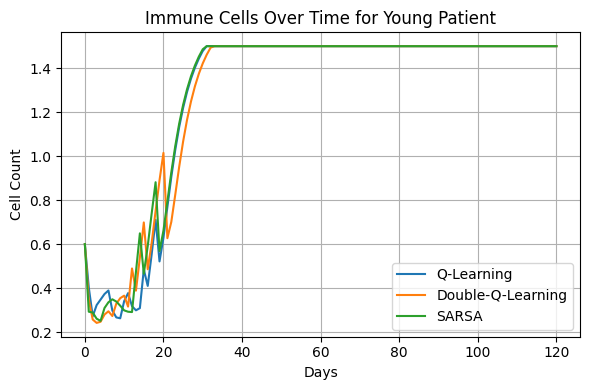

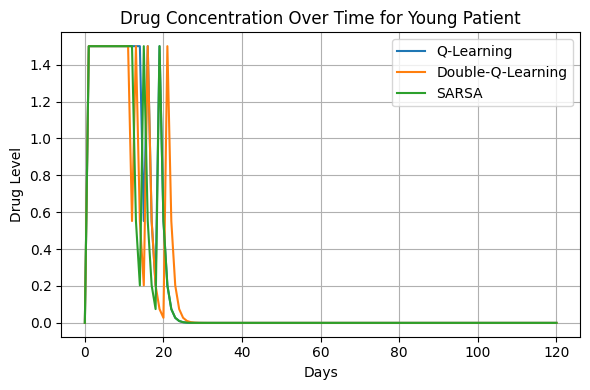

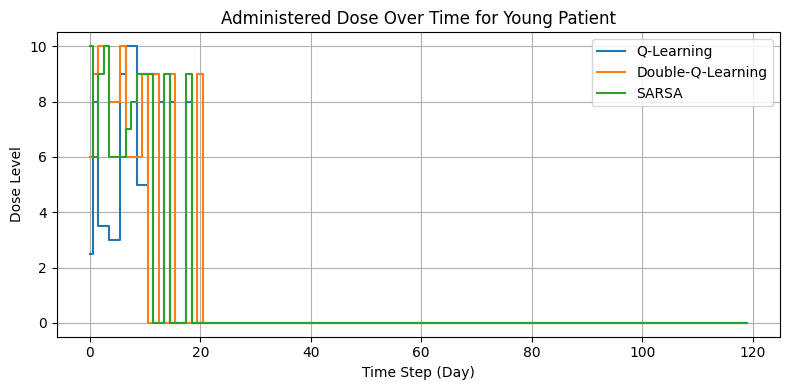

In [27]:
# --- Plot Cell Trajectories and Dose Schedules ---
# visualise how each algorithm affected the normal, tumor, and immune cell populations
# Also show the drug concentration and dose schedule over time
plot_trajectories([
    (young_qlearning_trajectory, young_qlearning_optimal_doses, q_learning_algo),
    (young_dqlearning_trajectory, young_dqlearning_optimal_doses, double_q_learning_algo),
    (young_sarsa_trajectory, young_sarsa_optimal_doses, sarsa_algo)
], young_patient_title)

#### 5.1.2. Rewards Comparison for Young Patient

The maximum and minimum rewards for Q-Learning, Double-Q-Learning, and SARSA are relatively close, with Q-Learning and SARSA achieving slightly higher rewards compared to Double-Q-Learning, indicating similar performance across the three algorithms. The similarity in reward distribution across the algorithms suggests, solely based on rewards, that all three reinforcement learning methods may be equally effective for optimising chemotherapy strategies for young patients, with minimal differentiation in their ability to reduce tumor size while maintaining normal cell health. Since rewards start high and then stabilise at a lower value after several episodes, this suggests that the algorithms initially explore the treatment environment and gradually refine their strategies. 

Plotting: Q-Learning - Max reward: 4.95, Min reward: 4.25
Plotting: Double-Q-Learning - Max reward: 4.85, Min reward: 4.27
Plotting: SARSA - Max reward: 4.94, Min reward: 4.24


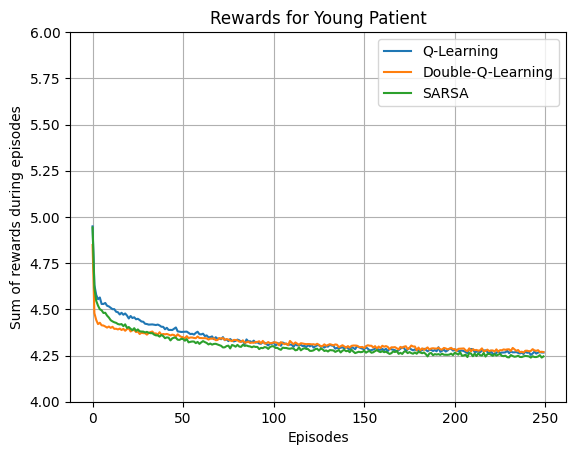

In [28]:
# ======================================================
# COMPARISON GRAPHS FOR YOUNG PATIENT
# ======================================================
# This section compares the performance of three RL algorithms—Q-Learning, Double Q-Learning, and SARSA—
# when applied to the treatment of a young cancer patient. The comparison is done using several metrics:
# rewards over episodes, cell population trajectories, episode duration (time steps),
# frequency of lethal dose administration, and training time.


# --- Plot Rewards Across Algorithms ---
# Compare how much cumulative reward each algorithm achieved per episode
plot_rewards([(young_qlearning_rewards, q_learning_algo),
              (young_dqlearning_rewards, double_q_learning_algo),
              (young_sarsa_rewards, sarsa_algo)
              ], young_patient_title)

#### 5.1.3. Timesteps Comparison for Young Patient
The number of time steps per episode decreases sharply for all three algorithms during the first 50 episodes and gradually flattens as training progresses, indicating convergence. Among the algorithms, SARSA achieves the fastest convergence, stabilising at the lowest time steps, followed by Q-Learning. Surprisingly, Double Q-Learning maintains consistently higher time steps across episodes, suggesting slower learning in this particular setup. This result could stem from the added variance introduced by maintaining two separate Q-tables, which might delay convergence despite its theoretical advantage of reducing overestimation bias.

Plotting: Q-Learning - Max time steps: 35688.0000, Min time steps: 14733.0000
Plotting: Double-Q-Learning - Max time steps: 31947.0000, Min time steps: 16133.0000
Plotting: SARSA - Max time steps: 35529.0000, Min time steps: 14092.0000


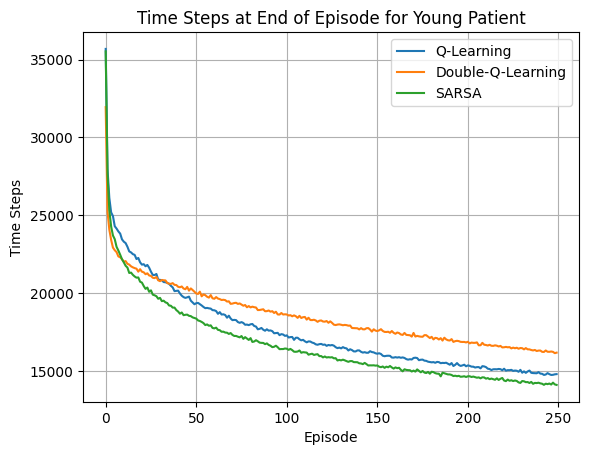

In [29]:
# --- Plot Time Steps Per Episode ---
# Shows how long each episode lasted (in terms of steps) during training for each algorithm
# Helps understand learning stability and efficiency
plot_time_steps([
    (young_time_steps_qlearning, q_learning_algo),
    (young_time_steps_dqlearning, double_q_learning_algo),
    (young_time_steps_sarsa, sarsa_algo)
], young_patient_title)


#### 5.1.4. Toxicity Comparison for Young Patient
The following analysis visualises how frequently each algorithm administered a potentially lethal dose to the young patient during the treatment simulation. In this context, any dose exceeding 0.7 mg/L/day is considered lethal. It is important to note that the 0.7 mg/L/day threshold is an arbitrarily chosen benchmark used for simulation purposes and does not represent a clinically validated toxicity limit. In real-world settings, such thresholds can vary depending on the type of cancer, patient-specific factors, and clinical judgment. The frequency of lethal dose administration for each algorithm is compared to assess the toxicity profiles and safety considerations of the different learning strategies. The plot provides insights into the agents' behavior, especially regarding their tendency to administer higher doses that could potentially harm the patient.

The bar chart shows that Q-Learning results in the highest number of lethal dose episodes (16), while SARSA and Double Q-Learning each have a lower count of 14. This suggests that Q-Learning may be more prone to overestimating action values, potentially leading to more aggressive dose choices that increase the risk of toxicity. In contrast, Double Q-Learning mitigates overestimation by using two separate value estimators, while SARSA’s on-policy updates allow it to adapt more conservatively based on the agent’s actual experience. As a result, both algorithms demonstrate better safety performance in terms of avoiding lethal doses compared to standard Q-Learning. 

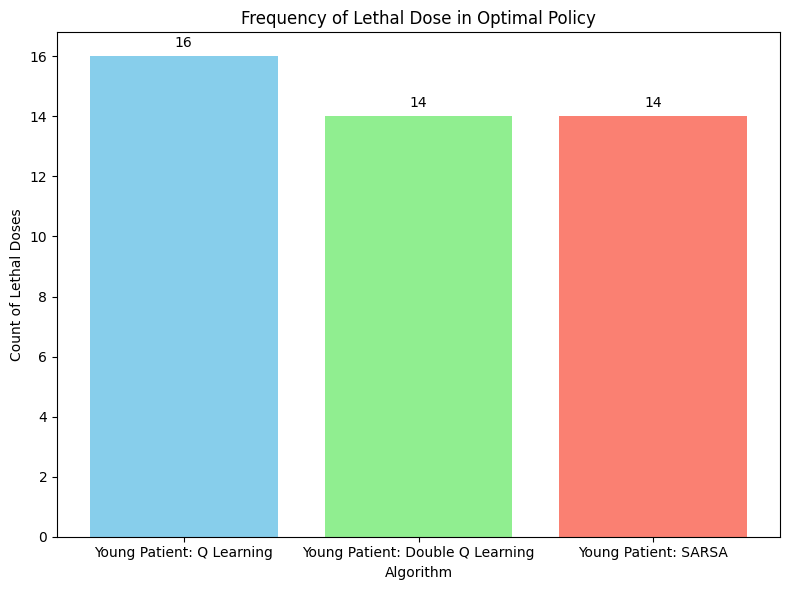

In [56]:
# --- Plot Frequency of Lethal Dose Administration ---
# visualises how often each algorithm administered a potentially lethal dose to the young patient
young_lethal_counts = {
    'Young Patient: Q Learning': young_qlearning_lethal_doses,
    'Young Patient: Double Q Learning': young_dqlearning_lethal_doses,
    'Young Patient: SARSA': young_sarsa_lethal_doses
}

plot_lethal_dose_frequency(young_lethal_counts)

#### 5.1.5 Computational Efficiency of the Algorithms for Young Patient
To evaluate the computational demands of each learning method, the total training time (in minutes) required by Q-learning, Double Q-learning, and SARSA is compared for the young patient case. This comparison provides insight into the relative efficiency of the algorithms under identical simulation settings. Faster convergence may indicate more practical applicability in clinical settings, especially when rapid model updates are needed. 

Q-Learning took the longest to train at 22.8 minutes, followed by SARSA at 19.8 minutes, and Double Q-Learning at 19.1 minutes. While these differences are relatively modest in this context, they could become more significant when applied to larger or more complex models. This may impact the practicality of using Q-Learning for real-time clinical decision-making, especially if rapid model responses are essential.

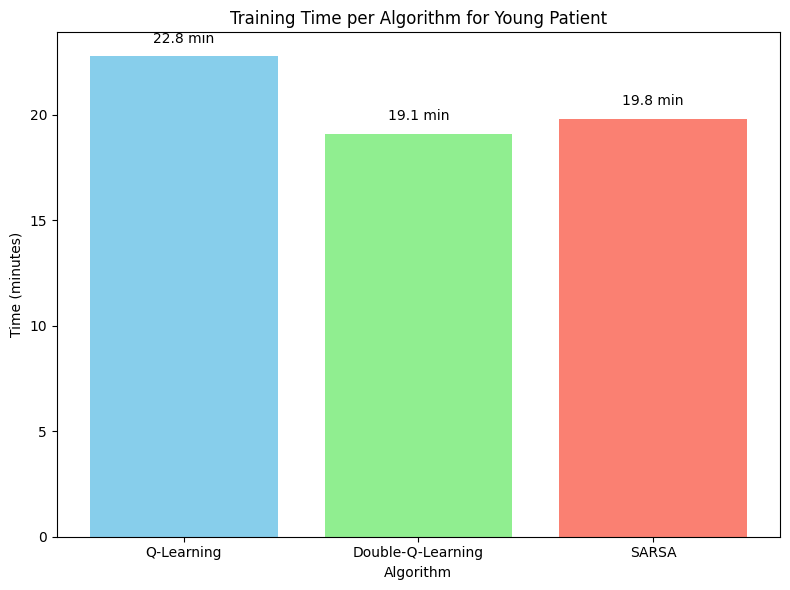

In [31]:
# --- Plot Training Time for Each Algorithm ---
# Shows the total time taken to train each algorithm in minutes
young_training_times = {
    q_learning_algo: young_qlearning_time,
    double_q_learning_algo: young_dqlearning_time,
    sarsa_algo: young_sarsa_time
}

plot_training_times(young_training_times, young_patient_title)

### 5.2. Elderly Patient Algorithms Comparison


#### 5.2.1. Plot Cell Trajectories and Dose Schedules for Elderly Patient

For the elderly patient, normal cells increase more rapidly under Q-learning initially but converge around day 40, while SARSA achieves convergence earlier around day 30, with Double Q following closely. This suggests that SARSA maintains better protection of healthy cells earlier, which may be clinically preferable in elderly patients where tissue preservation is critical. 

In terms of tumor cell reduction, all algorithms succeed by day 40, but SARSA again leads in speed of convergence, followed by Double Q and then Q-learning, which maintains higher tumor cell levels longer despite earlier reductions. This highlights SARSA’s potential for faster tumor eradication. 

Immune cell recovery is also quickest with SARSA (~day 35), with Double Q closely behind and Q-learning trailing due to a slower, steadier increase; this implies SARSA and Double Q may better support immune system rebound, key for elderly patients vulnerable to infection. 

All algorithms show a sharp rise in drug concentration to approximately 1.4 by day 5, maintaining this level until about day 20, followed by a rapid drop to zero around day 25. Q-Learning and SARSA exhibit relatively stable patterns during the stabilisation phase, while Double Q-Learning shows more fluctuations before reaching zero. Despite these differences, all algorithms ultimately stabilise the drug concentration at zero after day 25.

Finally, SARSA prescribes higher doses more frequently within the first 20 days, showing greater variability in dose administration. Q-Learning and Double Q-Learning exhibit relatively stable transitions to zero, with Double Q-Learning showing more fluctuations before stabilising.

Overall, SARSA appears to balance aggressive tumor reduction with early immune and normal cell recovery, making it a strong candidate for clinical translation in elderly patients. 

Plotting trajectories and optimal dose routines for all algorithms...


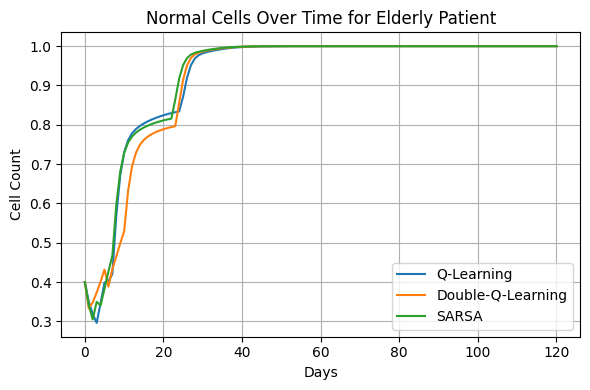

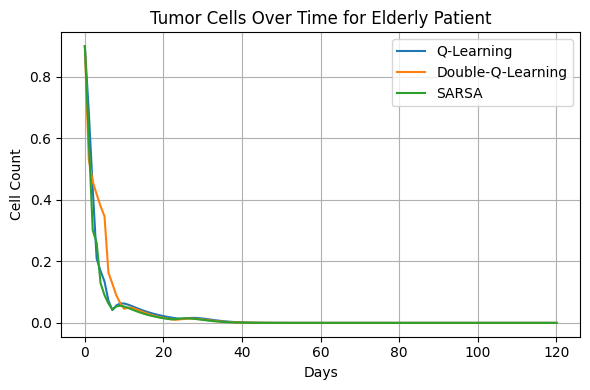

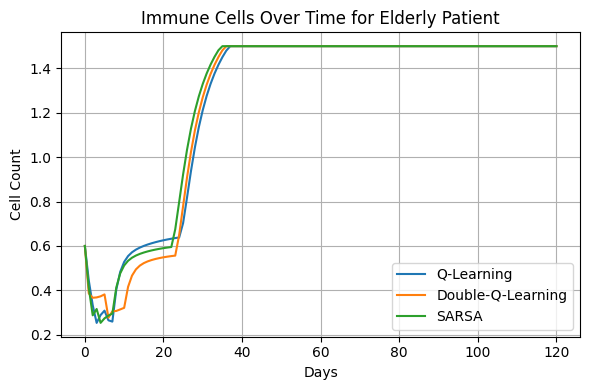

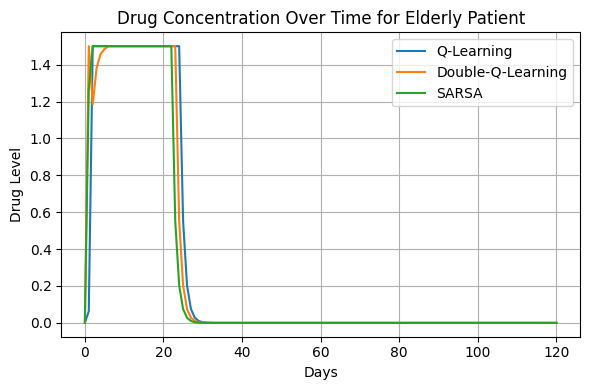

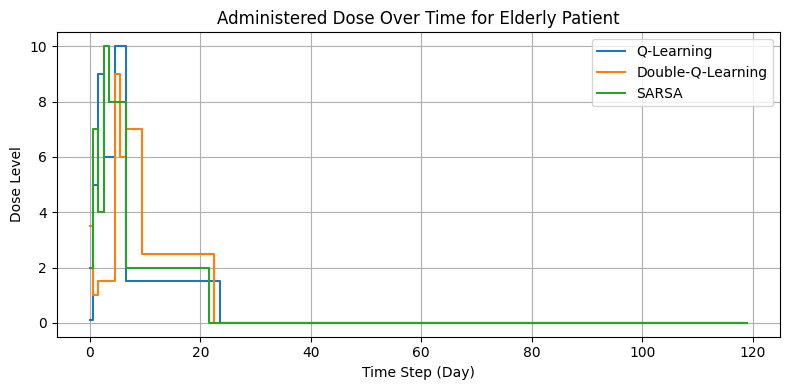

In [32]:
# -------------------------------
# 1. Plot cell and drug trajectories
# -------------------------------
# visualise the trajectory of tumor, immune, and normal cells as well as dose levels
# for each algorithm when the optimal policy is executed.
plot_trajectories([
    (elderly_qlearning_trajectory, elderly_qlearning_optimal_doses, q_learning_algo),
    (elderly_dqlearning_trajectory, elderly_dqlearning_optimal_doses, double_q_learning_algo),
    (elderly_sarsa_trajectory, elderly_sarsa_optimal_doses, sarsa_algo)
], elderly_patient_title)

#### 5.2.2. Rewards Comparison for Elderly Patient

Across the training trajectory, SARSA consistently achieves the highest rewards for the elderly patient, with a maximum of 9.15 and minimum of 5.07, followed closely by Q-learning (max 9.18, min 5.15), while Double Q-learning lags behind both with lower and flatter performance (max 9.06, min 5.06), all following a logarithmic growth pattern. Clinically, SARSA's superior and more stable performance suggests it is better at balancing tumor reduction with the preservation of normal cells in elderly patients, while algorithmically, its on-policy learning approach may be more adaptive in environments with sensitive trade-offs like chemotherapy.

Plotting: Q-Learning - Max reward: 9.18, Min reward: 5.15
Plotting: Double-Q-Learning - Max reward: 9.06, Min reward: 5.06
Plotting: SARSA - Max reward: 9.15, Min reward: 5.07


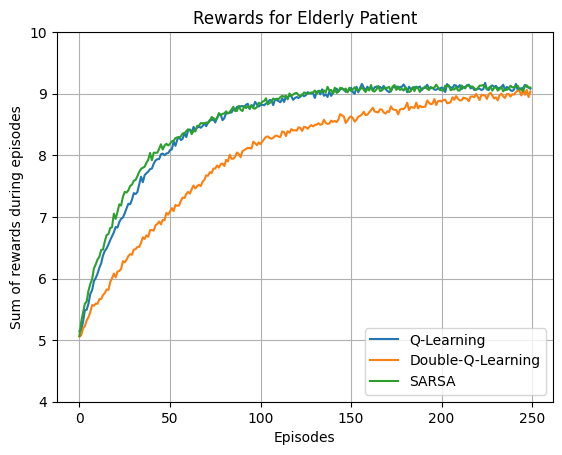

In [33]:
# -------------------------------
# 2. Plot cumulative rewards
# -------------------------------
# Compare how Q-Learning, Double Q-Learning, and SARSA performed during training
# in terms of the reward they accumulated over episodes.
plot_rewards([(elderly_qlearning_rewards, q_learning_algo),
              (elderly_dqlearning_rewards, double_q_learning_algo),
              (elderly_sarsa_rewards, sarsa_algo)
              ], elderly_patient_title)

#### 5.2.3. Timesteps Comparison for Elderly Patient

For the elderly patient, all three algorithms show a sharp initial drop in time steps to around 50,000, followed by a mid-training rise and then a gradual decline. SARSA peaks earliest at around episode 25 (~54,500 time steps), followed by Q-Learning at episode 40 (~54,500), and Double Q-Learning at episode 70 (~55,000). In the later episodes, Double Q-Learning maintains the highest number of time steps, followed by Q-Learning, with SARSA converging to the lowest values.

This pattern suggests a three-phase learning dynamic: rapid initial adjustment, a phase of exploration leading to higher time steps, and eventual stabilisation. While SARSA shows the most rapid therapeutic impact for an elderly patient, Double Q’s consistency and sustained performance across metrics highlight it as a strong alternative, especially in cases requiring careful management of chemotherapy intensity.

The difference in behavior between the elderly and younger patient scenarios may stem from the initial state distribution. The elderly patient’s starting conditions are less extreme (e.g., moderate tumor size), exposing the agent to fewer high-risk or high-reward states early on. Combined with a high weighing factor ($\beta = 0.9$), future rewards are weighted heavily, but the immediate differences in outcomes are less emphasised. This flattens the reward signal, making it harder for the agent to distinguish between suboptimal and optimal decisions, thereby slowing convergence and contributing to the observed fluctuations in timestep behavior.

Plotting: Q-Learning - Max time steps: 57954.0000, Min time steps: 50290.0000
Plotting: Double-Q-Learning - Max time steps: 54973.0000, Min time steps: 50168.0000
Plotting: SARSA - Max time steps: 57187.0000, Min time steps: 50968.0000


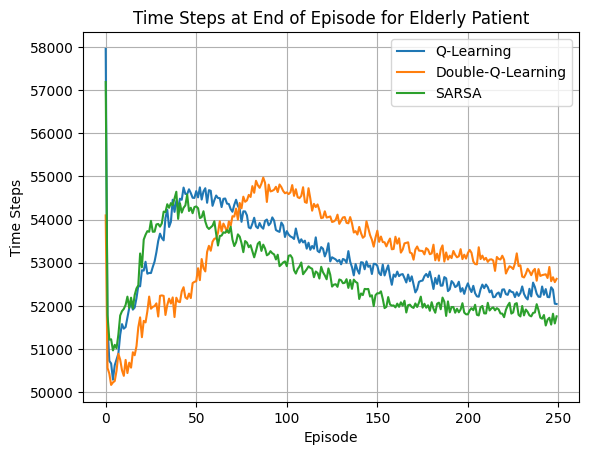

In [34]:
# -------------------------------
# 3. Plot time steps per episode
# -------------------------------
# Check how many time steps were needed per episode, which can reveal
# learning stability and convergence speed across algorithms.
plot_time_steps([
    (elderly_time_steps_qlearning, q_learning_algo),
    (elderly_time_steps_dqlearning, double_q_learning_algo),
    (elderly_time_steps_sarsa, sarsa_algo)
], elderly_patient_title)

#### 5.2.4. Toxicity Comparison for Elderly Patient
The following analysis visualises the frequency with which each algorithm administered a potentially lethal dose to the elderly patient during the treatment simulation. Due to increased physiological sensitivity in older adults, any dose exceeding 0.5 mg/L/day is considered lethal in this case. It is important to note that the 0.5 mg/L/day threshold is an arbitrarily chosen benchmark used for simulation purposes and does not represent a clinically validated toxicity limit. In real-world settings, such thresholds can vary depending on the type of cancer, patient-specific factors, and clinical judgment.
This comparison across Q-learning, Double Q-learning, and SARSA highlights the safety profiles of the algorithms when applied to geriatric care. The plot offers insight into how each strategy balances therapeutic effectiveness with toxicity risk, which is critical for tailoring treatments to the vulnerabilities of elderly patients.

In the optimal policy for elderly patients, Q-Learning results in the highest frequency of lethal dose administrations (24 times), followed by Double Q-Learning (23), and SARSA (22). Although the differences are relatively small, the higher number of lethal doses with Q-Learning suggests it may be less conservative in high-risk scenarios. Interestingly, despite SARSA often being considered a more cautious algorithm due to its on-policy nature, it still results in 22 lethal doses, which raises concerns about its real-world applicability in sensitive clinical contexts. These results emphasise the importance of algorithm selection when patient safety and frailty are key considerations, as even minor variations in policy learning can lead to significant clinical consequences.

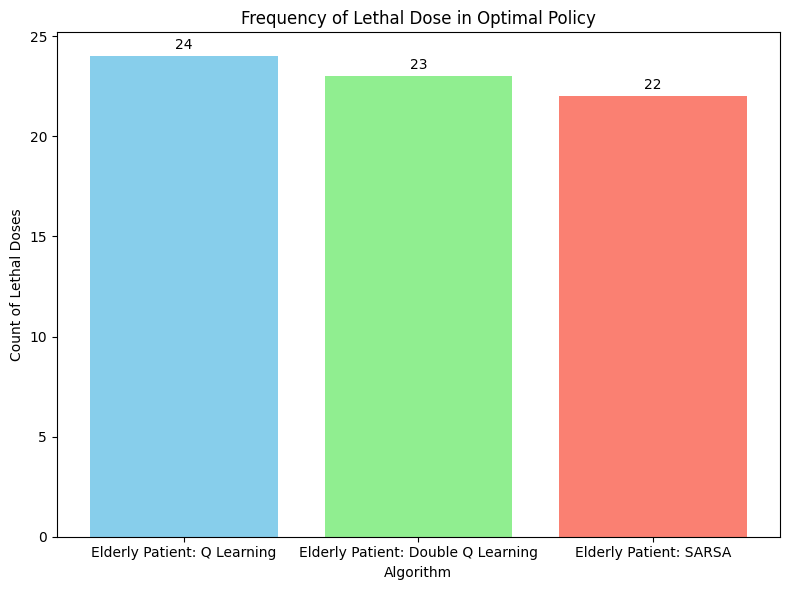

In [55]:
# -------------------------------
# 4. Plot frequency of lethal doses
# -------------------------------
# Compare how often each algorithm administered a lethal dose, which can
# indicate safety and stability of the policy for an elderly patient.
elderly_lethal_counts = {
    'Elderly Patient: Q Learning': elderly_qlearning_lethal_doses,
    'Elderly Patient: Double Q Learning': elderly_dqlearning_lethal_doses,
    'Elderly Patient: SARSA': elderly_sarsa_lethal_doses
}

plot_lethal_dose_frequency(elderly_lethal_counts)

#### 5.2.5. Computational Efficiency of the Algorithms for Elderly Patient
To evaluate the computational demands of each learning method, the total training time (in minutes) required by Q-learning, Double Q-learning, and SARSA is compared for the elderly patient case. 

For the elderly patient, Q-learning and Double Q-learning had similar training times (49.4 miuntes and 49.8 minutes respectively), while SARSA required substantially more time at 56.1 minutes. SARSA’s higher training time suggests greater computational demands, which may limit its scalability; clinically, faster convergence of Q-learning methods could support more efficient development of treatment policies for time-sensitive decision-making.

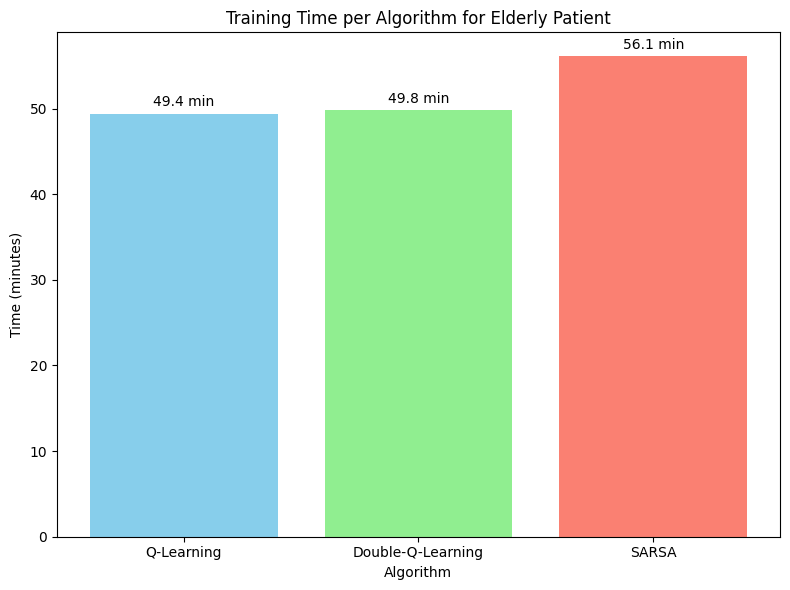

In [36]:
# -------------------------------
# 5. Plot training time per algorithm
# -------------------------------
# visualise the amount of wall-clock time each algorithm took to train,
# helpful for assessing computational efficiency.
elderly_training_times = {
    q_learning_algo: elderly_qlearning_time,
    double_q_learning_algo: elderly_dqlearning_time,
    sarsa_algo: elderly_sarsa_time
}

plot_training_times(elderly_training_times, elderly_patient_title)

### 5.3. Hyperparameter Analysis: Gamma vs Performance Metrics

These functions are designed to evaluate how different discount factors ($\gamma$ values) influence performance over training episodes. They help visualise both reward progression and tumor size reduction trends over time through heatmaps.

**compute_reward_matrix** function computes a 2D matrix representing average reward values across specified episode bins for each gamma value.

**compute_tumor_size_matrix** function computes a 2D matrix representing average tumor size across episode bins for each gamma value.

**plot_heatmap** function visualises the matrices computed by the previous functions using a Seaborn heatmap, making performance differences across gamma and training duration visually intuitive.



In [37]:
import numpy as np

def compute_reward_matrix(rewards_list, gammas, bins):
    """
    Computes a matrix of average rewards per gamma and episode range.

    Args:
        rewards_list (list): List of reward curves (output of collect_rewards_and_trajectories).
        gammas (list): List of gamma values corresponding to rewards_list.
        bins (list): List of tuples defining episode ranges, e.g., [(0,25), (25,50), ...]

    Returns:
        matrix (2D np.array): Matrix of shape (len(gammas), len(bins)) with average rewards.
    """
    matrix = np.zeros((len(gammas), len(bins)))
    
    for i, (rewards, label) in enumerate(rewards_list):
        for j, (start, end) in enumerate(bins):
            matrix[i, j] = np.mean(rewards[start:end])
    
    return matrix

def compute_tumor_size_matrix(tumor_size_list, gammas, bins):
    """
    Computes a matrix of average rewards per gamma and episode range.

    Args:
        rewards_list (list): List of reward curves (output of collect_rewards_and_trajectories).
        gammas (list): List of gamma values corresponding to rewards_list.
        bins (list): List of tuples defining episode ranges, e.g., [(0,25), (25,50), ...]

    Returns:
        matrix (2D np.array): Matrix of shape (len(gammas), len(bins)) with average rewards.
    """
    matrix = np.zeros((len(gammas), len(bins)))
    
    for i, (tumor_sizes, label) in enumerate(tumor_size_list):
        for j, (start, end) in enumerate(bins):
            matrix[i, j] = np.mean(tumor_sizes[start:end])
    
    return matrix


import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(matrix, gammas, bin_labels, title):
    """
    Plots a heatmap for a 2D matrix representing performance metrics 
    (e.g., average reward) across different gamma values and episode bins.

    Args:
        matrix (2D np.array): The matrix to visualise, where each row corresponds 
                              to a gamma value and each column to an episode range/bin.
        gammas (list): List of gamma (discount factor) values, used as row labels.
        bin_labels (list): Labels representing different episode ranges, used as column labels.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(12, 6))
    sns.heatmap(matrix, annot=True, fmt=".6f", cmap='viridis', 
                xticklabels=bin_labels, yticklabels=[f"γ={g}" for g in gammas])
    plt.xlabel('Episode ranges')
    plt.ylabel('Gamma values')
    plt.title(title)
    plt.tight_layout()
    plt.show()


The **collect_rewards_and_trajectories** function runs a specified RL algorithm across different discount factors ($\gamma$) and collects:
- Episode-wise reward curves
- Tumor size trends during training
- Post-training state trajectories under the learned policy

In [38]:
def collect_rewards_and_trajectories(patient_type, dose_levels_a, dose_levels_b, gammas, algorithm, steps=120):
    """
    Run a specified reinforcement learning algorithm over a range of gamma discount factors 
    and collect training rewards, tumor sizes, and post-training state trajectories.

    Args:
        patient_type (str): The type of patient (e.g., 'young' or 'elderly') that defines their response to treatment.
        dose_levels_a (list): Possible dose values for drug A.
        dose_levels_b (list): Possible dose values for drug B.
        gammas (list): A list of discount factors (gamma values) to evaluate the effect of future reward prioritization.
        algorithm (str): Name of the RL algorithm to use (e.g., 'Q-Learning', 'Double Q-Learning', 'SARSA').
        steps (int): Number of time steps (days) to simulate for trajectory evaluation (default is 120).

    Returns:
        rewards_data (list of tuples): Each tuple contains (reward_curve, label), where label encodes the algorithm and gamma.
        tumor_data (list of tuples): Each tuple contains (tumor_size_over_time, label), used for tumor trend comparisons.
        trajectories_data (list of tuples): Each tuple contains (state_trajectory, optimal_doses, label).
    """

    # Initialise storage for reward curves, tumor data, and trajectories for each gamma value
    rewards_data = []
    tumor_data = []
    trajectories_data = []
    
    for gamma in gammas:
        # Train algorithm
        _, tumor_sizes, rewards, policy = run_algorithms(patient_type, dose_levels_a, dose_levels_b, algorithm, gamma)
            
        # Evaluate learned policy
        env = CancerTreatmentEnv(patient_type=patient_type)
        trajectory, doses, lethal_doses = run_policy(env, policy, dose_levels_a, dose_levels_b, steps, patient_type)

        # Create label
        label = f"{algorithm} (γ={gamma})"
        
        # Store the results with the associated label
        rewards_data.append((rewards, label))
        tumor_data.append((tumor_sizes, label))
        trajectories_data.append((trajectory, doses, label))
    
    # Return all collected data for analysis and plotting
    return rewards_data, tumor_data, trajectories_data


#### 5.3.1. Hyperparameter (Gamma) Variations Analysis for Young Patients

##### 5.3.1.1. Q-Learning Hyperparameter Analysis for Young Patient
The performance patterns suggest that in the young patient scenario, where treatment outcomes may depend on long-term effects, future reward consideration (higher $\gamma$) is crucial for optimal decision-making. Agents with higher discount factors are more patient and willing to invest in actions with delayed benefits, which appears well-suited to this context.

All policies lead to a recovery of normal cell counts from ~0.3 to near 1.0 within the first 30–40 days. Higher $\gamma$ values show slightly smoother and faster recovery, indicating more consistent treatment strategies that consider future outcomes while lower $\gamma$ values display more fluctuations and slower convergence in the early phase, which may reflect more reactive and short-sighted policies.

All Q-learning variants successfully eradicate tumor cells by around day 30, with values dropping to near zero. Higher $\gamma$ values offer faster and more controlled reduction, likely due to better balancing of treatment intensity and side effects.

Higher $\gamma$ (0.7 and 0.9) prioritise long-term rewards, leading to higher initial doses that quickly drop off to zero. Lower $\gamma$ (0.1 and 0.3) show more variability and sustained dosing before eventually dropping to zero around day 20. This suggests a balance between short-term and long-term rewards.

The reward heatmap suggests that lower $\gamma$ values  may provide higher initial rewards but tend to decrease over time. Higher $\gamma$ values maintain more stable rewards across episodes.

The tumor size heatmap suggests that lower $\gamma$ values may initially result in smaller tumor sizes, but these sizes increase before eventually decreasing. Higher $\gamma$ values tend to show a more consistent decrease in tumor sizes over time. This indicates that higher gamma values might be more effective in reducing tumor sizes in the long run.

Starting Q-Learning for young patient with gamma= 0.1

Check rewards:

First 10 rewards: [4966.39088836 4637.18812477 4533.81914959 4479.70581737 4435.3485597
 4414.99773224 4393.15822809 4368.87414234 4369.55088021 4350.30697949]

Last 10 rewards: [4185.34837021 4181.69818664 4185.23773745 4189.24468379 4186.80547918
 4192.1947218  4193.09876097 4183.84967403 4183.47749997 4191.03309464]

=====Final Q-table for Q Learning: 

State 0 -> [0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000]

State 1 -> [0.00000000, 0.00457306, 0.01237181, 0.00784285, 0.00420402, 0.00000000,
                  0.00000000, 0.01786270, 0.00700727, 0.00790123, 0.04168473, 0.02000025,
                  0.00415993, 0.00727248, 0.01644745, 0.02232535, 0.03030830, 0.06531336, 0.41121175, 0.087

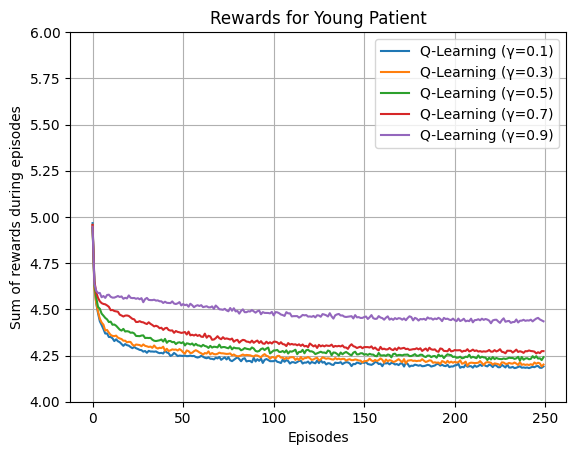

Plotting trajectories and optimal dose routines for all algorithms...


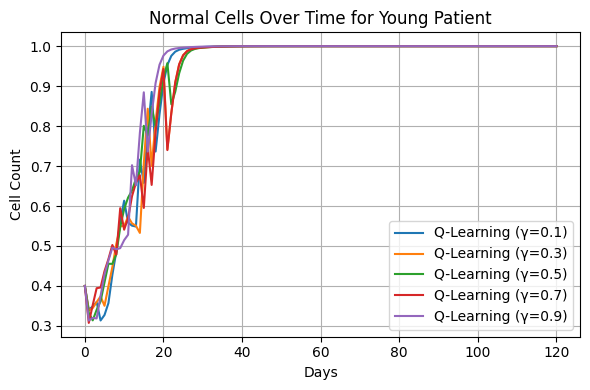

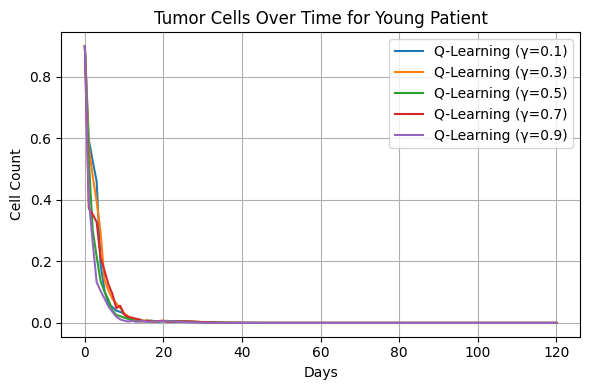

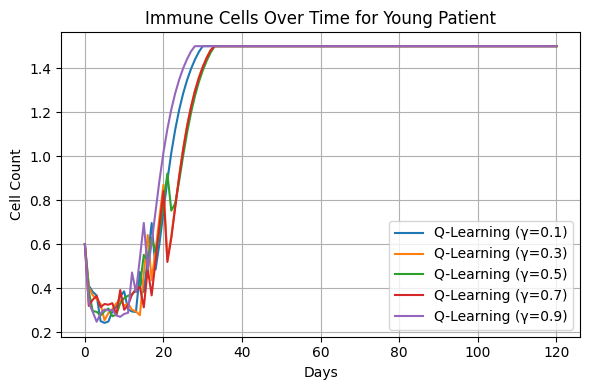

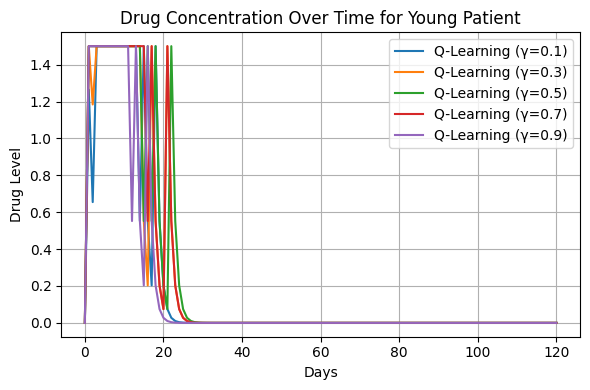

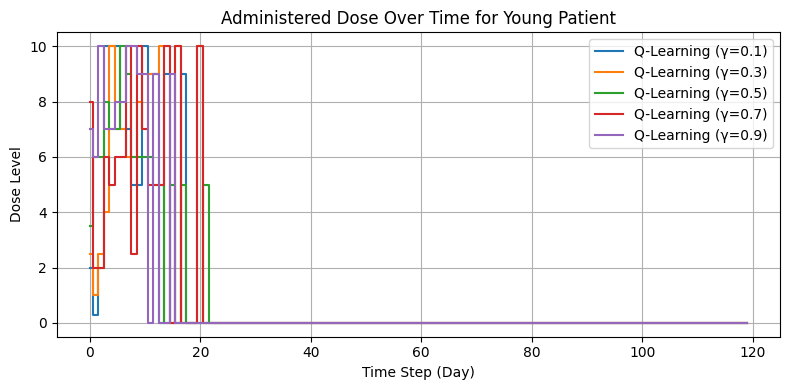

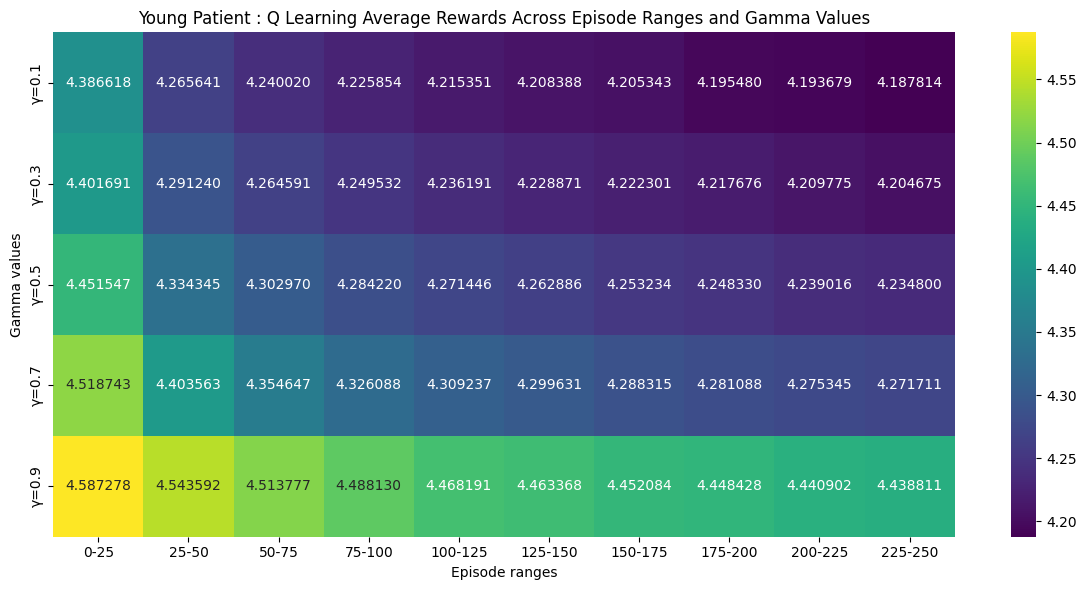

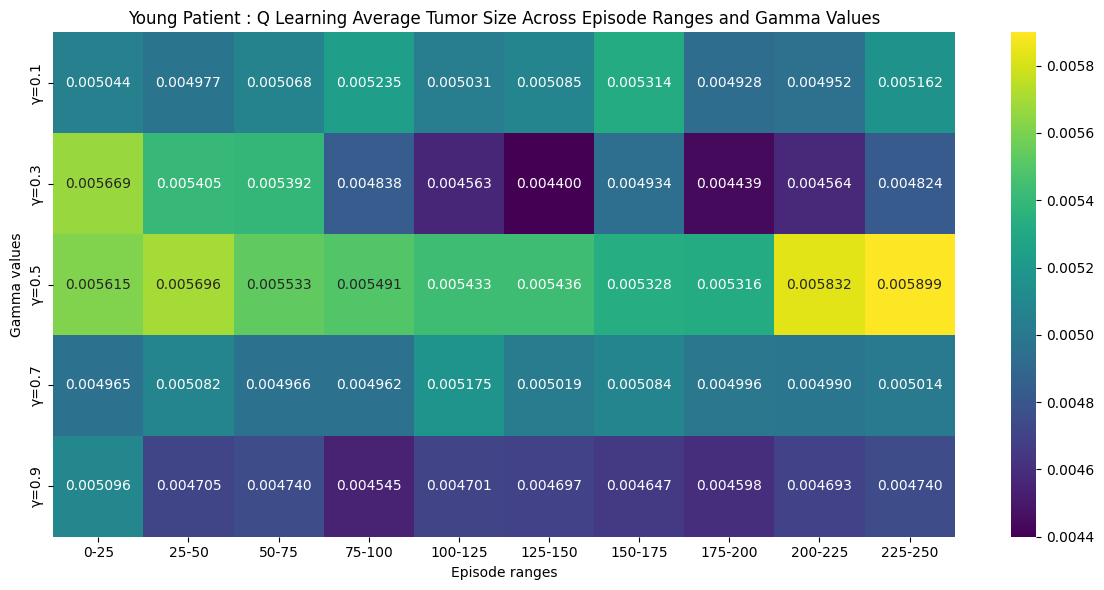

In [39]:
# =======================================================================
# ANALYSIS: Q-Learning for Young Patient Across Discount Factors (Gamma)
# =======================================================================

# Run Q-learning for each gamma value, collecting rewards, tumor sizes, and trajectories
# This helps analyse how discount factor influences learning and performance
young_q_learning_rewards_list, young_q_learning_tumor_list, young_q_learning_trajectories_list = collect_rewards_and_trajectories(patient_type_young, young_dose_levels, young_tumor_bins, gammas, q_learning_algo)

# Plot the reward curves for different gamma values
plot_rewards(young_q_learning_rewards_list, young_patient_title)
# Plot the state trajectories and dose schedules for each gamma
plot_trajectories(young_q_learning_trajectories_list, young_patient_title)

# Compute a reward matrix: average rewards in episode bins for each gamma
young_q_learning_reward_matrix = compute_reward_matrix(young_q_learning_rewards_list, gammas, bins)

# visualise the reward matrix as a heatmap
plot_heatmap(young_q_learning_reward_matrix, gammas, bin_labels, 'Young Patient : Q Learning Average Rewards Across Episode Ranges and Gamma Values')

# Compute a tumor matrix: average tumor size in episode bins for each gamma
young_q_learning_tumor_matrix = compute_tumor_size_matrix(young_q_learning_tumor_list, gammas, bins)

# visualise the tumor matrix as a heatmap
plot_heatmap(young_q_learning_tumor_matrix, gammas, bin_labels, 'Young Patient : Q Learning Average Tumor Size Across Episode Ranges and Gamma Values')

##### 5.3.1.2. Double Q-Learning Hyperparameter Analysis for Young Patient
In Double Q-Learning for young patients, higher discount factors ($\gamma = 0.7$ and 0.9) lead to higher minimum cumulative rewards reaching up to 4.35. These higher $\gamma$ values also correlate with slower convergence of tumor, immune, and normal cell populations, primarily due to prolonged drug exposure and more cautious policy adaptation.

Notably, a discount factor of $\gamma = 0.9$ maintains maximum drug concentrations for the longest duration, reflecting a strategy that prioritises long-term reward through persistent, aggressive treatment. In contrast, $\gamma = 0.7$ sustains moderate-to-high dosing levels over a longer period, balancing drug intensity with systemic recovery.

Heatmap visualisations reveal that $\gamma = 0.9$ initially achieves the highest average rewards in the early stages of training, indicative of an early lead in policy effectiveness. However, $\gamma = 0.7$ consistently produces the smallest average tumor sizes across a majority of episodes, suggesting superior tumor control over the long term.

From a clinical perspective, $\gamma = 0.7$ appears to offer the most favorable trade-off between therapeutic effectiveness and overall policy performance. It supports a strategy of moderate, sustained drug dosing that effectively suppresses tumor growth while optimising cumulative rewards and potentially mitigating toxicity-related complications.

Starting Double-Q-Learning for young patient with gamma= 0.1

Check rewards:

First 10 rewards: [4871.70234911 4483.13054961 4428.27551016 4424.98862591 4396.94908299
 4392.01203012 4377.42250527 4361.50508759 4364.01261702 4355.50908067]

Last 10 rewards: [4230.08688764 4204.8504955  4211.23829885 4209.9296365  4218.40697132
 4212.01956001 4209.86910438 4205.37610267 4211.02435752 4217.71214629]

=====Final Combined Q-table (Q1 + Q2) for Double Q Learning: 

State 0 -> [0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000]

State 1 -> [0.00027672, 0.00413112, 0.00867852, 0.00795276, 0.01312703, 0.01977548,
                  0.00433477, 0.00393623, 0.00296956, 0.00000000, 0.04370247, 0.00737402,
                  0.01281422, 0.00000000, 0.03912588, 0.00000000, 0.00000

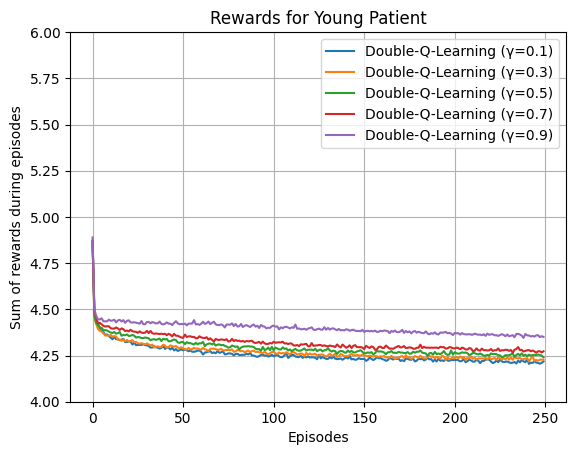

Plotting trajectories and optimal dose routines for all algorithms...


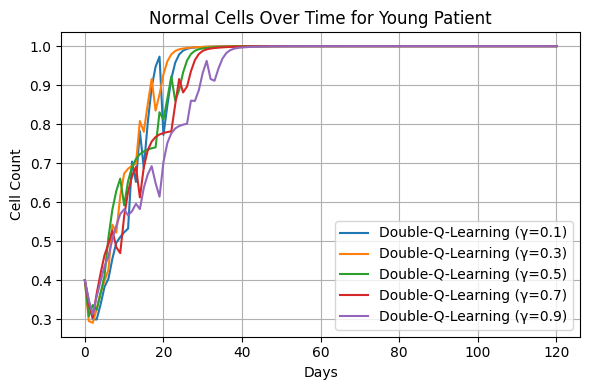

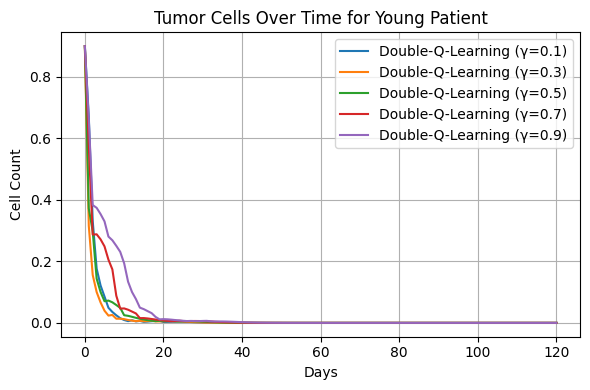

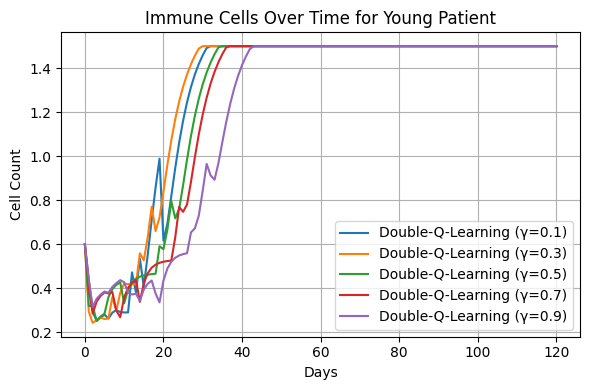

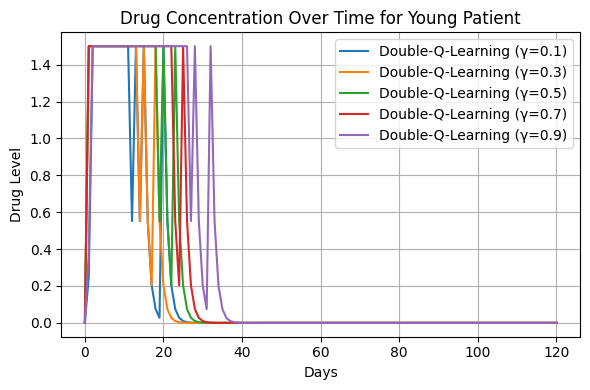

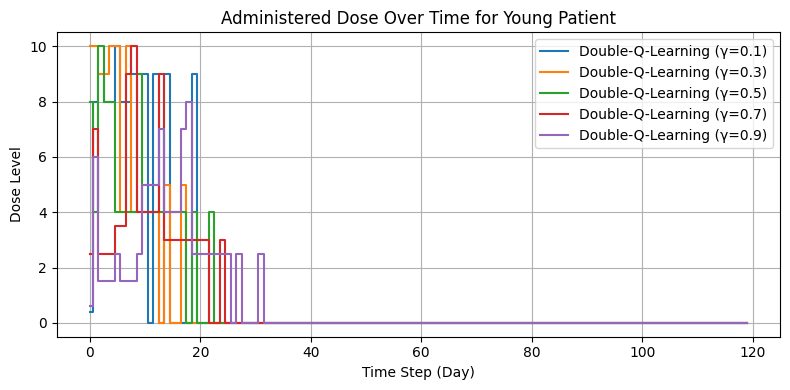

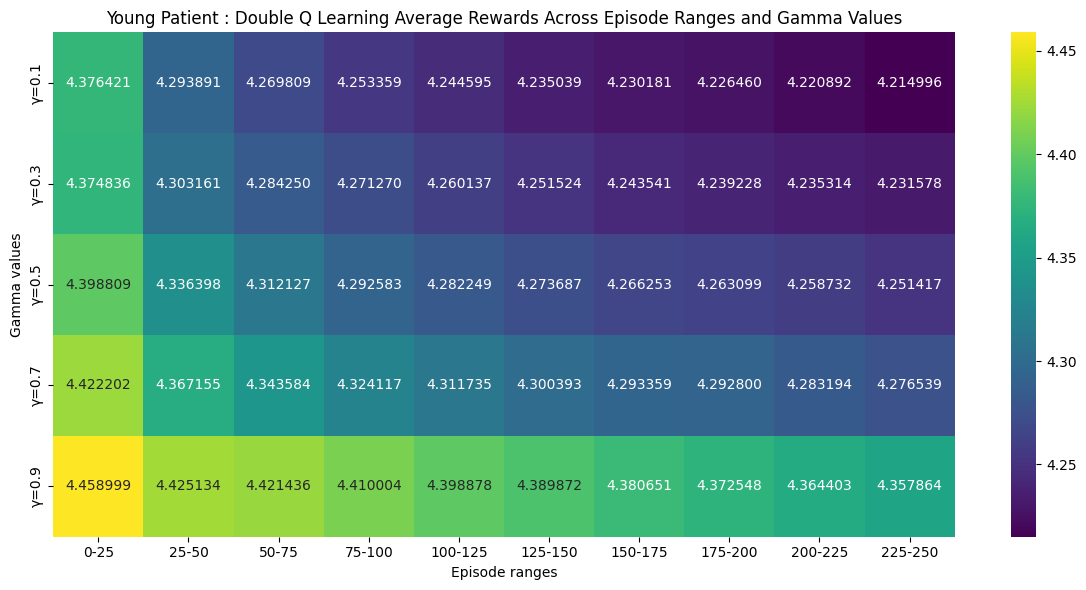

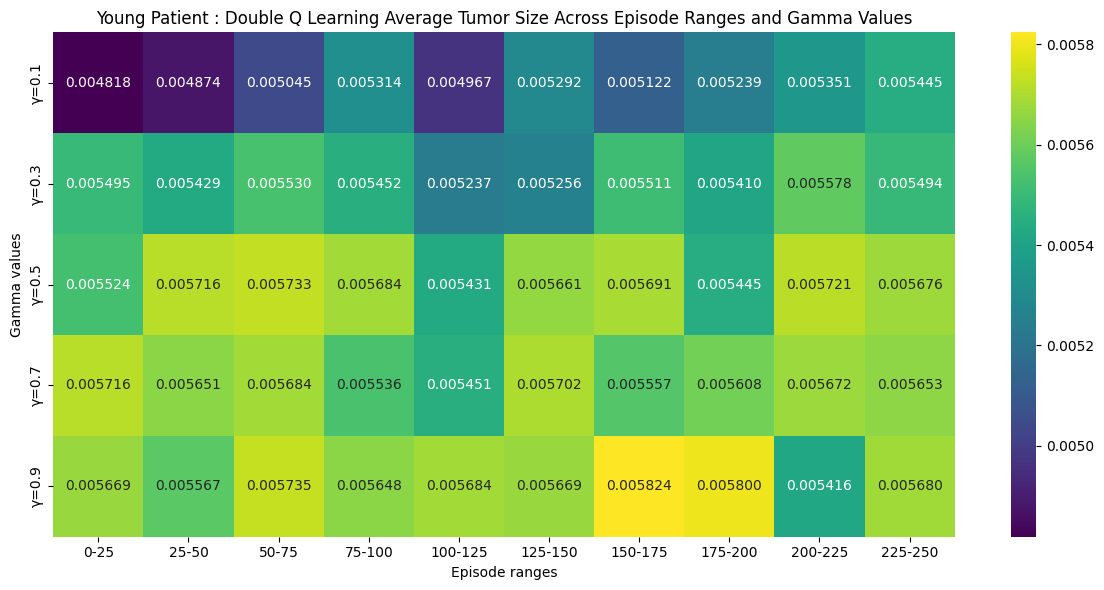

In [40]:
# =====================================================================================
# ANALYSIS: Double Q-Learning for Young Patient Across Discount Factors (Gamma)
# =====================================================================================

# Run Double- Q-learning for each gamma value, collecting rewards, tumor sizes, and trajectories
# This helps analyse how discount factor influences learning and performance
young_double_q_learning_rewards_list, young_double_q_learning_tumor_list, young_double_q_learning_trajectories_list = collect_rewards_and_trajectories(patient_type_young, young_dose_levels, young_tumor_bins, gammas, double_q_learning_algo)

# Plot the reward curves for different gamma values
plot_rewards(young_double_q_learning_rewards_list, young_patient_title)
# Plot the state trajectories and dose schedules for each gamma
plot_trajectories(young_double_q_learning_trajectories_list, young_patient_title)

# Compute a reward matrix: average rewards in episode bins for each gamma
young_double_q_learning_reward_matrix = compute_reward_matrix(young_double_q_learning_rewards_list, gammas, bins)

# visualise the reward matrix as a heatmap
plot_heatmap(young_double_q_learning_reward_matrix, gammas, bin_labels, 'Young Patient : Double Q Learning Average Rewards Across Episode Ranges and Gamma Values')

# Compute a tumor matrix: average tumor size in episode bins for each gamma
young_double_q_learning_tumor_matrix = compute_tumor_size_matrix(young_double_q_learning_tumor_list, gammas, bins)

# visualise the tumor matrix as a heatmap
plot_heatmap(young_double_q_learning_tumor_matrix, gammas, bin_labels, 'Young Patient : Double Q Learning Average Tumor Size Across Episode Ranges and Gamma Values')

##### 5.3.1.3. SARSA Hyperparameter Analysis for Young Patient
In the SARSA hyperparameter analysis for young patients, a high discount factor ($\gamma = 0.9$) produced the highest and most stable cumulative rewards (Max: 4.94, Min: 4.30), indicating a strong focus on long-term outcomes. However, this stability came at a cost: biological convergence in tumor, immune, and normal cell populations was significantly slower, with tumor suppression delayed until day 18, compared to day 10 for lower $\gamma$ values.

This delayed therapeutic response is attributed to $\gamma = 0.9$'s tendency to prolong treatment duration with sustained drug exposure, despite administering lower dose levels. This reflects a conservative, reward-preserving strategy that may prioritize patient safety but sacrifices early tumor control.

Heatmap visualizations provide deeper insight: while $\gamma = 0.9$ maintained high rewards, $\gamma$ values in the range of 0.3-0.7 achieved lower average tumor sizes in the later training episodes (175–250). 

Clinically, intermediate $\gamma$ values (especially $\gamma=0.7$) offer faster tumor control with efficient dosing. While $\gamma=0.9$ offers stable reward outcomes, it delays therapeutic impact and sustains higher tumor burden longer, which may be suboptimal for young patients who typically tolerate more aggressive regimens

Starting SARSA for young patient with gamma= 0.1

Check rewards:

First 10 rewards: [4923.10726651 4608.87999379 4521.08397236 4470.34868438 4433.13182937
 4412.91418118 4393.29105901 4372.11636985 4351.39245643 4356.96393954]

Last 10 rewards: [4181.07258465 4177.53610175 4194.06534736 4175.89013509 4178.9152303
 4180.32155661 4175.17064146 4171.89024378 4190.9503835  4182.69647829]

=====Final Q-table for SARSA: 

State 0 -> [0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
                  0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000]

State 1 -> [0.05373755, 0.00347417, 0.00000000, 0.00578870, 0.00633673, 0.00000000,
                  0.00482889, 0.00532430, 0.01610392, 0.00004832, 0.00483221, 0.00897236,
                  0.00709246, 0.02853889, 0.02116755, 0.00000000, 0.00000000, 0.13656631, 0.16034845, 0.48566461]

St

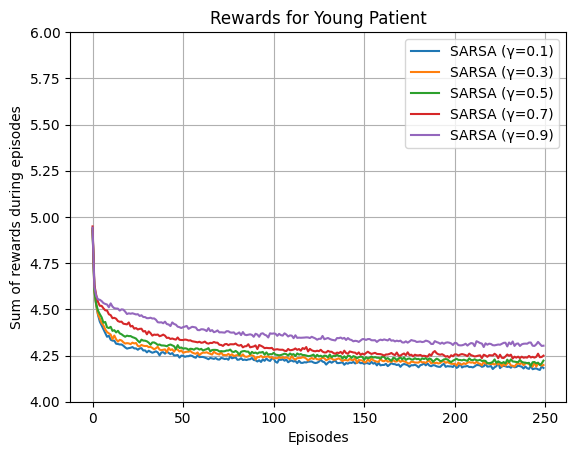

Plotting trajectories and optimal dose routines for all algorithms...


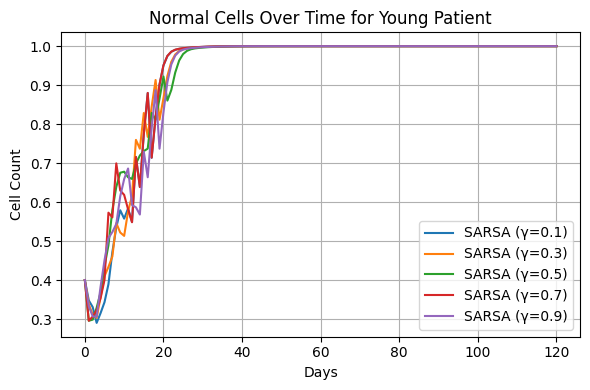

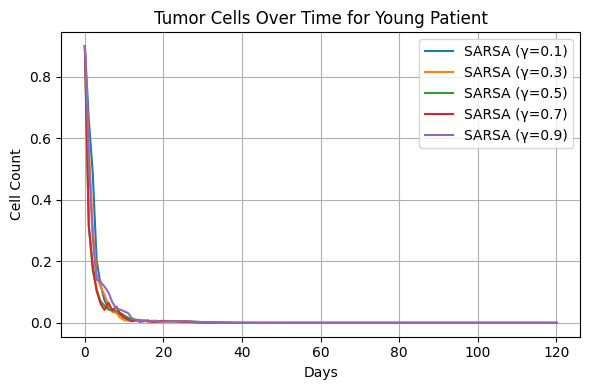

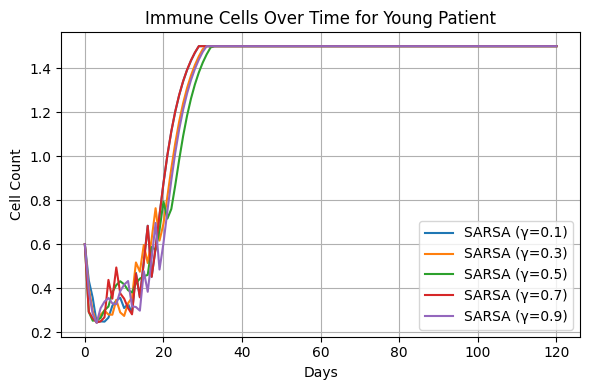

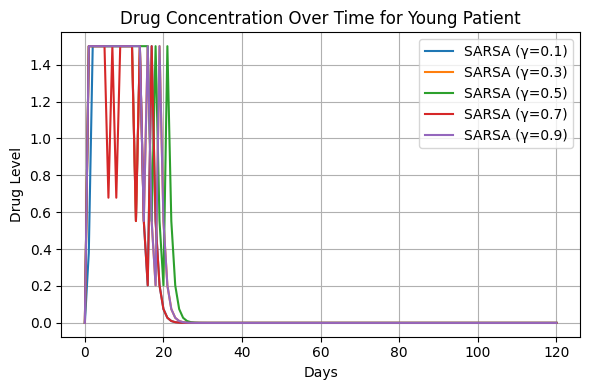

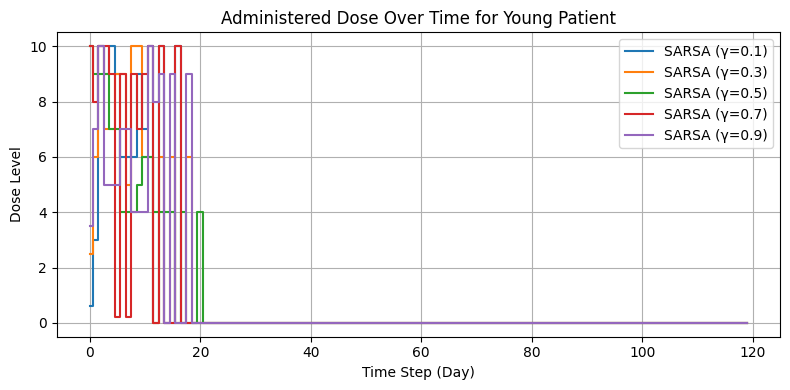

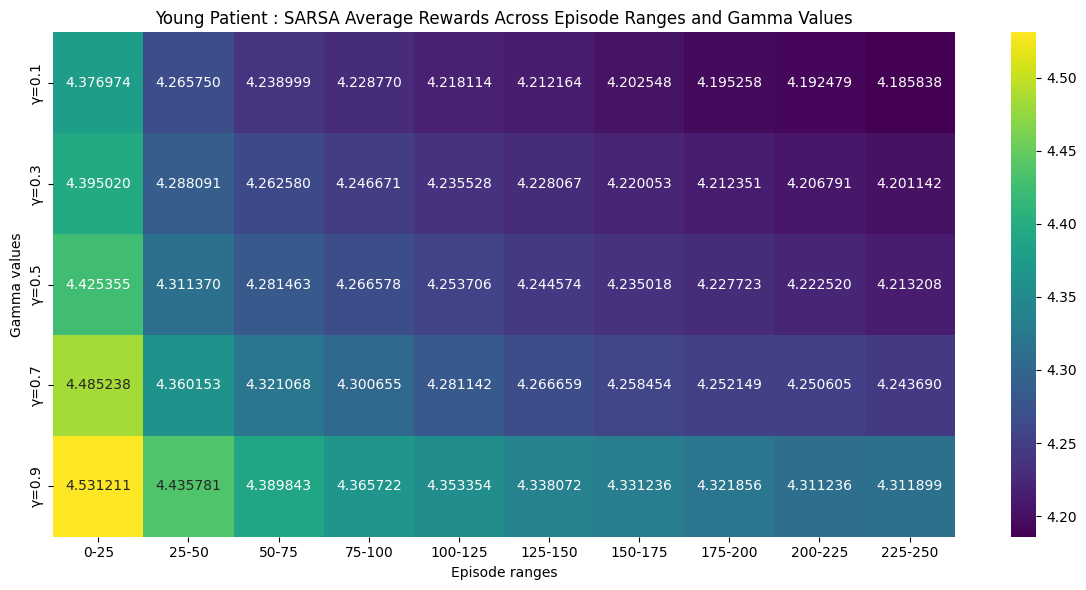

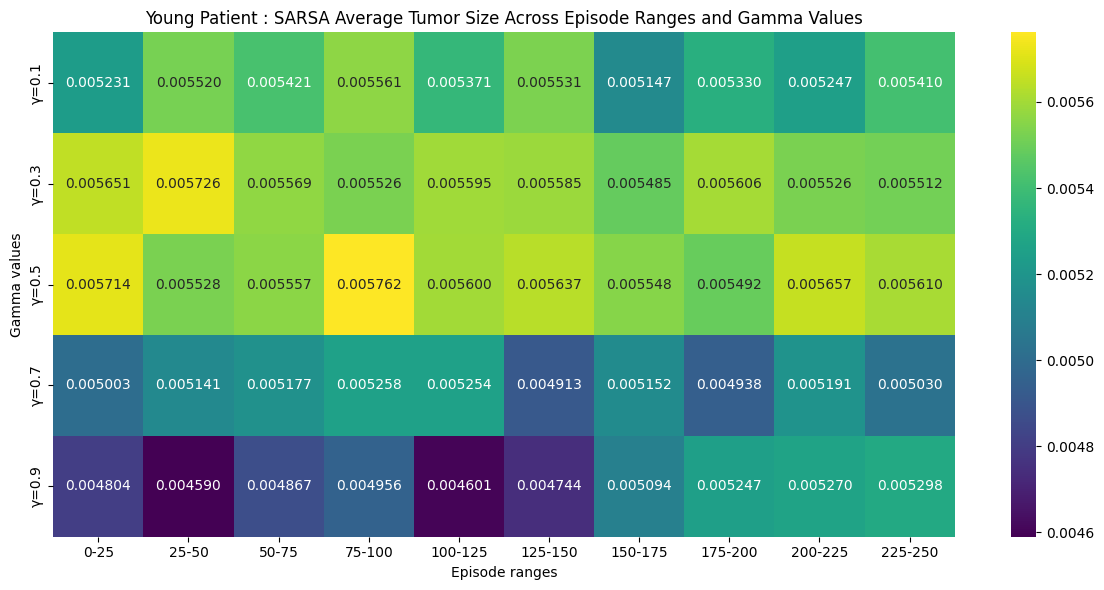

In [41]:
# =====================================================================================
# ANALYSIS: SARSA for Young Patient Across Discount Factors (Gamma)
# =====================================================================================

# Run Double- Q-learning for each gamma value, collecting rewards, tumor sizes, and trajectories
# This helps analyse how discount factor influences learning and performance
young_sarsa_rewards_list, young_sarsa_tumor_list, young_sarsa_trajectories_list = collect_rewards_and_trajectories(patient_type_young, young_dose_levels, young_tumor_bins, gammas, sarsa_algo)

# Plot the reward curves for different gamma values
plot_rewards(young_sarsa_rewards_list, young_patient_title)
# Plot the state trajectories and dose schedules for each gamma
plot_trajectories(young_sarsa_trajectories_list, young_patient_title)

# Compute a reward matrix: average rewards in episode bins for each gamma
young_sarsa_reward_matrix = compute_reward_matrix(young_sarsa_rewards_list, gammas, bins)

# visualise the reward matrix as a heatmap
plot_heatmap(young_sarsa_reward_matrix, gammas, bin_labels, 'Young Patient : SARSA Average Rewards Across Episode Ranges and Gamma Values')

# Compute a tumor matrix: average tumor size in episode bins for each gamma
young_sarsa_tumor_matrix = compute_tumor_size_matrix(young_sarsa_tumor_list, gammas, bins)

# visualise the tumor matrix as a heatmap
plot_heatmap(young_sarsa_tumor_matrix, gammas, bin_labels, 'Young Patient : SARSA Average Tumor Size Across Episode Ranges and Gamma Values')


Based on the comprehensive analysis of Q-Learning, Double Q-Learning and SARSA applied to young patient treatment scenarios, a discount factor of $\gamma = 0.7$ consistently emerges as the most clinically effective and policy-efficient choice.

While higher $\gamma$ values (0.9) offer greater stability in cumulative rewards and maintain long-term treatment strategies, they come with notable trade-offs like delayed tumor suppression, slower convergence in biological cell dynamics, and prolonged drug exposure. These factors may be suboptimal in young patients who typically tolerate and benefit more from earlier, decisive tumor control.

Conversely, lower $\gamma$ values (0.1–0.3) prioritise short-term rewards, resulting in faster initial tumor reduction but exhibit higher variability and less stable long-term outcomes. These policies tend to administer inconsistent dosing strategies and fail to sustain effective control over tumor dynamics throughout training.

#### 5.3.2. Hyperparameter (Gamma) Variations Analysis for Elderly Patients

##### 5.3.2.1. Q-Learning Hyperparameter Analysis for Elderly Patients
In the Q-Learning analysis for elderly patients, lower discount factors ($\gamma = 0.1$–$0.3$) yielded the highest cumulative rewards, with $\gamma = 0.3$ achieving a peak reward of 9.19, and $\gamma = 0.1$ demonstrating the most favorable reward trajectory across episodes. These results suggest that policies with a strong emphasis on immediate outcomes outperform those focused on long-term return in this clinical context.

From a therapeutic perspective, $\gamma = 0.1$ led to faster and more effective tumor suppression, achieving early elimination with reduced treatment duration. In contrast, while $\gamma = 0.3$ initially preserved immune and normal cells more effectively, it delayed tumor eradication and sustained elevated drug concentrations longer, reflecting a more cautious, protective approach that prioritises biological recovery over aggressive tumor targeting.

This behavior illustrates a key trade-off:

* Lower $\gamma$ values (especially $\gamma = 0.1$) drive aggressive, short-term treatment strategies, leading to rapid tumor reduction and higher overall rewards, which may be clinically advantageous in curative or time-sensitive scenarios.
* Moderate $\gamma$ values (e.g., $\gamma = 0.3$) exhibit better preservation of immune and normal cell dynamics, suggesting a policy that minimises collateral damage, albeit at the cost of delayed tumor control. This strategy may be more appropriate for elderly patients at risk of immunosuppression or those requiring longer, well-tolerated treatment regimens.

In summary, $\gamma = 0.1$ appears to offer the best performance in terms of overall reward and tumor suppression, making it suitable for aggressive treatment protocols in elderly patients. However, $\gamma = 0.3$ provides a more balanced approach, emphasising immune system preservation and tolerability, and may be preferable in clinical scenarios where treatment side effects or systemic resilience are primary concerns.

Starting Q-Learning for elderly patient with gamma= 0.1

Check rewards:

First 10 rewards: [5415.27442848 5985.23758754 6400.06024435 6762.59744149 6976.43983917
 7195.93445918 7374.05813313 7499.60984337 7650.60077594 7692.711534  ]

Last 10 rewards: [9102.71473787 9036.75184081 8973.6835253  9005.55148896 9090.53417755
 9074.46201932 9077.48646361 9056.37360425 9069.06697718 9007.23551881]

=====Final Q-table for Q Learning: 

State 0 -> [0.28474430, 0.17071758, 0.12586287, 0.07365270, 0.09568675, 0.09277954,
                  0.05920754, 0.04201001, 0.03601884, 0.03441695, 0.02593392, 0.02757891,
                  0.02415868, 0.02466418, 0.02499258, 0.02569015, 0.01992655, 0.01947704, 0.02264972, 0.02245092]

State 1 -> [0.08048445, 0.07212495, 0.08131898, 0.09816074, 0.08248211, 0.05942983,
                  0.07117977, 0.07343511, 0.08363325, 0.08445477, 0.06200505, 0.08563419,
                  0.06454211, 0.07650795, 0.06280987, 0.07754851, 0.07966253, 0.07331237, 0.04714653, 0.

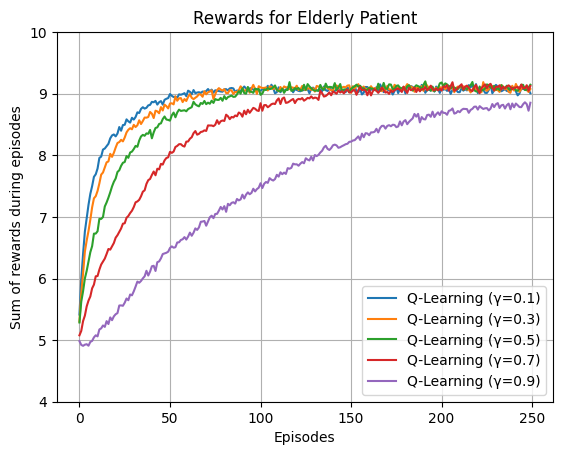

Plotting trajectories and optimal dose routines for all algorithms...


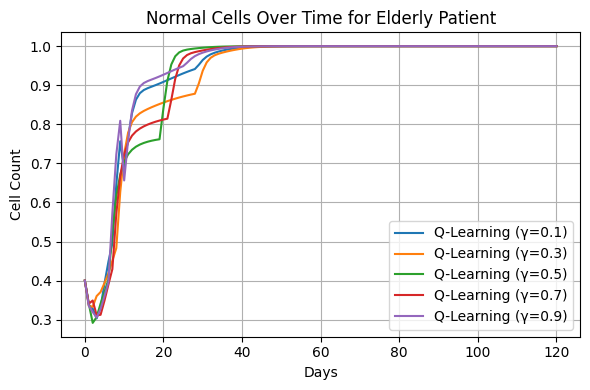

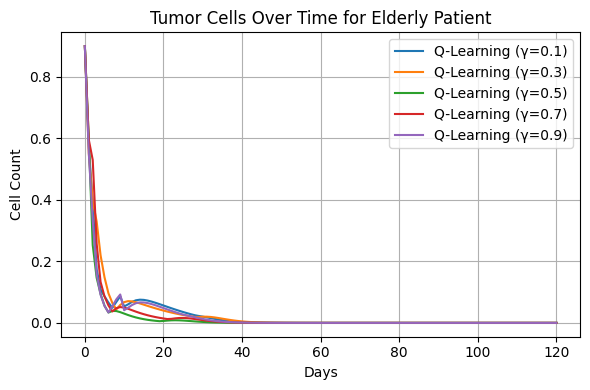

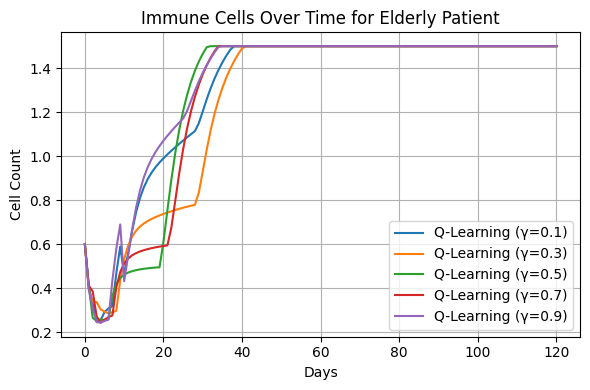

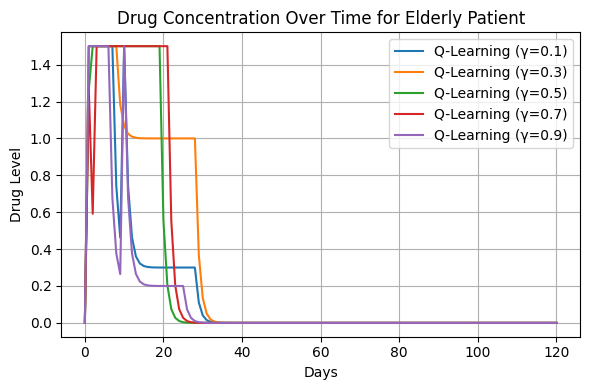

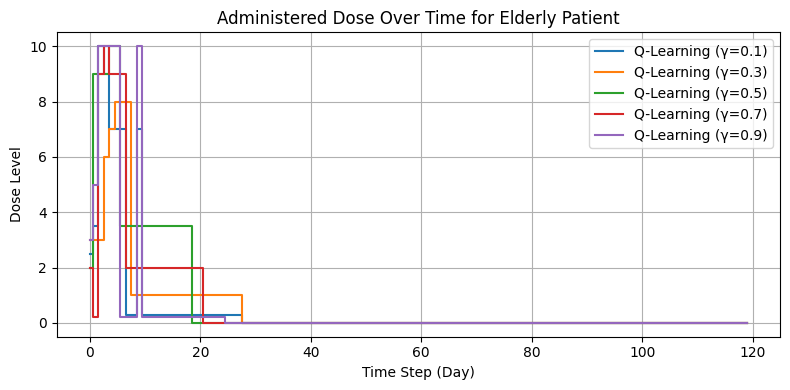

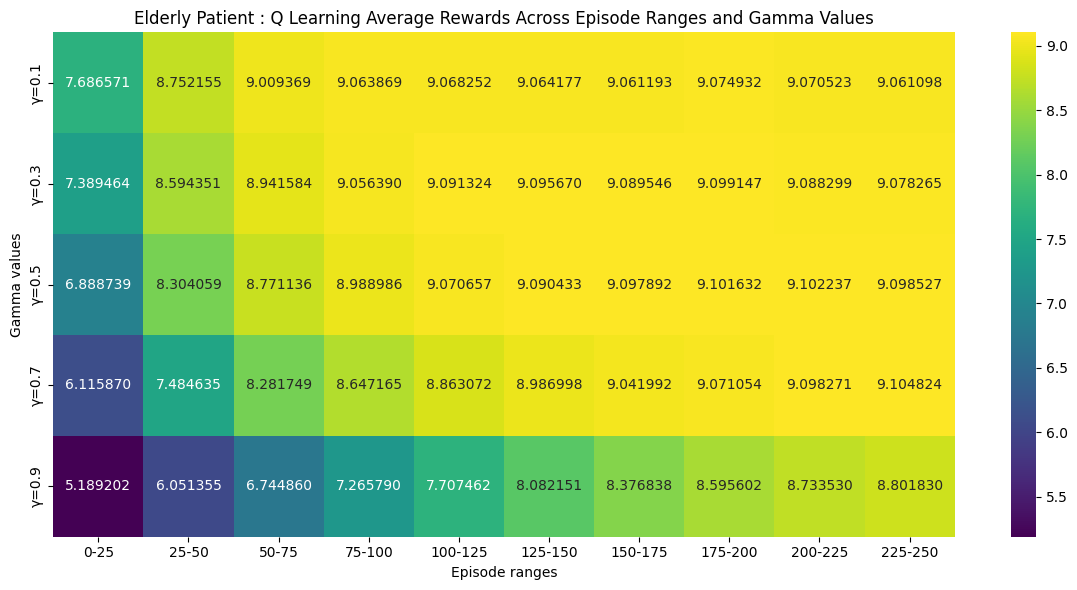

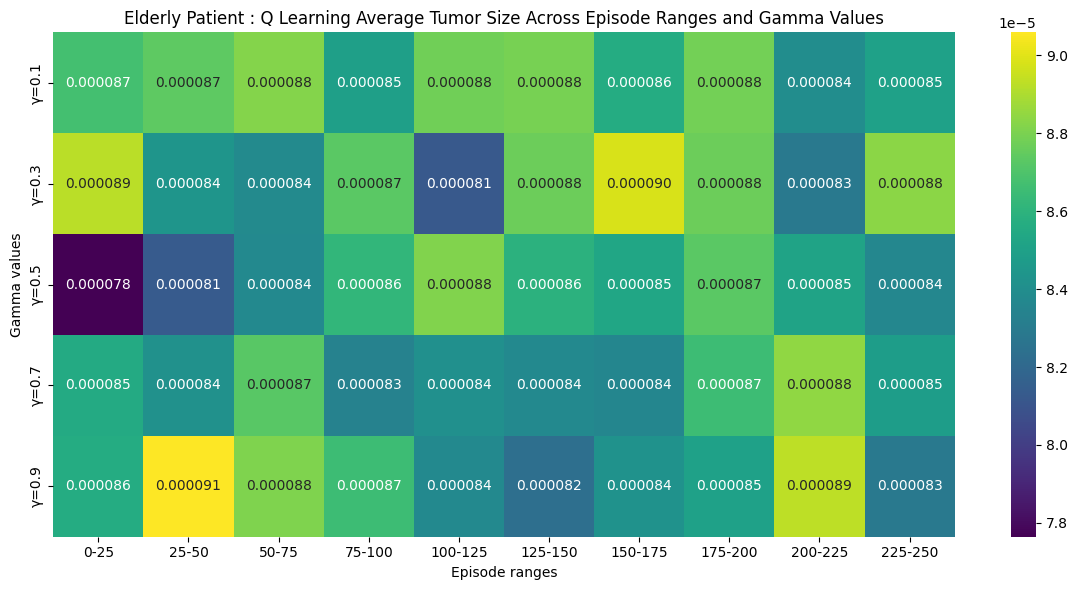

In [42]:
# ========================================================
# ELDERLY PATIENT — Q-LEARNING ANALYSIS WITH GAMMA VARIATION
# ========================================================

# --------------------------------------------------------
# Run Q-learning with different gamma (discount factor) values
# and collect rewards, tumor sizes, and policy trajectories
# --------------------------------------------------------
elderly_q_learning_rewards_list, elderly_q_learning_tumor_list, elderly_q_learning_trajectories_list = collect_rewards_and_trajectories(patient_type_elderly, elderly_dose_levels, elderly_tumor_bins, gammas, q_learning_algo)

# --------------------------------------------------------
# Plot reward curves across episodes for each gamma value
# --------------------------------------------------------
# This helps evaluate how different levels of discounting future rewards
# (i.e., gamma) influence learning performance.
plot_rewards(elderly_q_learning_rewards_list, elderly_patient_title)

# --------------------------------------------------------
# Plot the corresponding trajectories for each gamma
# --------------------------------------------------------
# This includes cell population dynamics and dose schedules under the learned policy.
plot_trajectories(elderly_q_learning_trajectories_list, elderly_patient_title)

# Compute a reward matrix: average rewards in episode bins for each gamma
# Useful for visualizing stability and convergence trends
elderly_q_learning_reward_matrix = compute_reward_matrix(elderly_q_learning_rewards_list, gammas, bins)

# visualise the reward matrix as a heatmap
# Each cell shows the average reward for a given gamma and episode range
plot_heatmap(elderly_q_learning_reward_matrix, gammas, bin_labels, 'Elderly Patient : Q Learning Average Rewards Across Episode Ranges and Gamma Values')

# Compute a tumor matrix: average tumor size in episode bins for each gamma
# Provides insight into how effective the policy was in reducing tumor burden over time
elderly_q_learning_tumor_matrix = compute_tumor_size_matrix(elderly_q_learning_tumor_list, gammas, bins)

# visualise the tumor matrix as a heatmap
# Helps compare therapeutic impact of different gamma values
plot_heatmap(elderly_q_learning_tumor_matrix, gammas, bin_labels, 'Elderly Patient : Q Learning Average Tumor Size Across Episode Ranges and Gamma Values')


##### 5.3.2.2. Double Q-Learning Hyperparameter Analysis for Elderly Patients
In the Double Q-Learning analysis for elderly patients, lower discount factors ($\gamma = 0.1$–$0.5$) consistently produced the highest cumulative rewards, with $\gamma = 0.3$ peaking at 9.18. In contrast, $\gamma = 0.9$ performed poorest across all training episodes, highlighting a clear decline in policy effectiveness as $\gamma$ increases.

From a physiological standpoint, lower $\gamma$ values facilitated faster convergence of tumor, immune, and normal cell populations, accompanied by more rapid and effective tumor suppression. Higher $\gamma$ values, particularly $\gamma = 0.9$, led to delayed convergence and elevated tumor levels, suggesting delayed or suboptimal therapeutic action.

Heatmap analyses of both reward trajectories and tumor size trends confirm this pattern. Discount factors in the range of 0.1–0.5 consistently led to higher rewards and smaller tumor sizes across most episodes. Meanwhile, $\gamma = 0.9$ resulted in the lowest average rewards and largest tumor burdens, further supporting its clinical inadequacy in this context.

Clinically, this implies that short to mid-term reward prioritisation enables more effective and timely chemotherapy strategies in elderly patients.

Starting Double-Q-Learning for elderly patient with gamma= 0.1

Check rewards:

First 10 rewards: [5184.85007963 5458.31881471 5713.86622024 5929.41588531 6054.13983273
 6243.35346302 6288.19321915 6461.64765275 6535.74625659 6613.87548772]

Last 10 rewards: [9065.51606792 9073.36721132 9082.66031276 9122.11903407 9091.74789024
 9075.09303672 9064.78521981 9063.28370364 9122.5224157  9101.7573675 ]

=====Final Combined Q-table (Q1 + Q2) for Double Q Learning: 

State 0 -> [0.47316393, 0.18009893, 0.22721104, 0.15972492, 0.15946620, 0.11772272,
                  0.09546476, 0.09758589, 0.07399335, 0.05911403, 0.06138906, 0.04180721,
                  0.04398658, 0.04296904, 0.04064702, 0.03612118, 0.04094410, 0.03827373, 0.03338551, 0.03543003]

State 1 -> [0.11073253, 0.09582130, 0.14394430, 0.10912343, 0.08647778, 0.12467440,
                  0.10973845, 0.14844826, 0.11425013, 0.12893633, 0.14649388, 0.18027377,
                  0.11626376, 0.08193980, 0.12320310, 0.07257168, 0.114

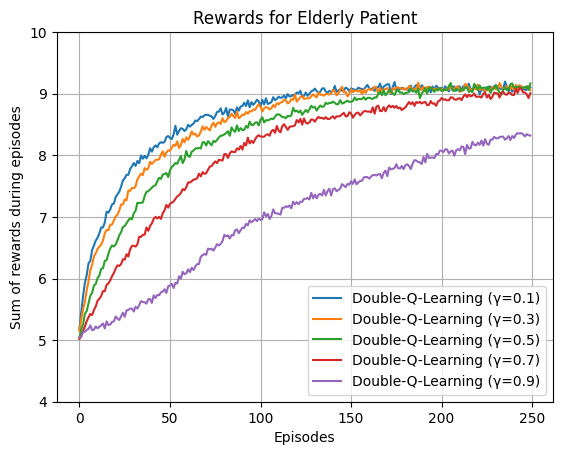

Plotting trajectories and optimal dose routines for all algorithms...


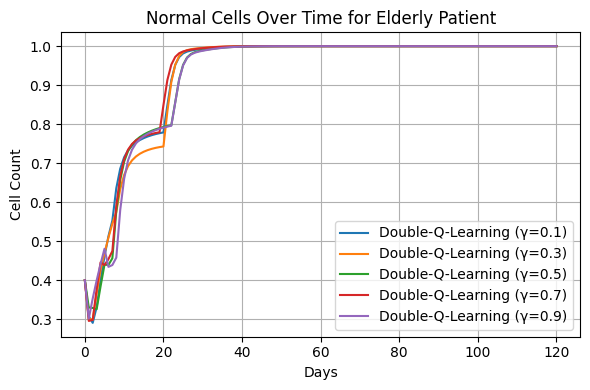

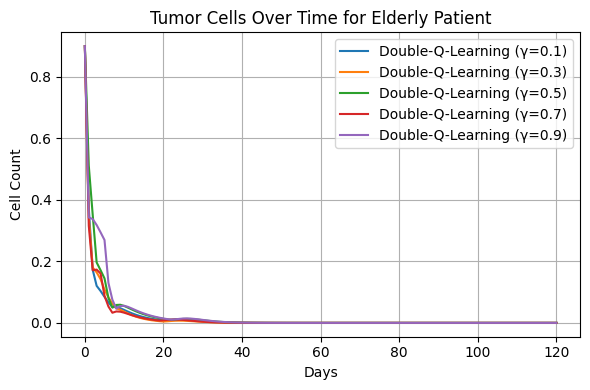

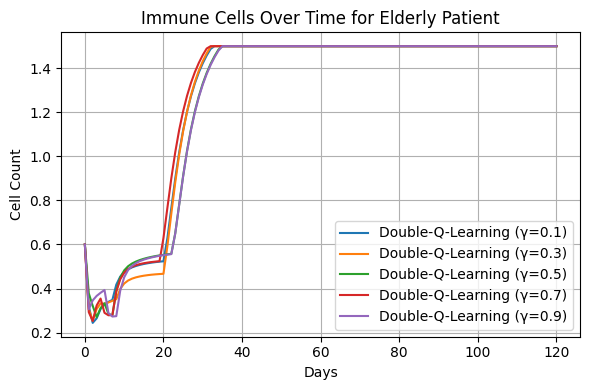

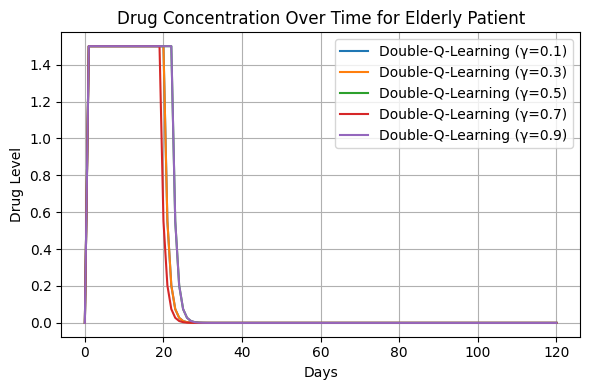

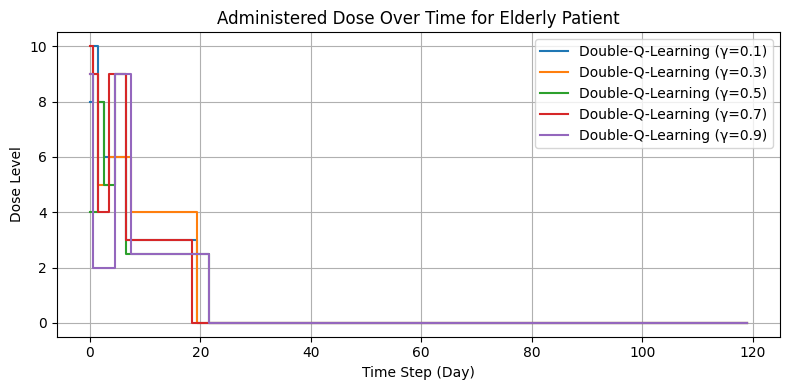

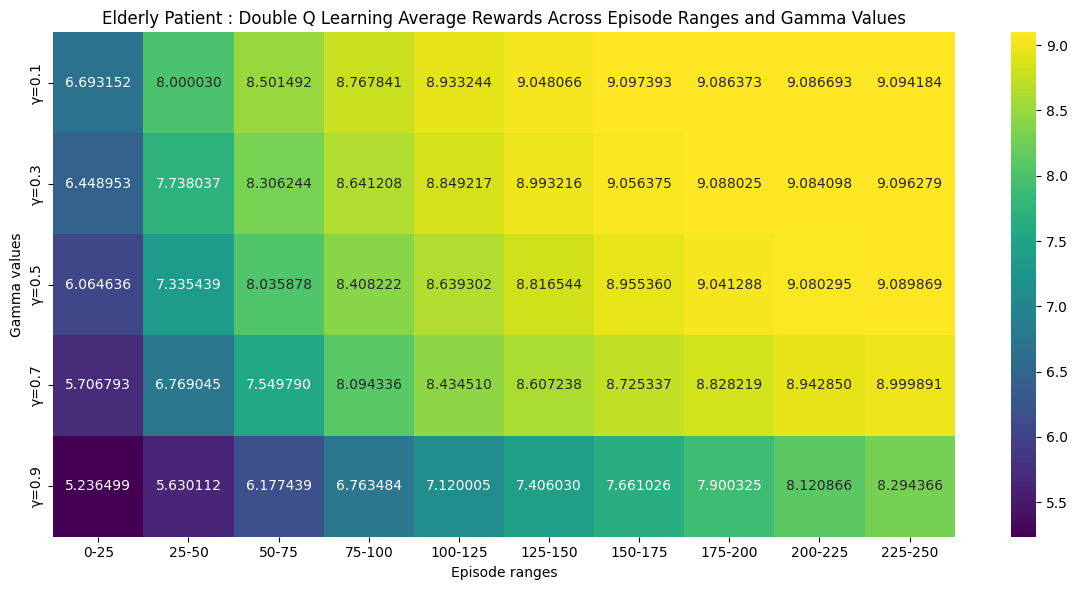

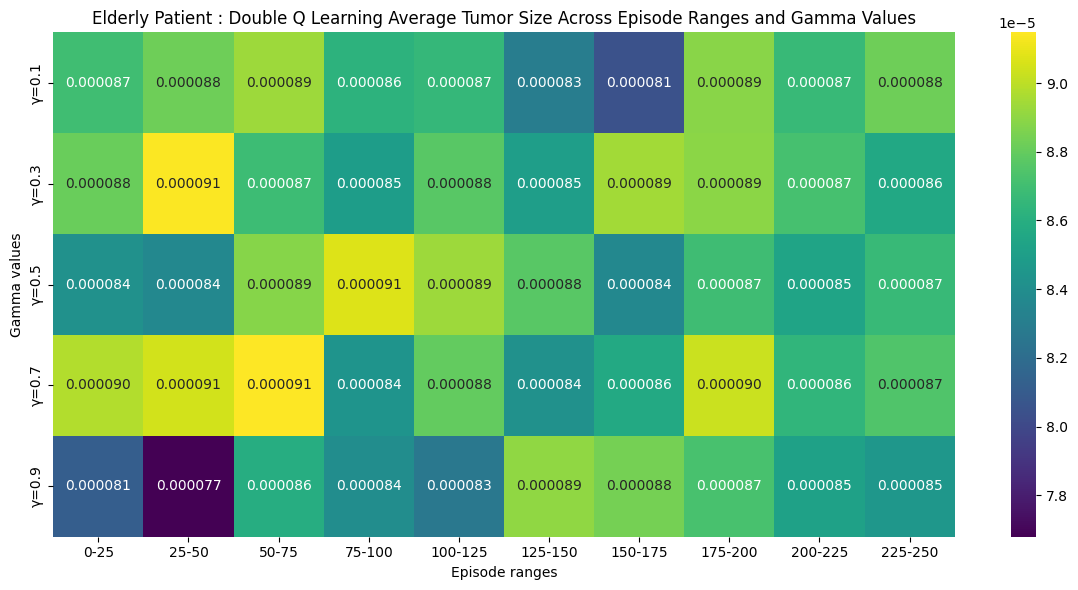

In [43]:
# ==================================================================
# ELDERLY PATIENT — DOUBLE-Q-LEARNING ANALYSIS WITH GAMMA VARIATION
# ==================================================================

# --------------------------------------------------------
# Run Double-Q-learning with different gamma (discount factor) values
# and collect rewards, tumor sizes, and policy trajectories
# --------------------------------------------------------
elderly_dq_learning_rewards_list, elderly_dq_learning_tumor_list, elderly_dq_learning_trajectories_list = collect_rewards_and_trajectories(patient_type_elderly, elderly_dose_levels, elderly_tumor_bins, gammas, double_q_learning_algo)

# --------------------------------------------------------
# Plot reward curves across episodes for each gamma value
# --------------------------------------------------------
# This helps evaluate how different levels of discounting future rewards
# (i.e., gamma) influence learning performance.
plot_rewards(elderly_dq_learning_rewards_list, elderly_patient_title)

# --------------------------------------------------------
# Plot the corresponding trajectories for each gamma
# --------------------------------------------------------
# This includes cell population dynamics and dose schedules under the learned policy.
plot_trajectories(elderly_dq_learning_trajectories_list, elderly_patient_title)

# Compute a reward matrix: average rewards in episode bins for each gamma
# Useful for visualizing stability and convergence trends
elderly_dq_learning_reward_matrix = compute_reward_matrix(elderly_dq_learning_rewards_list, gammas, bins)

# visualise the reward matrix as a heatmap
# Each cell shows the average reward for a given gamma and episode range
plot_heatmap(elderly_dq_learning_reward_matrix, gammas, bin_labels, 'Elderly Patient : Double Q Learning Average Rewards Across Episode Ranges and Gamma Values')

# Compute a tumor matrix: average tumor size in episode bins for each gamma
# Provides insight into how effective the policy was in reducing tumor burden over time
elderly_dq_learning_tumor_matrix = compute_tumor_size_matrix(elderly_dq_learning_tumor_list, gammas, bins)

# visualise the tumor matrix as a heatmap
# Helps compare therapeutic impact of different gamma values
plot_heatmap(elderly_dq_learning_tumor_matrix, gammas, bin_labels, 'Elderly Patient : Double Q Learning Average Tumor Size Across Episode Ranges and Gamma Values')

##### 5.3.2.3. SARSA Hyperparameter Analysis for Elderly Patients
In the SARSA hyperparameter analysis for elderly patients, the lowest discount factor ($\gamma = 0.1$) consistently achieved the highest average rewards(max 9.18, min 5.39). Performance declined steadily as $\gamma$ increased, with $\gamma = 0.9$ showing the weakest results across all episode ranges. This trend underscores a clear preference for short-term reward optimisation, which appears to be better aligned with the clinical needs of elderly patients.

From a biological standpoint, normal cell populations recovered most rapidly with $\gamma = 0.1$, reaching stabilisation around day 25, compared to day 35 for $\gamma = 0.5$. Tumor cell reduction trends were relatively consistent across all $\gamma$ values, suggesting that reward differences were more influenced by systemic recovery and dosing patterns than by tumor dynamics alone.

Notably, $\gamma = 0.5$ induced an earlier and more intense immune response, accompanied by a brief but high-dose chemotherapy burst, diverging from the more gradual and sustained dosing strategies observed with other $\gamma$ values. While this may appear therapeutically promising, the increased volatility and delayed normal cell recovery make it less desirable in the context of elderly care.

Overall, SARSA with $\gamma=0.1$ offers the best balance of reward, stability, and manageable treatment dynamics for elderly patients.

Starting SARSA for elderly patient with gamma= 0.1

Check rewards:

First 10 rewards: [5356.82626701 5962.6842923  6431.17207222 6784.67522952 7063.94016591
 7307.82694448 7505.8304493  7578.3318814  7735.53032554 7726.2108958 ]

Last 10 rewards: [8952.22493891 9114.54310382 9019.52520642 8996.15909566 9048.02430999
 9071.56968888 9053.39950375 9063.21851564 9060.97786483 9082.76632087]

=====Final Q-table for SARSA: 

State 0 -> [0.25333848, 0.16692729, 0.14666190, 0.10186218, 0.08336429, 0.04288472,
                  0.06712458, 0.04323159, 0.05539844, 0.02671490, 0.03082191, 0.02133940,
                  0.02218694, 0.02176868, 0.02415189, 0.02138845, 0.02133735, 0.02197362, 0.01824199, 0.01486634]

State 1 -> [0.07201042, 0.06721180, 0.07829355, 0.07145848, 0.06954287, 0.06765147,
                  0.06293255, 0.07228219, 0.10479494, 0.08160344, 0.08028591, 0.06527569,
                  0.05862985, 0.06123412, 0.06312829, 0.07701597, 0.07960207, 0.07683543, 0.06386737, 0.05652588]


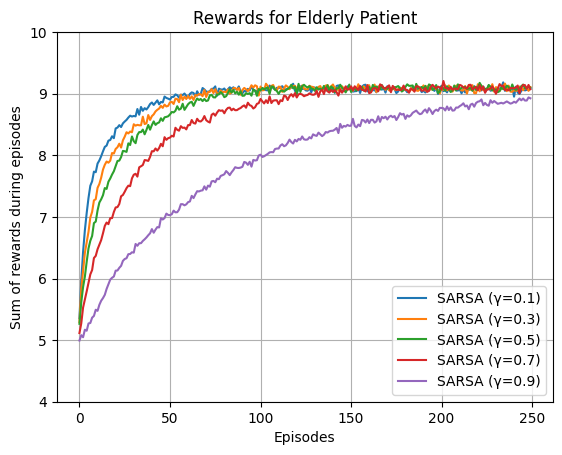

Plotting trajectories and optimal dose routines for all algorithms...


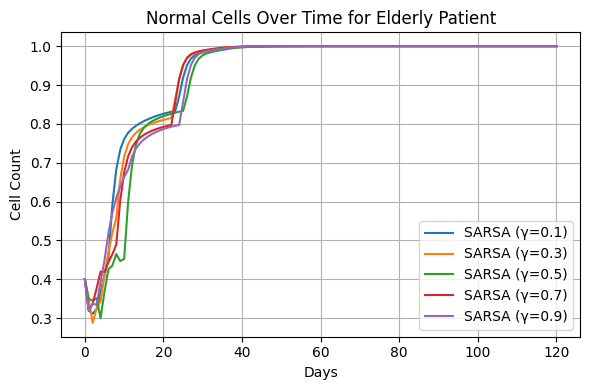

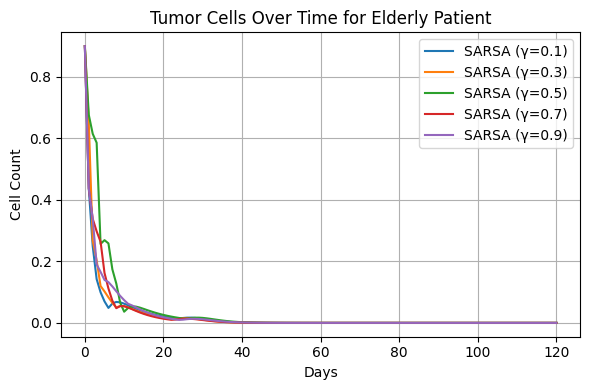

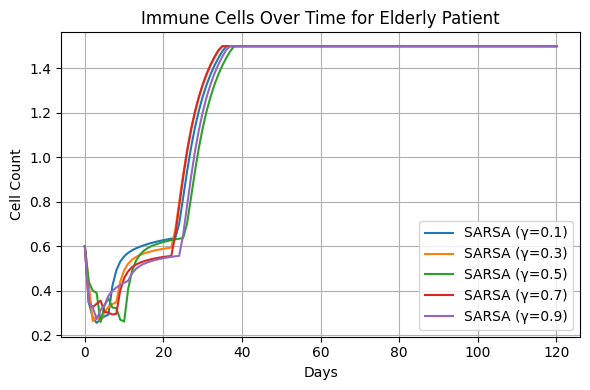

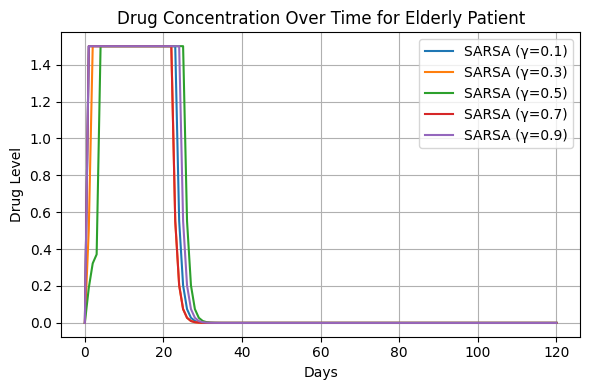

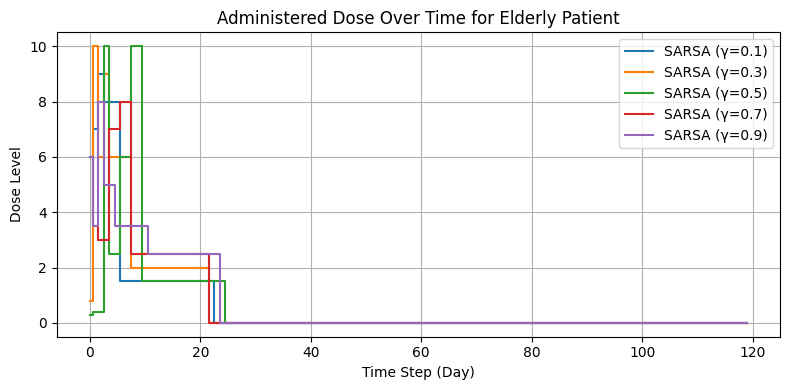

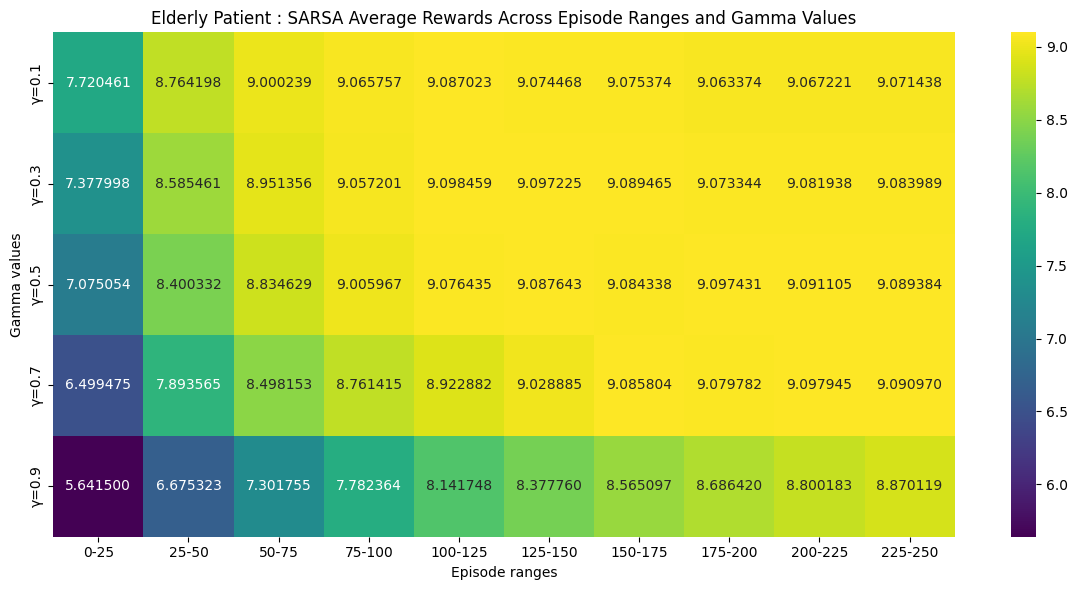

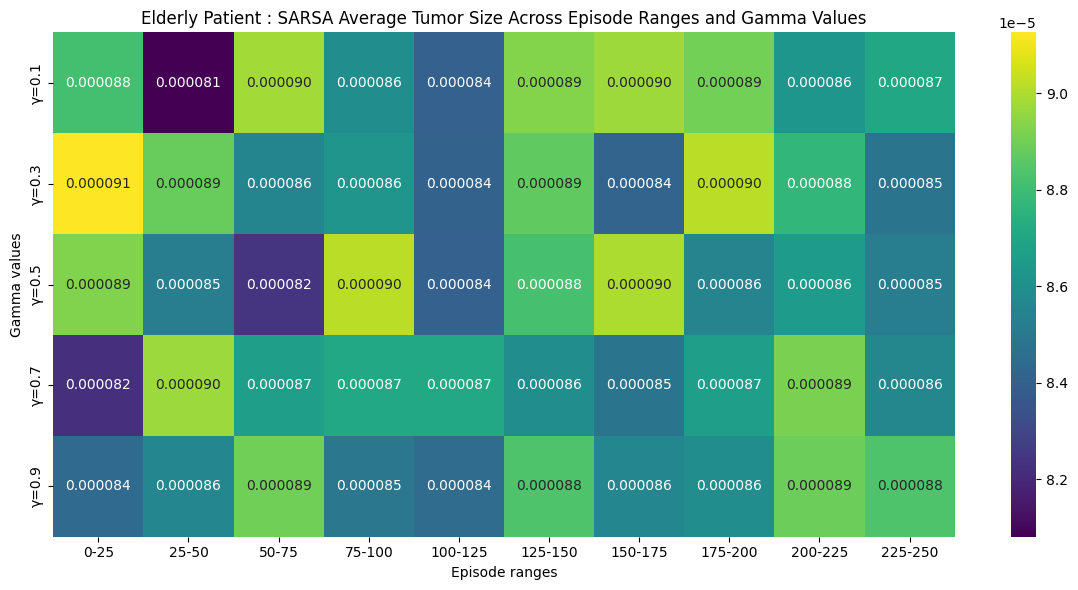

In [50]:
# ==================================================================
# ELDERLY PATIENT — SARSA ANALYSIS WITH GAMMA VARIATION
# ==================================================================

# --------------------------------------------------------
# Run SARSA with different gamma (discount factor) values
# and collect rewards, tumor sizes, and policy trajectories
# --------------------------------------------------------
elderly_sarsa_rewards_list, elderly_sarsa_tumor_list, elderly_sarsa_trajectories_list = collect_rewards_and_trajectories(patient_type_elderly, elderly_dose_levels, elderly_tumor_bins, gammas, sarsa_algo)

# --------------------------------------------------------
# Plot reward curves across episodes for each gamma value
# --------------------------------------------------------
# This helps evaluate how different levels of discounting future rewards
# (i.e., gamma) influence learning performance.
plot_rewards(elderly_sarsa_rewards_list, elderly_patient_title)

# --------------------------------------------------------
# Plot the corresponding trajectories for each gamma
# --------------------------------------------------------
# This includes cell population dynamics and dose schedules under the learned policy.
plot_trajectories(elderly_sarsa_trajectories_list, elderly_patient_title)

# Compute a reward matrix: average rewards in episode bins for each gamma
# Useful for visualizing stability and convergence trends
elderly_sarsa_reward_matrix = compute_reward_matrix(elderly_sarsa_rewards_list, gammas, bins)

# visualise the reward matrix as a heatmap
# Each cell shows the average reward for a given gamma and episode range
plot_heatmap(elderly_sarsa_reward_matrix, gammas, bin_labels, 'Elderly Patient : SARSA Average Rewards Across Episode Ranges and Gamma Values')

# Compute a tumor matrix: average tumor size in episode bins for each gamma
# Provides insight into how effective the policy was in reducing tumor burden over time
elderly_sarsa_tumor_matrix = compute_tumor_size_matrix(elderly_sarsa_tumor_list, gammas, bins)

# visualise the tumor matrix as a heatmap
# Helps compare therapeutic impact of different gamma values
plot_heatmap(elderly_sarsa_tumor_matrix, gammas, bin_labels, 'Elderly Patient : SARSA Average Tumor Size Across Episode Ranges and Gamma Values')

Across all reinforcement learning methods (Q-Learning, Double Q-Learning, and SARSA) for elderly patient, lower discount factors ($\gamma = 0.1$–$0.3$) consistently outperformed higher values, delivering higher cumulative rewards, faster tumor suppression, and more stable treatment dynamics. Specifically, $\gamma = 0.1$ emerged as the most effective overall, supporting aggressive, short-term treatment strategies that align well with the clinical needs of elderly patients—who may benefit from timely, low-toxicity interventions. Moderate values (e.g., $\gamma = 0.3$) offered a more conservative approach, balancing efficacy with immune and normal cell preservation, and may be suited to patients requiring gentler, prolonged care.

The differing optimal $\gamma$ values between elderly and young patients can be attributed to both patient-specific treatment priorities and the design of the reward functions. For elderly patients, the reward function penalises deviations in both tumor and normal cell populations, encouraging rapid yet balanced treatment that minimises harm to healthy cells. This aligns well with lower $\gamma$ values, which favor short-term gains and reduce the risk of prolonged toxicity. 

In contrast, the young patient reward function focuses solely on minimising tumor burden, allowing the agent to pursue long-term tumor eradication even at the expense of temporary side effects. As a result, higher $\gamma$ values are more effective in this case, supporting strategies that emphasise future reward over immediate outcomes.

## 6. Conclusion
---
Our goal in this project was to investigate how chemotherapy dosage can be optimised with reinforcement learning to successfully reduce tumors while protecting the patient's immune system. We evaluated a number of RL algorithms, including Q-learning, Double Q-learning, and SARSA, to learn treatment strategies that strike a balance between immunological health and efficacy using a system of ordinary differential equations (ODEs) to describe tumor-immune-drug dynamics. 

This study compares RL chemotherapy dosing strategies in simulated elderly and young patients, using metrics such as cell trajectories, dose schedules, reward progression, time step convergence, and toxicity profiles. The findings underscore that no single algorithm is universally optimal; rather, the best choice depends on patient-specific needs, particularly age-related physiological differences and clinical priorities such as tumor eradication speed, immune recovery, and safety.

For young patients, Q-Learning is most effective, offering rapid tumor reduction and immune recovery with low toxicity, making it ideal when fast results are prioritised. SARSA, while quick to act, shows higher variability and toxicity, limiting its safety. Double Q-Learning is slower but offers stable, safer dosing. In elderly patients, SARSA again delivers the fastest therapeutic response but with the highest toxicity, making it risky. Double Q-Learning strikes the best balance for elderly care, offering steady outcomes with moderate toxicity, while Q-Learning, though safest, is slower. Overall, Q-Learning suits younger, resilient patients, SARSA may be used cautiously for speed, and Double Q-Learning is best for vulnerable populations needing controlled, safer treatment. Overall, the choice of algorithm should be guided by patient-specific factors: SARSA for aggressive intervention, Double Q-Learning for safety, and Q-Learning for rapid therapeutic response in resilient individuals.

A potential extension of our process would be to tailor the ODE parameters specifically to elderly patients. Currently, the model uses the same biological factors (such as immune response and tumor growth rate) for both young and old individuals. However, in reality, elderly patients often have a poorer immune system and slower tumor growth. This process could have lead to overestimating or underestimating into our agent. Updating these factors to reflect the difference would make our findings more accurate and meaningful. Further, in future applications, hybrid or adaptive algorithms could combine the strengths of the algorithms studied, dynamically adjusting exploration and dose aggressiveness based on real-time patient response, creating more clinically viable and personalised treatment plans.

Overall, this project offers a versatile framework for testing and optimising chemotherapeutic policies.

## References

[1]Cancer research UK, “Cancer mortality statistics,” Cancer Research UK, May 13, 2022. https://www.cancerresearchuk.org/health-professional/cancer-statistics/mortality

[2]World Health Organization, “The top 10 causes of death,” World Health Organization, Aug. 07, 2024. https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death

[3]P. Jayaraman, J. Desman, G. N. Nadkarni, A. Sakhuja, and M. Sabounchi, “A Primer on Reinforcement Learning in Medicine for Clinicians,” npj Digital Medicine, vol. 7, no. 1, Nov. 2024, doi: https://doi.org/10.1038/s41746-024-01316-0.

[4]C. Yu, J. Liu, S. Nemati, and G. Yin, “Reinforcement Learning in Healthcare: A Survey,” ACM Computing Surveys, vol. 55, no. 1, pp. 1–36, Jan. 2023, doi: https://doi.org/10.1145/3477600.

[5]Y. Zhao, M. R. Kosorok, and D. Zeng, “Reinforcement learning design for cancer clinical trials,” Statistics in Medicine, vol. 28, no. 26, pp. 3294–3315, Nov. 2009, doi: https://doi.org/10.1002/sim.3720.

[6]C.-Y. Yang, C. Shiranthika, C.-Y. Wang, K.-W. Chen, and S. Sumathipala, “Reinforcement learning strategies in cancer chemotherapy treatments: A review,” Computer Methods and Programs in Biomedicine, vol. 229, p. 107280, Feb. 2023, doi: https://doi.org/10.1016/j.cmpb.2022.107280.

[7]S. Liu, K. C. See, K. Y. Ngiam, L. A. Celi, X. Sun, and M. Feng, “Reinforcement Learning for Clinical Decision Support in Critical Care: Comprehensive Review,” Journal of Medical Internet Research, vol. 22, no. 7, p. e18477, 2020, doi: https://doi.org/10.2196/18477.

[8]R. Padmanabhan, N. Meskin, and W. M. Haddad, “Reinforcement learning-based control of drug dosing for cancer chemotherapy treatment,” Mathematical Biosciences, vol. 293, pp. 11–20, Nov. 2017, doi: https://doi.org/10.1016/j.mbs.2017.08.004.

[9]L. G. de Pillis, W. Gu, and A. E. Radunskaya, “Mixed immunotherapy and chemotherapy of tumors: modeling, applications and biological interpretations,” Journal of Theoretical Biology, vol. 238, no. 4, pp. 841–862, Feb. 2006, doi: https://doi.org/10.1016/j.jtbi.2005.06.037.

[10]Boyan, J. and Moore, A. (1994). Generalization in Reinforcement Learning: Safely Approximating the Value Function. In: G. Tesauro, D. Touretzky and T. Leen, eds., Advances in Neural Information Processing Systems 7. pp.369–376.

[11]Hermanns, H. (2002). Markov Chains. In: Interactive Markov Chains. Berlin, Heidelberg: Springer, pp.35–55. doi:10.1007/3-540-45804-2_4.

[12]Ng, A.Y. (2003). Shaping and policy search in reinforcement learning.